# Business Understanding

## *Customer Churn Prediction*

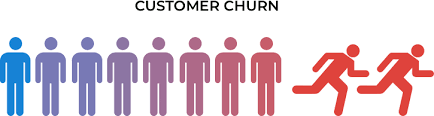

In [8]:
from IPython.display import Image
path = "/Users/BRI9999ADM/Documents/Working/SVI - 03rd March/Usecase 2/"
Image(filename = path + "logo.png", width=1000, height=1000)

***CONTEXT***

Churn merupakan istilah customer yang ingin pergi atau tidak lagi berlangganan kepada suatu produk, perusahaan, dsb. Pada bidang perbankan, churn merujuk kepada nasabah yang tidak lagi menjadi nasabah pada suatu Bank dan kemudian menjadi nasabah di bank lain. 


***PROBLEM STATEMENT***

Pelanggan yang churn dapat menyebabkan bisnis yang akan merugi besar. Faktanya, mendapat pelanggan baru 5 kali lebih mahal daripada mempertahankan pelanggan yang sudah ada, dan membuat pelanggan baru menjadi loyal juga 16 kali lebih mahal (Sumber: https://blog.usetada.com/id/apa-itu-customer-churn-dan-bagaimana-menghentikannya). Jadi, diperlukan strategi untuk menghentikan customer churn atau kehilangan pelanggan dan meretensi pelanggan yang sudah dimiliki. 

***GOALS***

Pada usecase ini, akan dilakukan klasifikasi untuk membedakan antara nasabah yang akan churn dan tidak. Hasil tersebut ke depannya diharapkan dapat memprediksi nasabah yang ingin churn, lalu pihak bank dapat memberikan penawaran tertentu dan special agar nasabah tidak jadi untuk melakukan churn.

# Data Understanding

In [39]:
# data computation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import BinaryEncoder
import category_encoders as ce

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble._forest import RandomForestClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectFromModel

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

import shap
from hyperopt import hp
from hyperopt import fmin, tpe, Trials, STATUS_OK

# Others
import sys
import warnings
warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Eploratory Data Analysis (EDA)

In [10]:
df_churn_train = pd.read_csv('Churn data_train.csv')
df_churn_test = pd.read_csv('Churn data_test.csv')
df_churn_train

x0        x1        x2        x3        x4        x5   x6   x7  \
0      0.067563 -2.172492 -1.713774 -0.146854 -0.685219 -0.933838  4.0  2.0   
1      0.099622  0.584803 -6.089758 -0.252186 -0.334912 -4.671281  4.0  2.0   
2      0.648421  3.881137  0.961359  0.217361 -1.471850 -0.975352  5.0  1.0   
3      0.005775 -2.726153  2.891378 -0.038325  2.280847  1.761478  3.0  3.0   
4      0.044396  2.803576 -1.923381 -0.116657 -1.574199  6.098627  3.0  1.0   
...         ...       ...       ...       ...       ...       ...  ...  ...   
99995  0.225476  0.519236 -0.228287 -0.216690  1.532745 -4.199383  7.0  3.0   
99996  0.679236 -1.481743 -0.758356  0.042105 -0.519277  4.708936  4.0  2.0   
99997 -0.280894 -1.123589 -3.524835  0.098581  3.557413  4.165918  3.0  2.0   
99998 -0.380227  1.463374  4.601274 -0.106082 -5.866263 -0.694146  4.0  2.0   
99999  0.431635 -2.585946  3.312630 -0.214270 -2.249910 -3.129125  5.0  2.0   

              x8         x9  ...       x116  x117  x118       x119      x120  \
0      -4.476051  -1.472306  ...   4.607926  52.0   1.0   0.773809  0.766531   
1      -0.387076  -0.664552  ...  15.889763  53.0   1.0   7.065852  0.994304   
2      -0.850146  -4.011487  ...  13.770410  53.0   1.0  -8.598553 -2.958302   
3       9.116188  -4.610151  ...   5.904901  50.0   1.0   8.194975 -7.798308   
4     -13.956141  13.785099  ... -14.603703  47.0   0.0   2.330789 -8.249825   
...          ...        ...  ...        ...   ...   ...        ...       ...   
99995   6.063920  -3.915295  ...  -2.417893  49.0   1.0  -0.961071  3.755243   
99996  -3.211836  -0.186456  ...  13.669746  50.0   0.0  -3.019698 -7.595073   
99997  -1.861652   8.395887  ...  -4.275254  49.0   1.0  12.351632 -1.809379   
99998  12.934670  -9.412598  ...   7.028707  54.0   0.0   8.124710 -0.048071   
99999  15.204895  -1.351086  ...   8.538084  47.0   1.0   6.215467 -4.212259   

            x121       x122       x123      x124  y  
0       6.307142   9.074515  -2.694049  0.330964  0  
1      -0.028411 -21.472850   5.626095  1.293455  0  
2     -12.784030 -36.855873   0.356093  1.499790  0  
3      10.910515  15.226094 -10.440813 -0.735116  0  
4     -12.680490  40.192302  -5.037065  1.679262  1  
...          ...        ...        ...       ... ..  
99995 -15.784960  -8.636031  -2.889891 -1.282423  0  
99996  19.131624  18.984271   8.288159  2.443079  0  
99997 -14.952984 -30.913815   0.214523  8.503047  1  
99998  -0.989949  -9.426005   7.620055 -1.035063  0  
99999  14.119915  26.102488   1.228317 -1.138888  1  

[100000 rows x 126 columns]

In [11]:
df_churn_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 126 columns):
 #    Column  Non-Null Count   Dtype  
---   ------  --------------   -----  
 0    x0      99877 non-null   float64
 1    x1      99869 non-null   float64
 2    x2      99876 non-null   float64
 3    x3      99885 non-null   float64
 4    x4      99863 non-null   float64
 5    x5      99884 non-null   float64
 6    x6      99878 non-null   float64
 7    x7      99867 non-null   float64
 8    x8      99866 non-null   float64
 9    x9      99870 non-null   float64
 10   x10     99858 non-null   float64
 11   x11     99872 non-null   float64
 12   x12     99865 non-null   float64
 13   x13     99855 non-null   float64
 14   x14     99844 non-null   float64
 15   x15     99877 non-null   float64
 16   x16     99862 non-null   float64
 17   x17     99871 non-null   float64
 18   x18     99864 non-null   float64
 19   x19     99877 non-null   float64
 20   x20     99869 non-null   

Dataset tersebut memiliki 126 kolom, 125 adalah fitur dan 1 adalah targetnya. Berdasarkan data di atas, semua fitur memiliki missing value. Missing value pada data tersebut akan dilakukan imputasi pada ***Data Preparation***

### *Baseline*

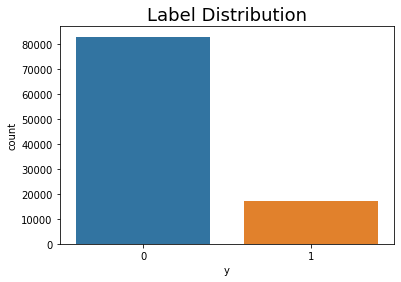

Churn     No Churn
Len         16992.00000  83008.00000
Percentage      0.16992      0.83008

In [12]:
sns.countplot(df_churn_train['y'])
plt.title('Label Distribution', size=18)
plt.show()

no_churn = len(df_churn_train[df_churn_train['y'] == 0])
churn = len(df_churn_train[df_churn_train['y'] == 1])

df_label = pd.DataFrame({'Churn': [churn, churn/(churn+no_churn)],
                         'No Churn': [no_churn, no_churn/(churn+no_churn)]},
                        index=['Len', 'Percentage'])

display(df_label)

*Insight:*

Berdasarkan data di atas, dapat ditarik kesimpulan bahwa target/label terindikasi imbalance atau tidak seimbang. Hal ini dapat membuat model cenderung untuk memprediksi kelas mayoritas. Maka hal ini akan dilakukan imbalanced handling menggunakan undersampling atau oversampling.

### *Feature Distribution*

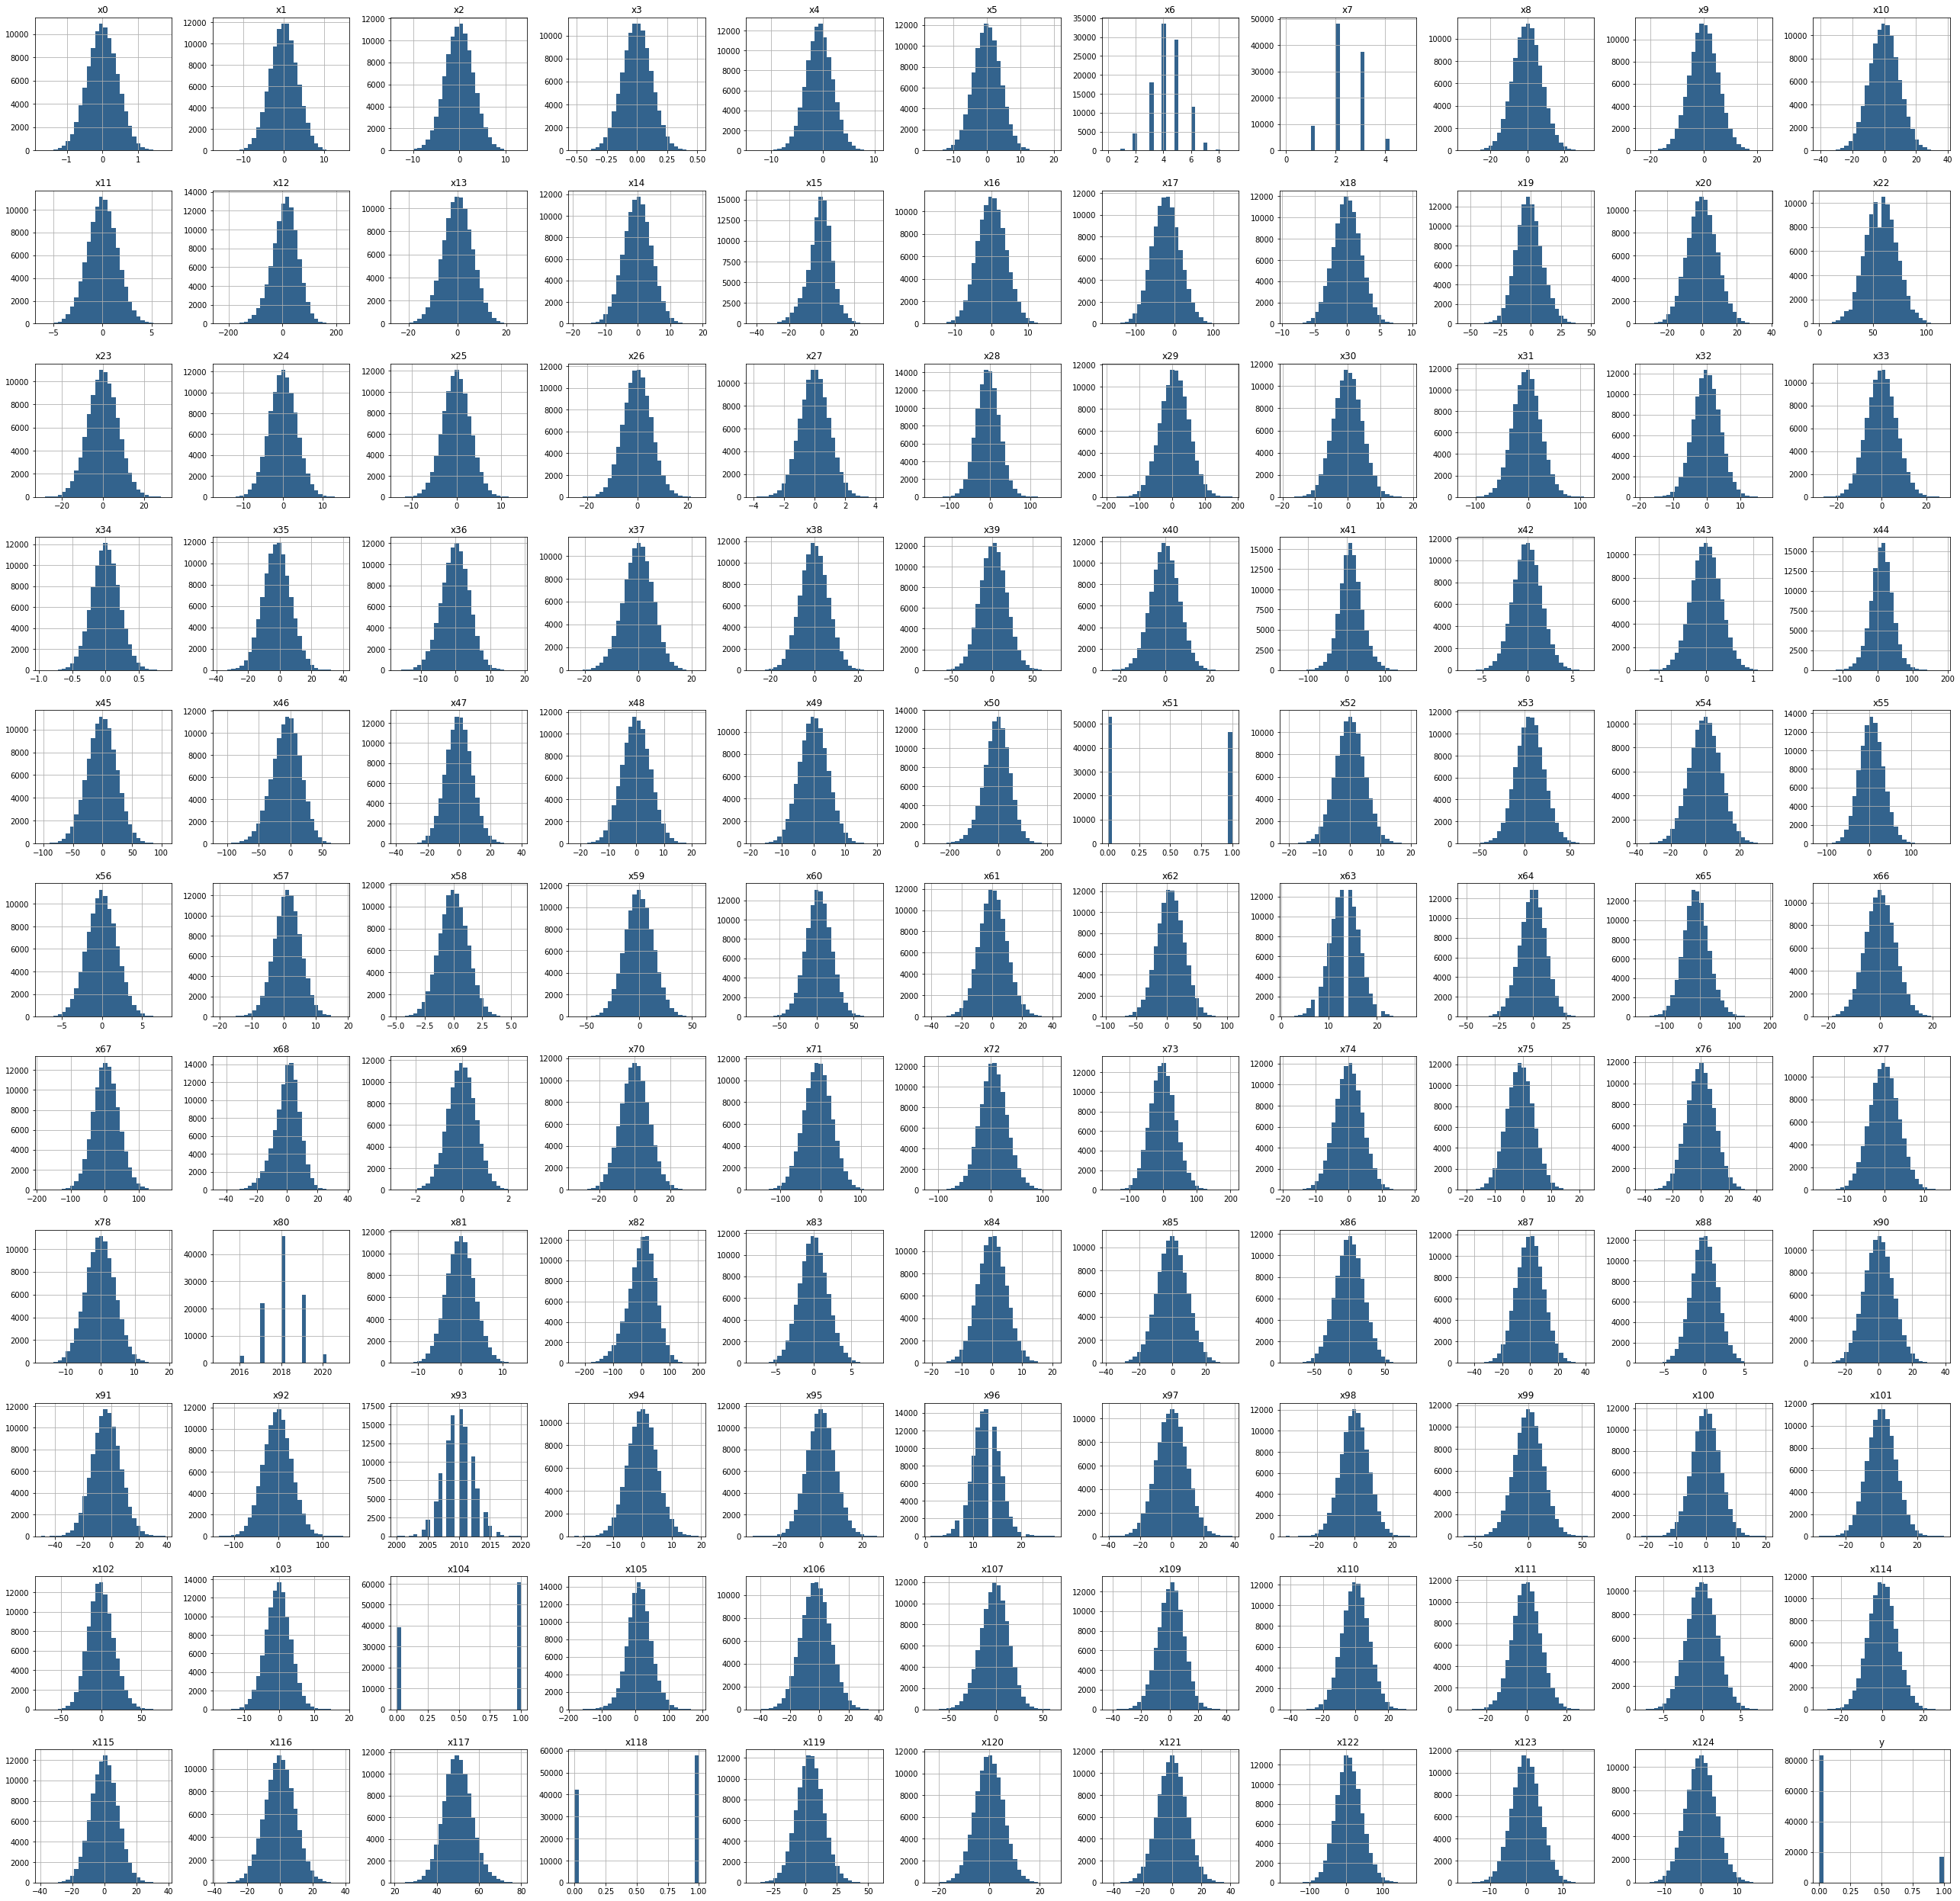

In [13]:
df_churn_train.hist(figsize=(45,45), bins=30, color = '#33638D')
plt.show()

Berdasarkan plot di atas, mayoritas fitur memiliki distribusi normal. Fitur-fitur tersebut telah dinormalisasi oleh pihak penyelenggara.

In [14]:
labelEncodingFeature = [6, 7, 63]
categoricalFeature = [21, 112, 79, 89, 108]
binaryFeature = [51, 104, 118]

# objectFeature = df_churn_train.columns[labelEncodingFeature + categoricalFeature + binaryFeature].tolist()
objectFeature = df_churn_train.columns[categoricalFeature].tolist()
numericFeature = [i for i in df_churn_train.columns[:] if i not in objectFeature]

display(objectFeature)
display(numericFeature)

['x21', 'x112', 'x79', 'x89', 'x108']

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 'x85',
 'x86',
 'x87',
 'x88',
 'x90',
 'x91',
 'x92',
 'x93',
 'x94',
 'x95',
 'x96',
 'x97',
 'x98',
 'x99',
 'x100',
 'x101',
 'x102',
 'x103',
 'x104',
 'x105',
 'x106',
 'x107',
 'x109',
 'x110',
 'x111',
 'x113',
 'x114',
 'x115',
 'x116',
 'x117',
 'x118',
 'x119',
 'x120',
 'x121',
 'x122',
 'x123',
 'x124',
 'y']

#### *Numerical Feature*

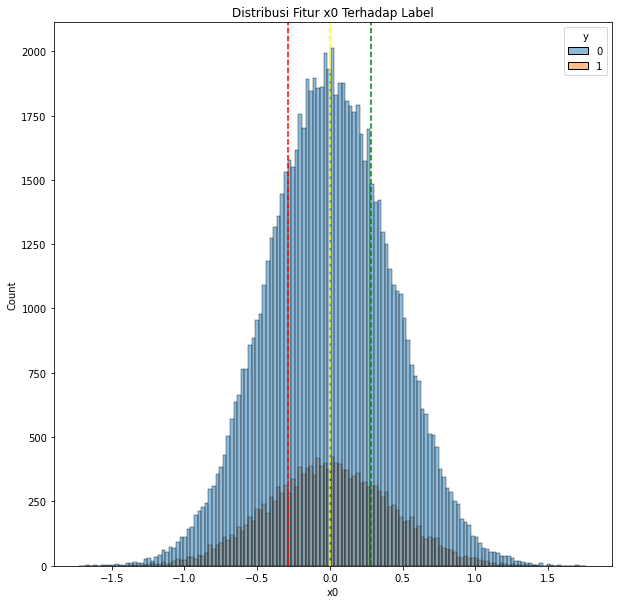

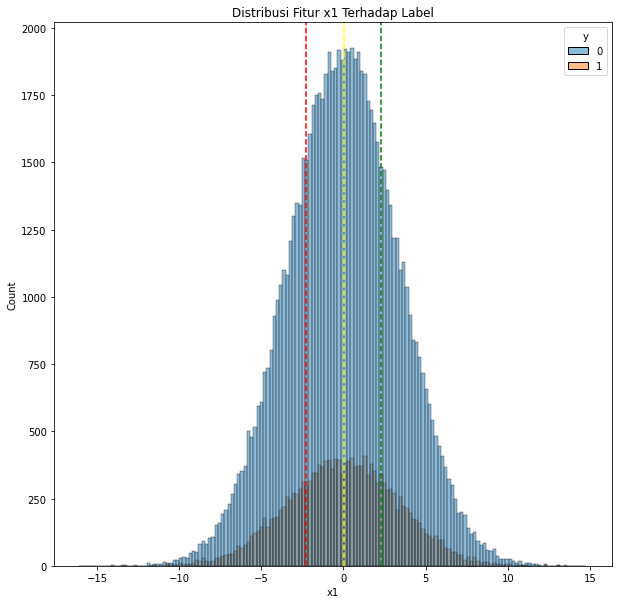

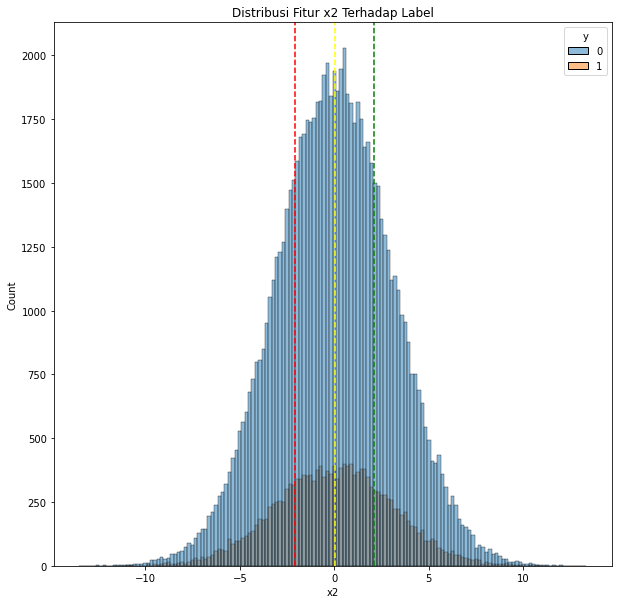

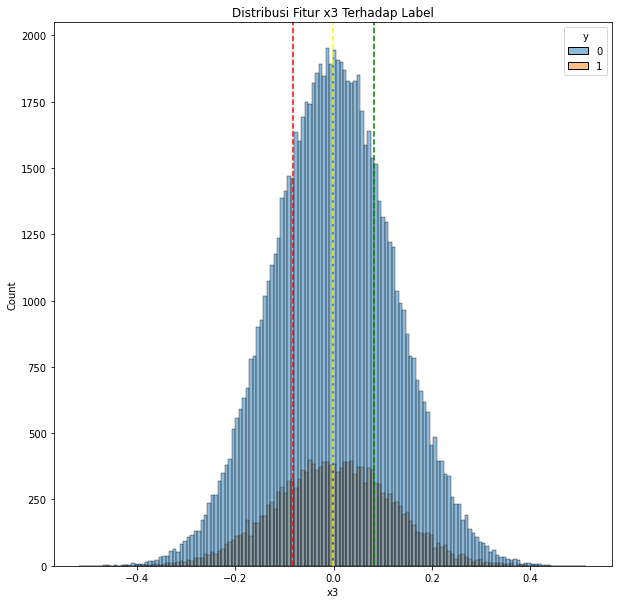

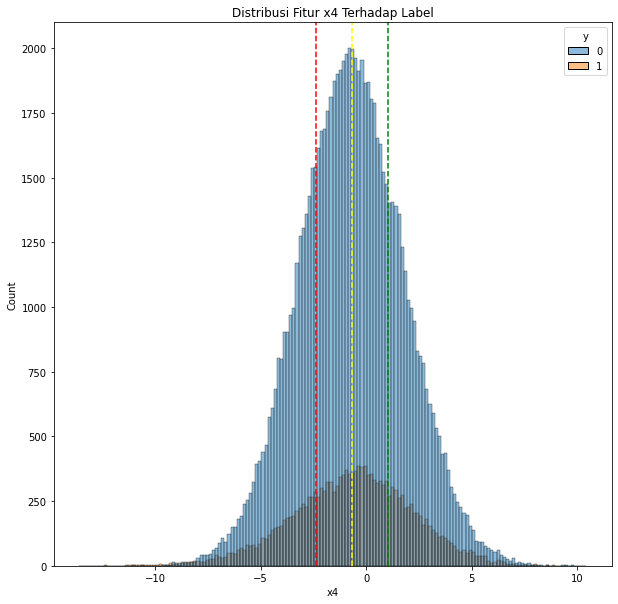

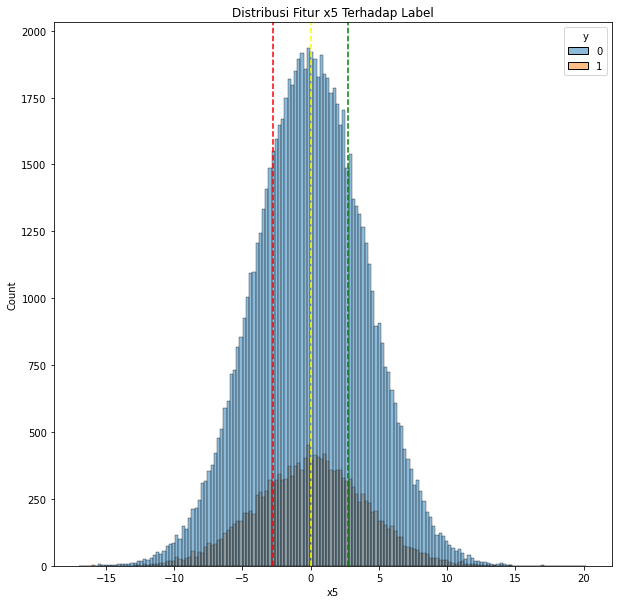

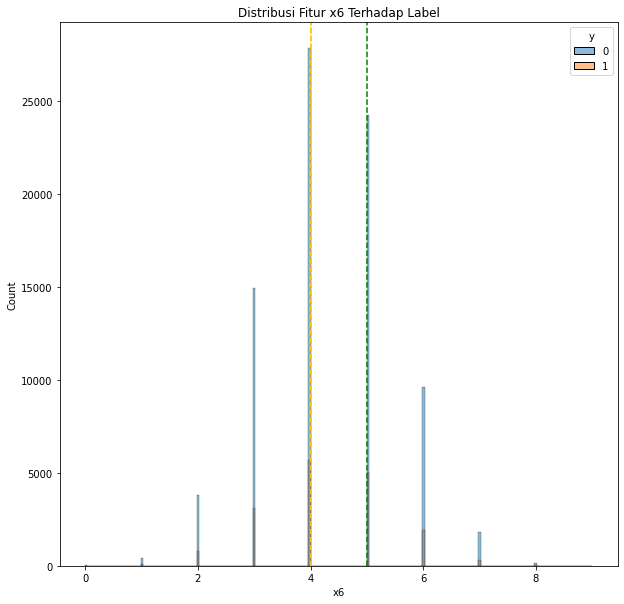

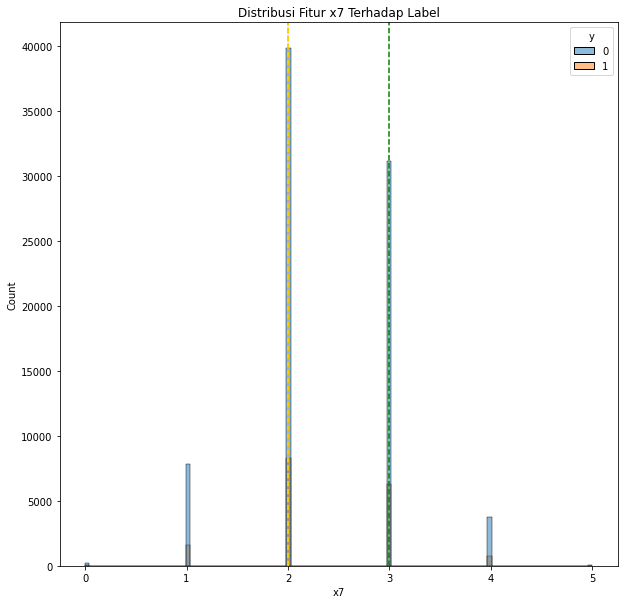

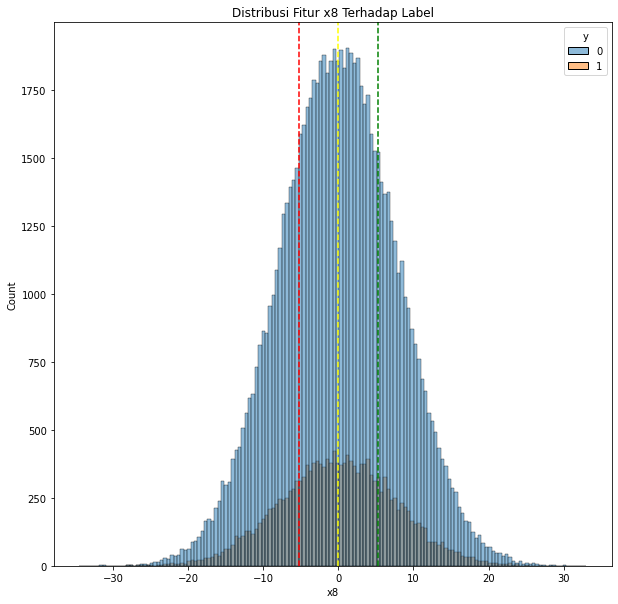

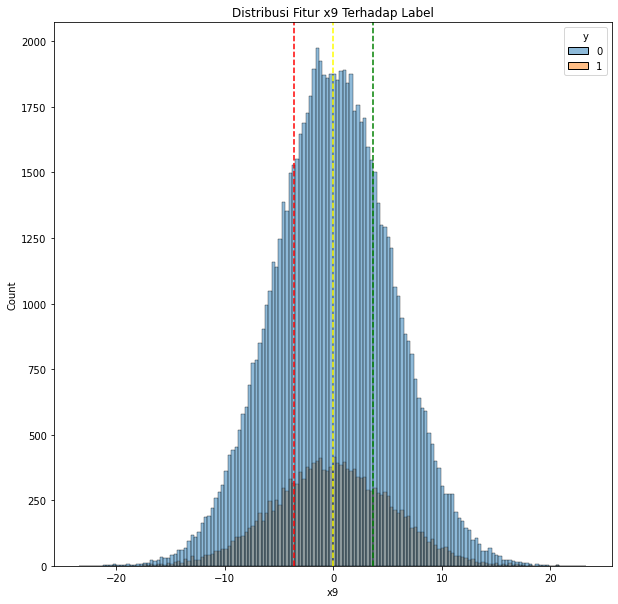

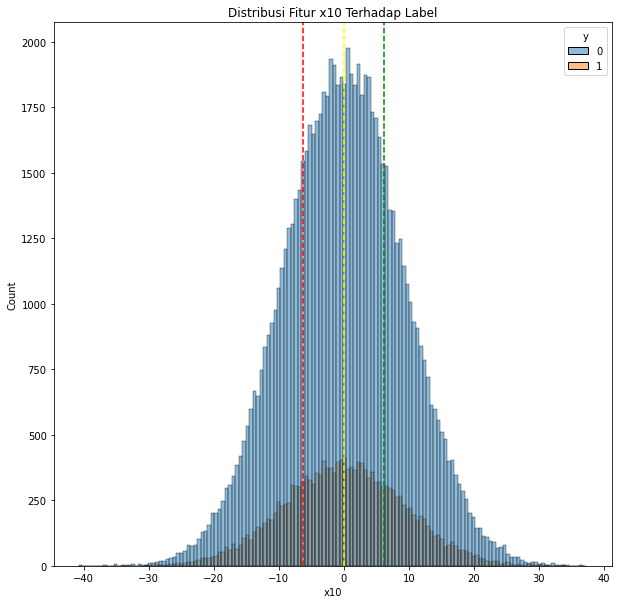

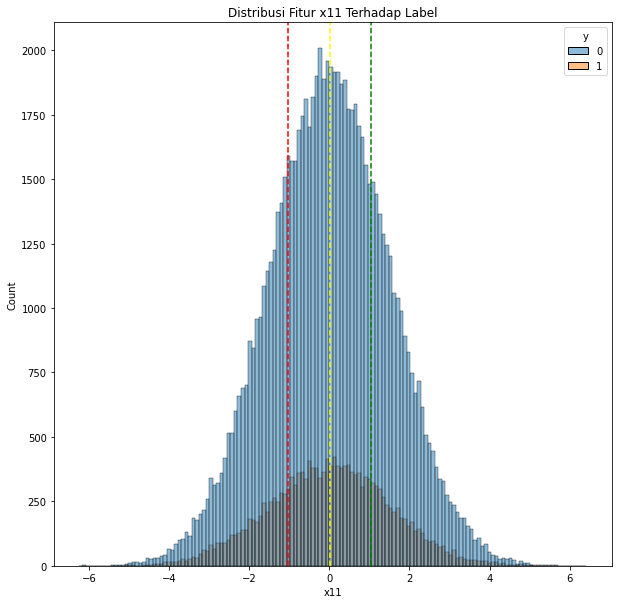

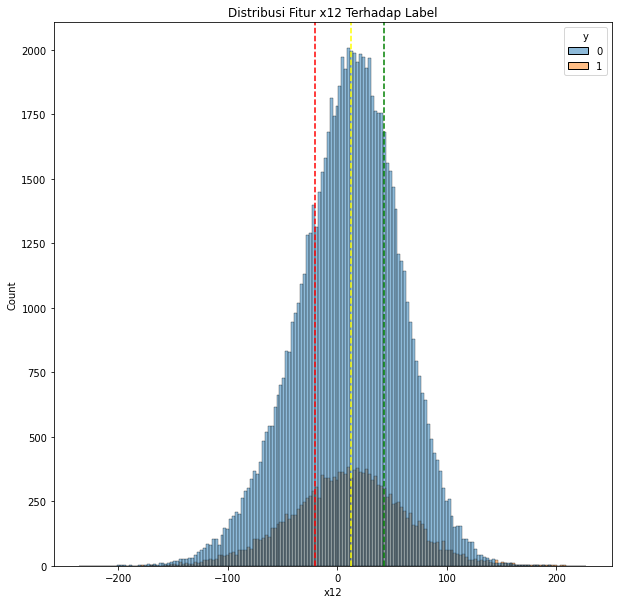

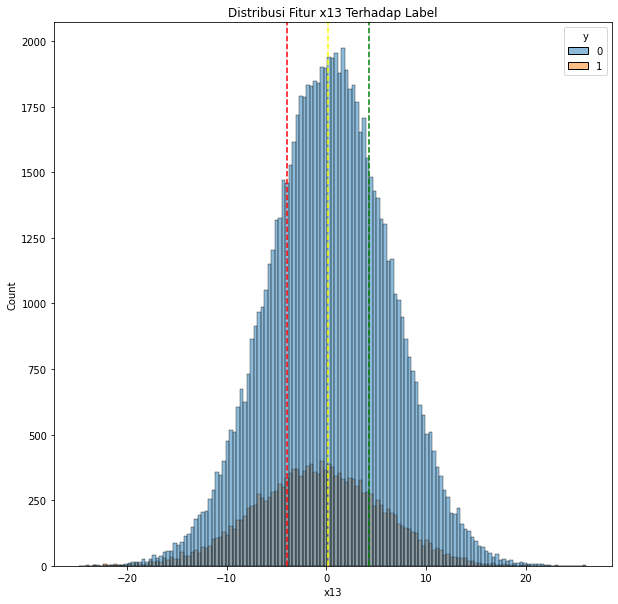

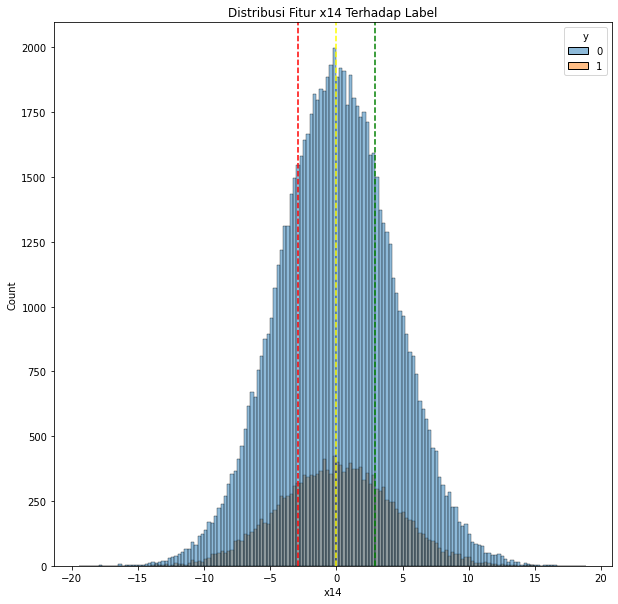

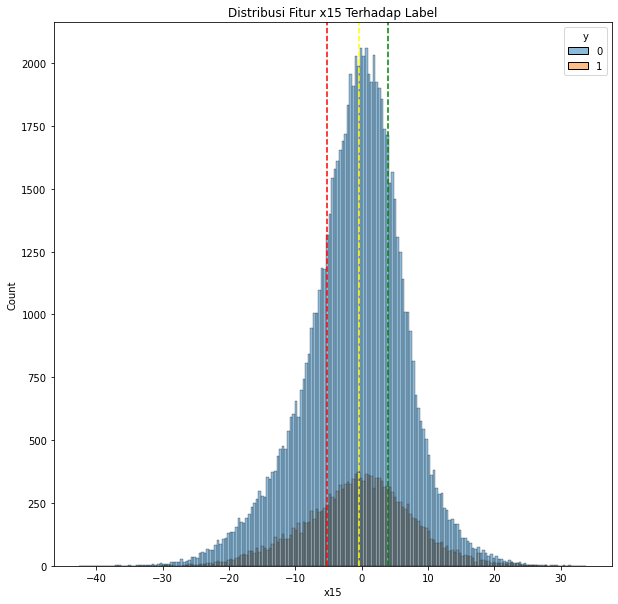

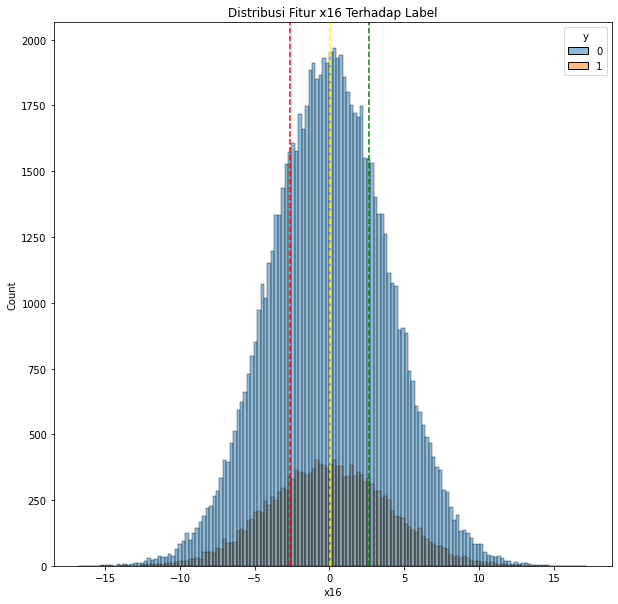

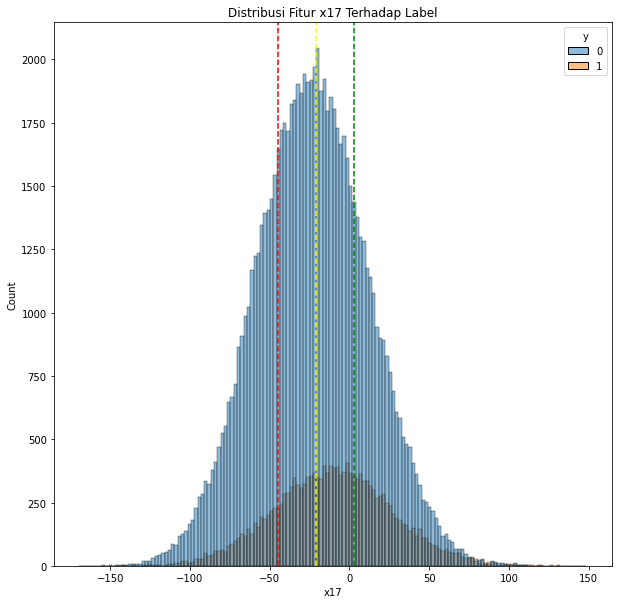

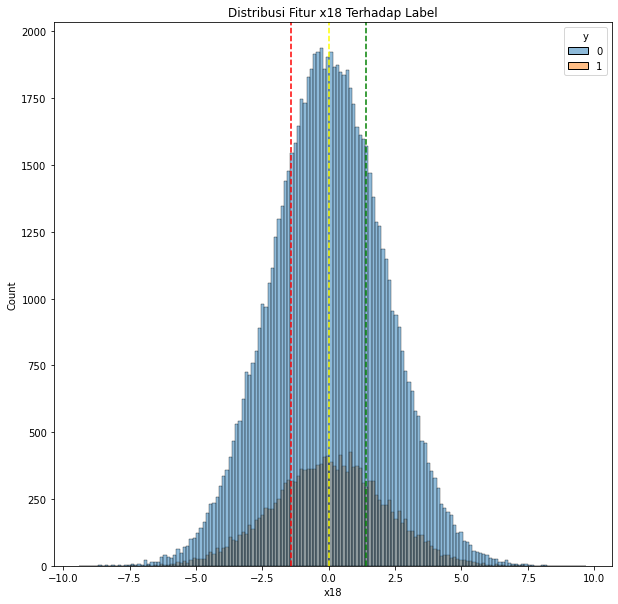

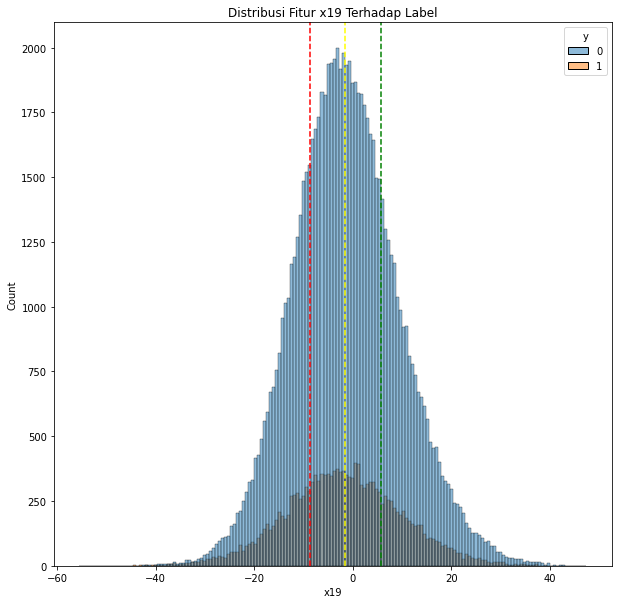

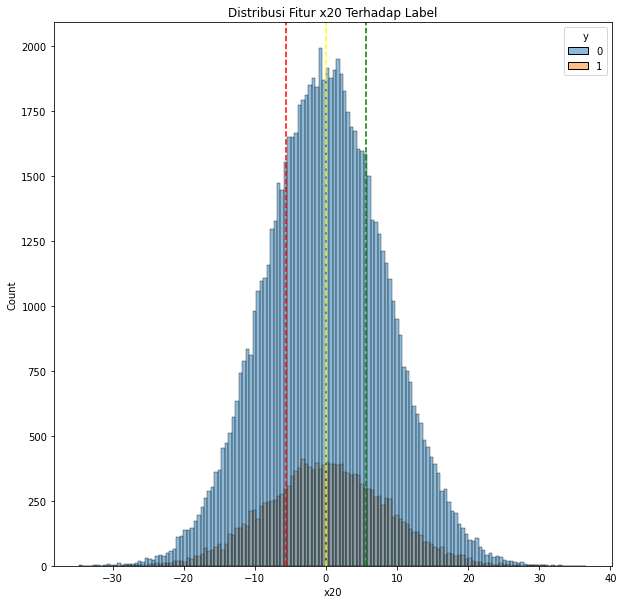

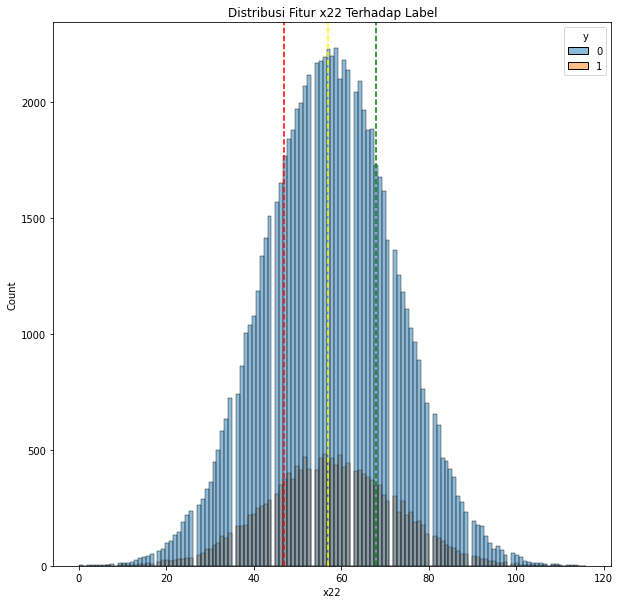

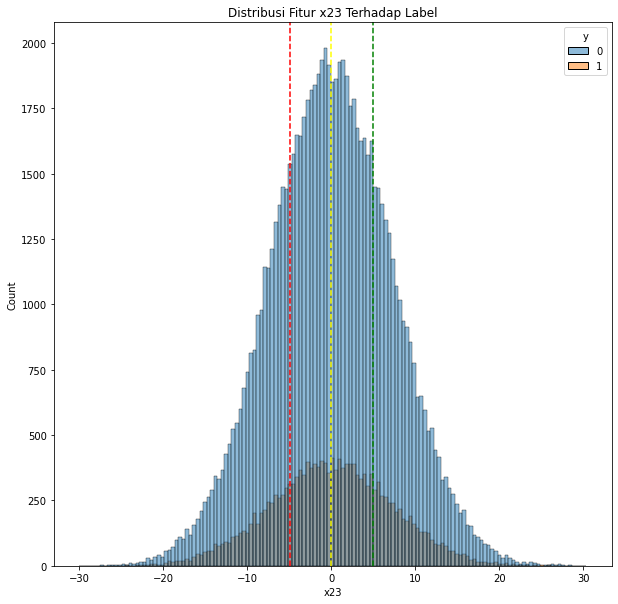

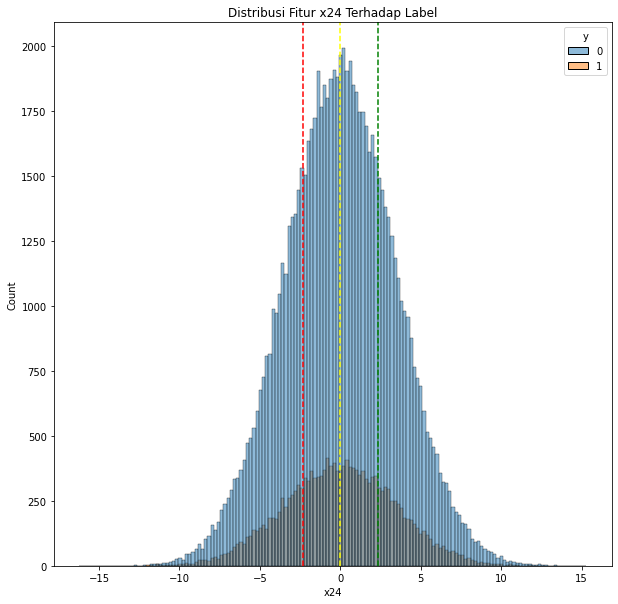

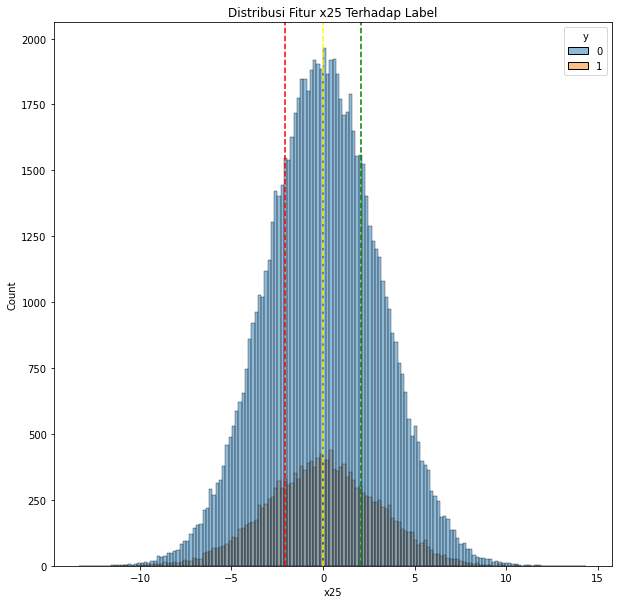

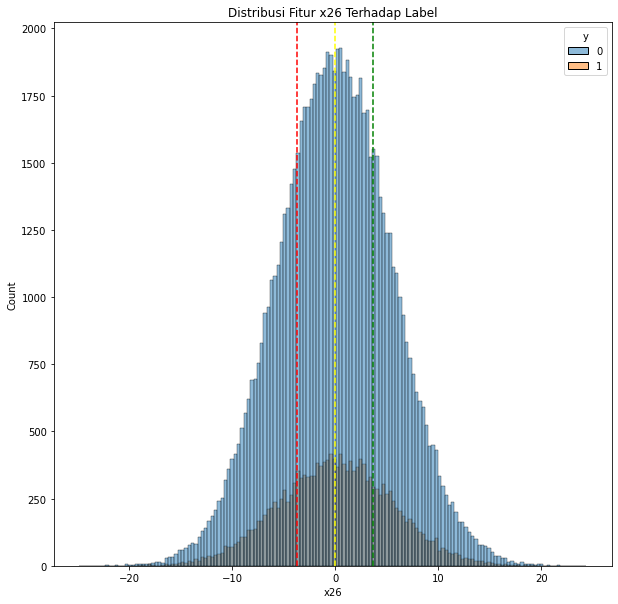

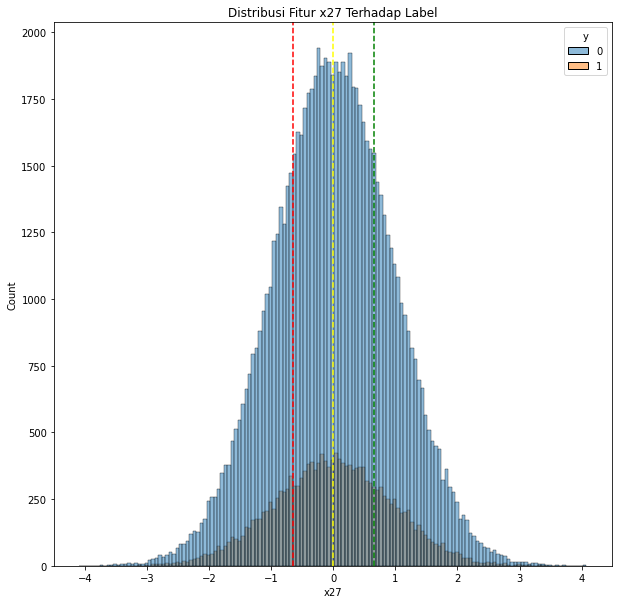

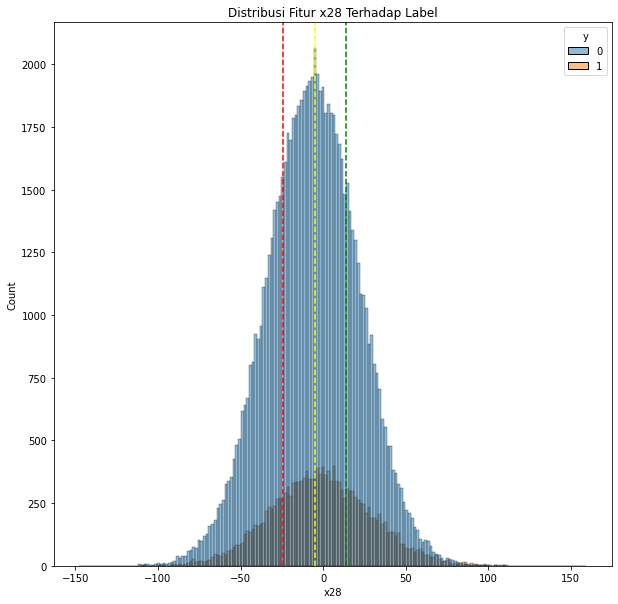

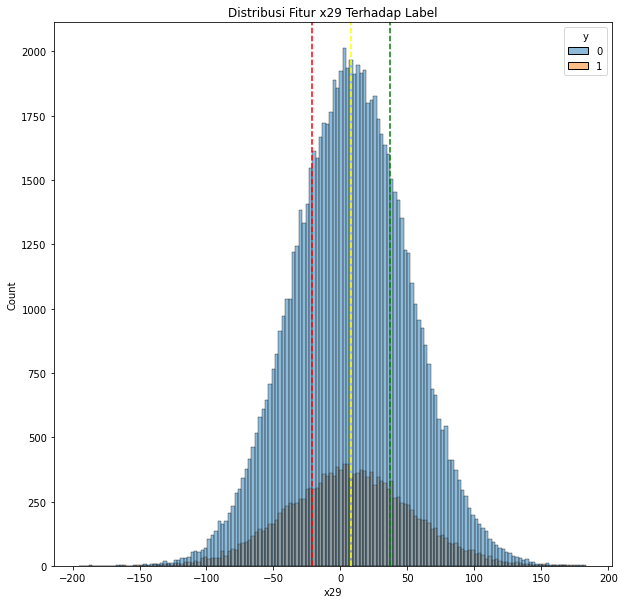

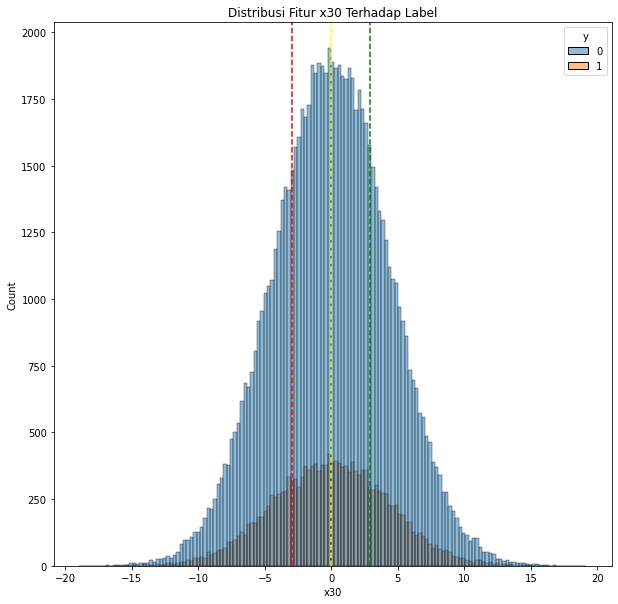

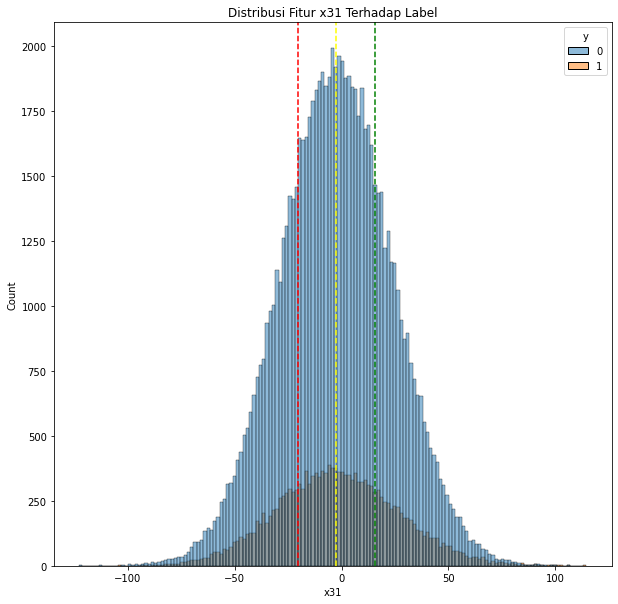

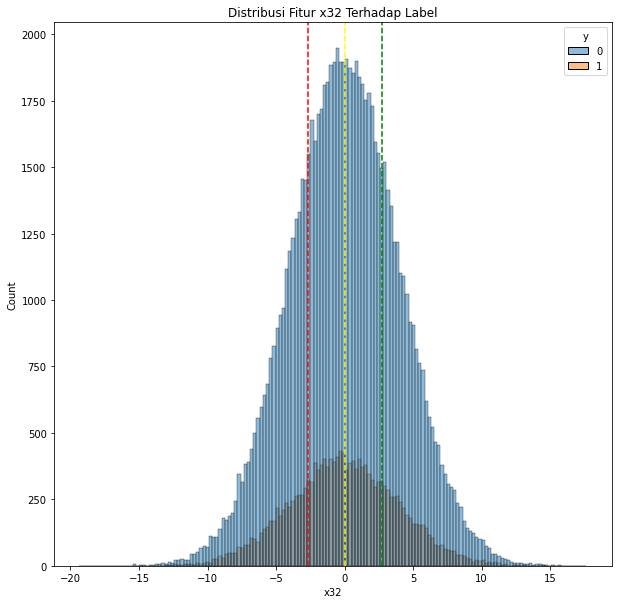

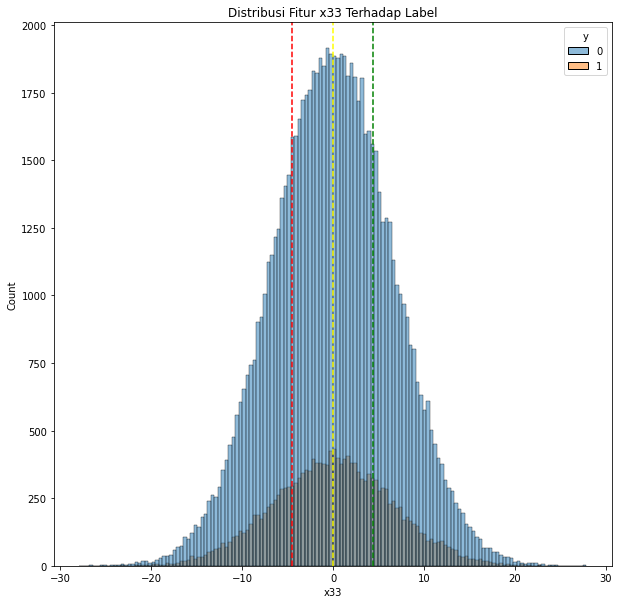

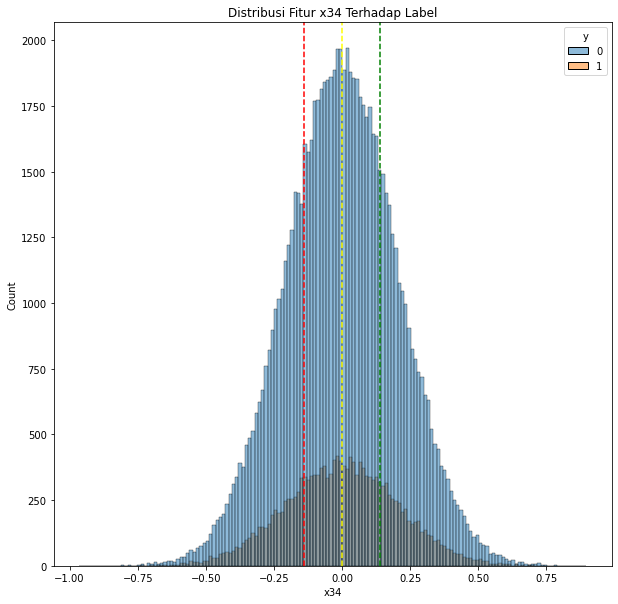

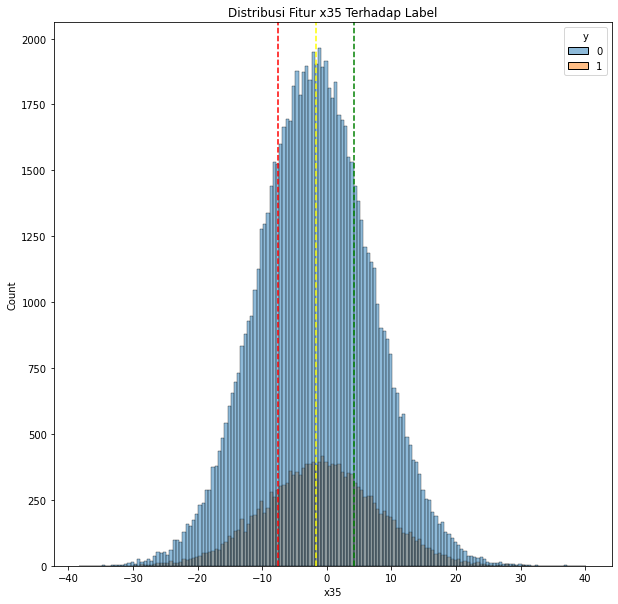

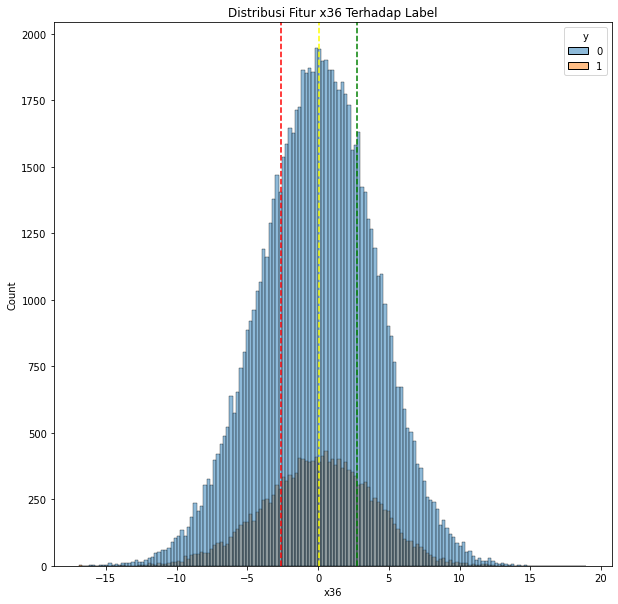

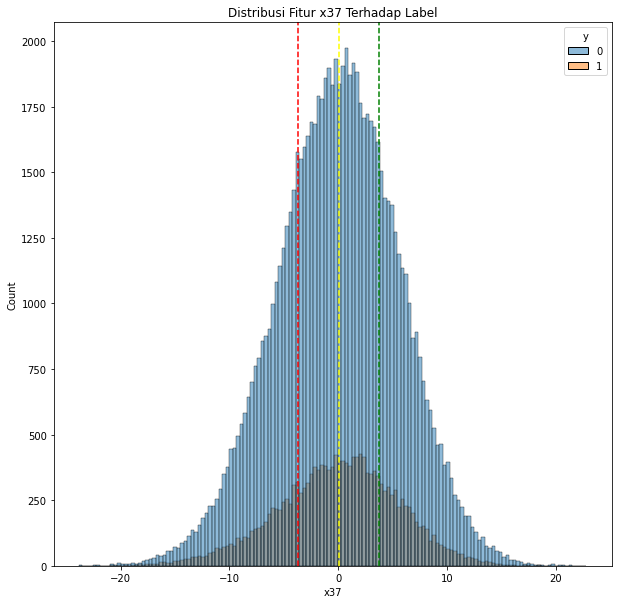

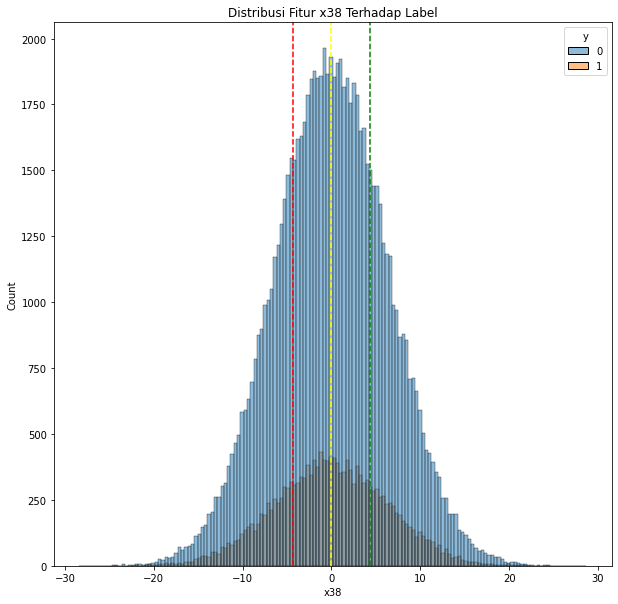

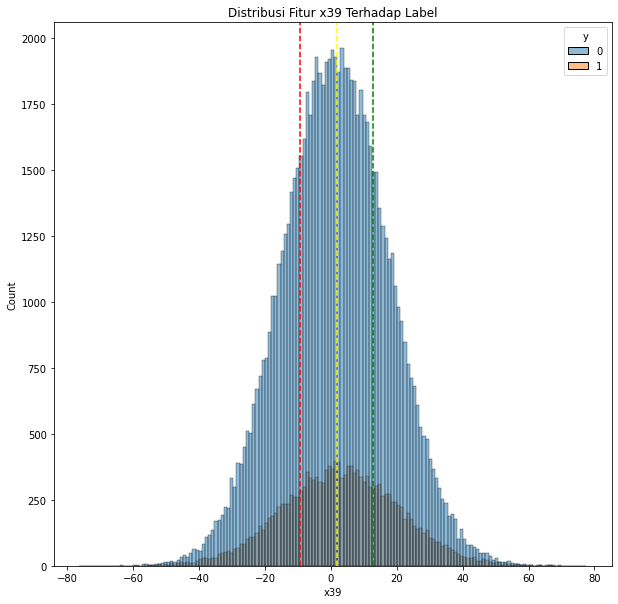

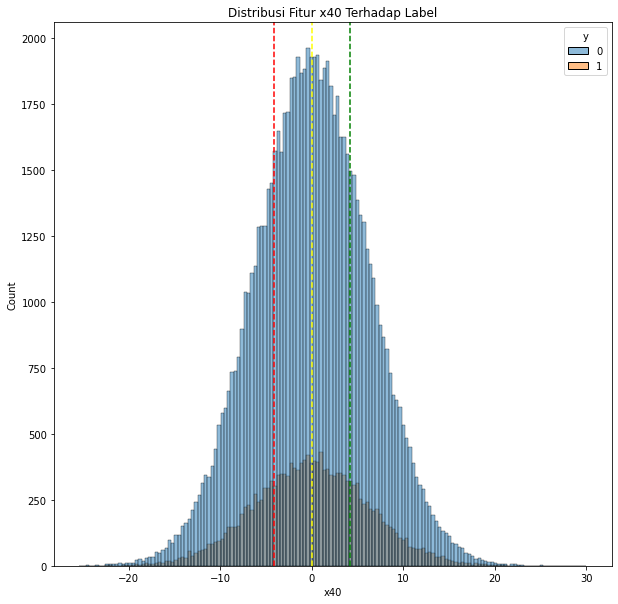

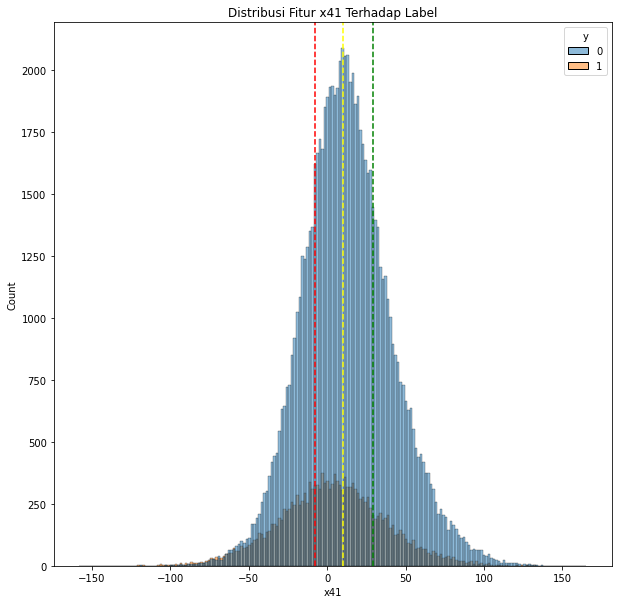

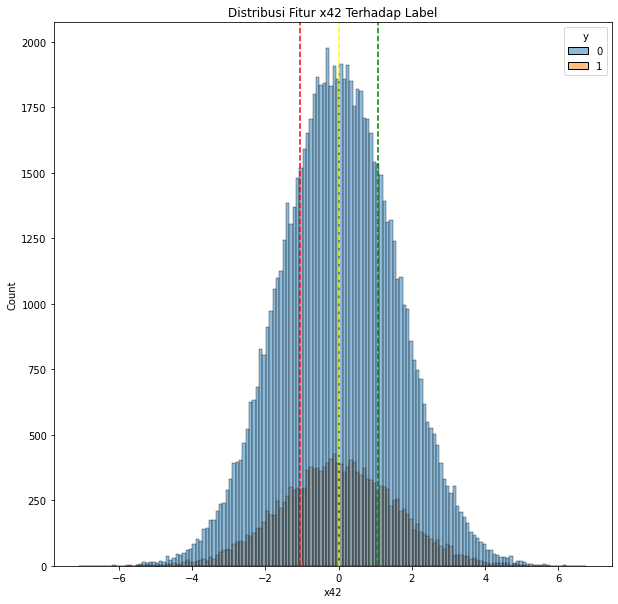

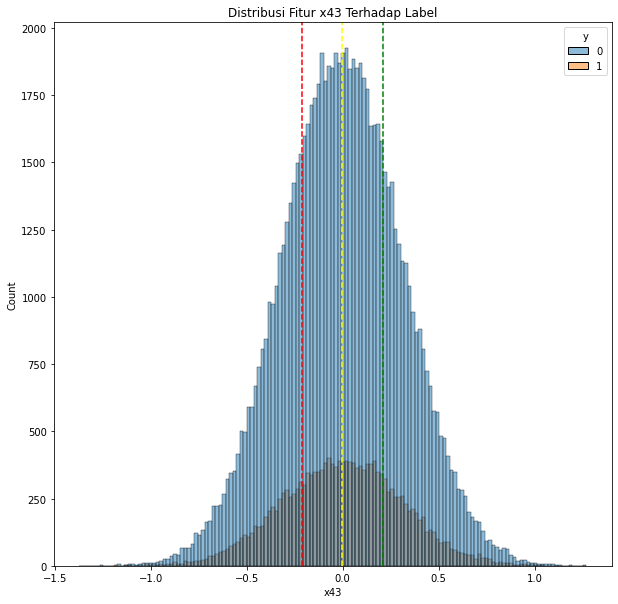

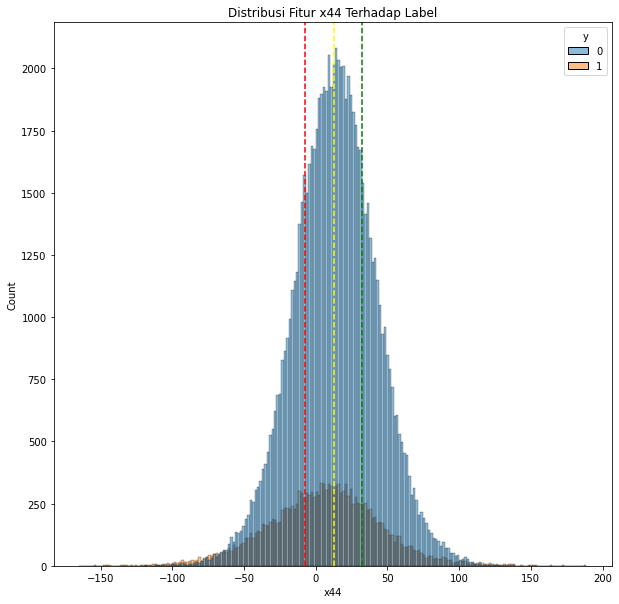

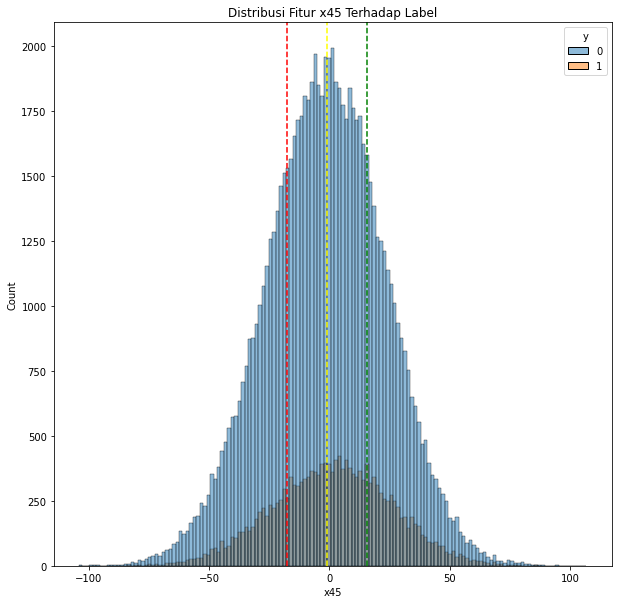

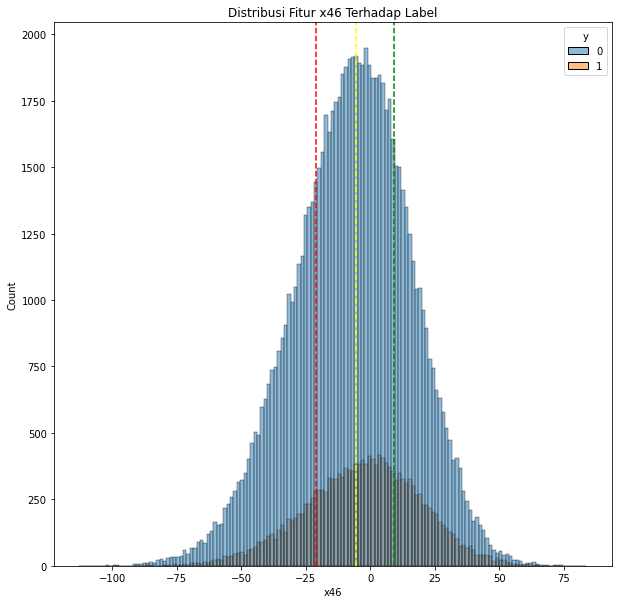

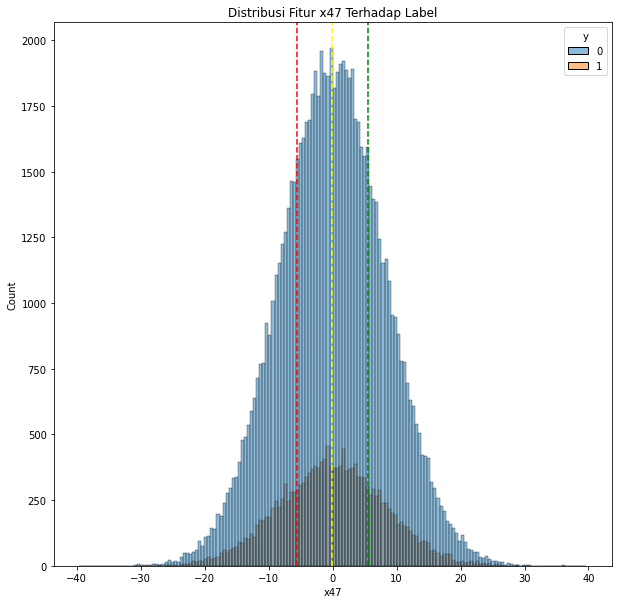

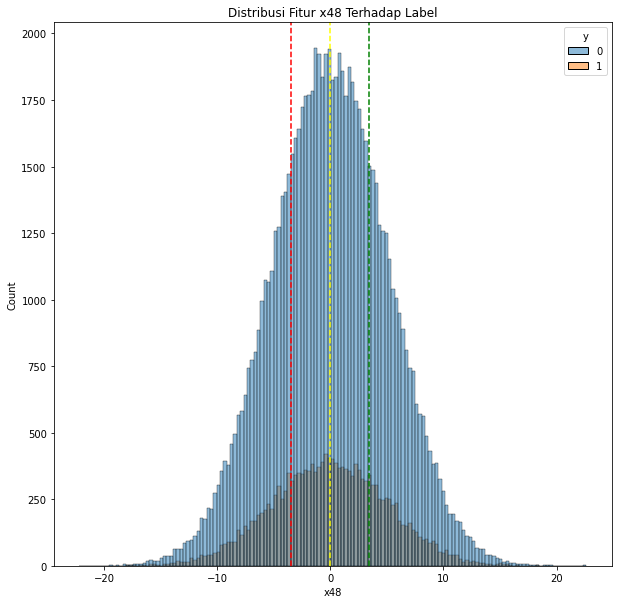

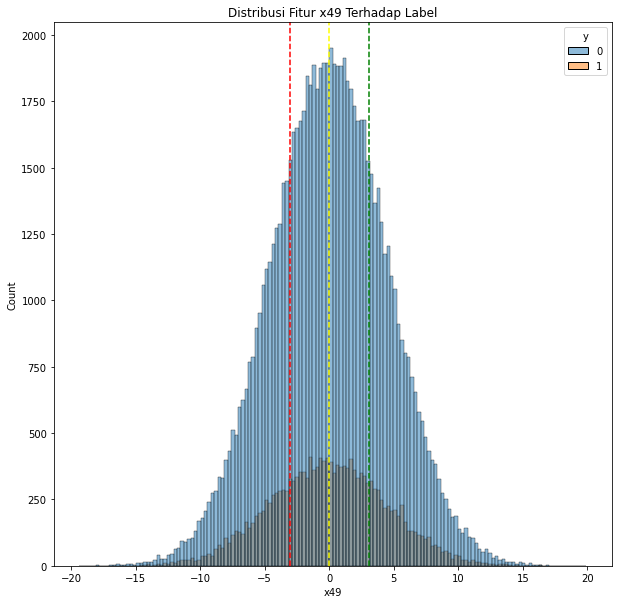

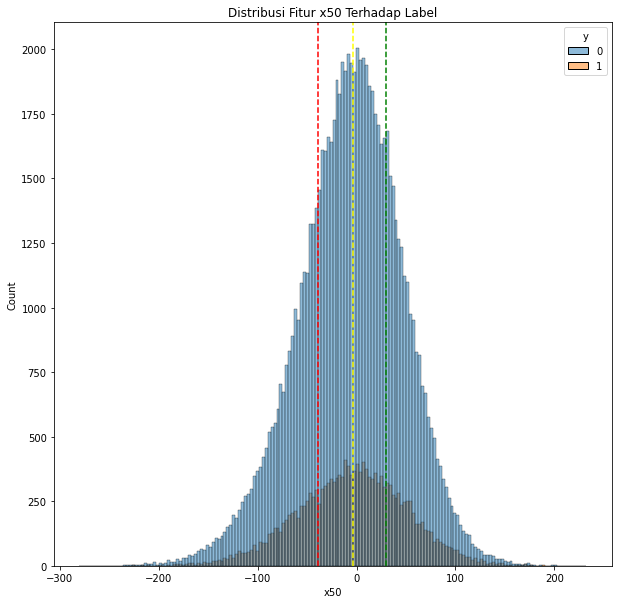

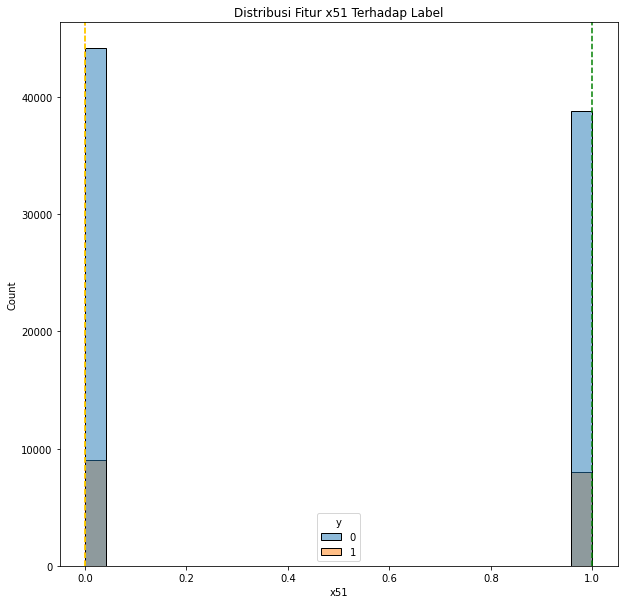

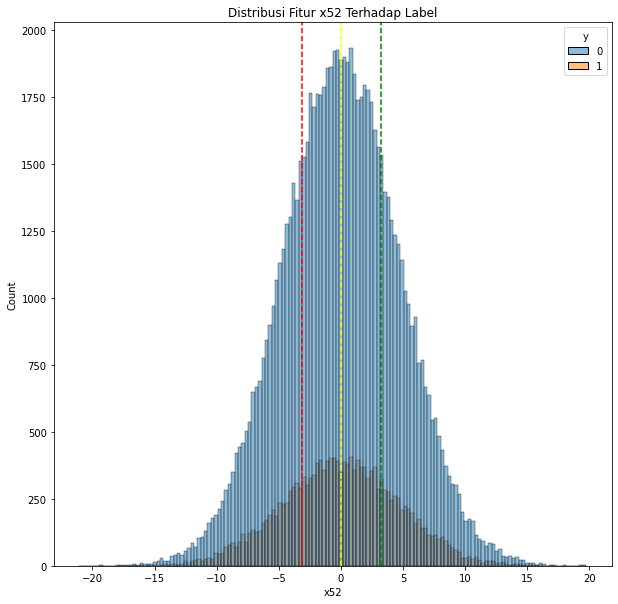

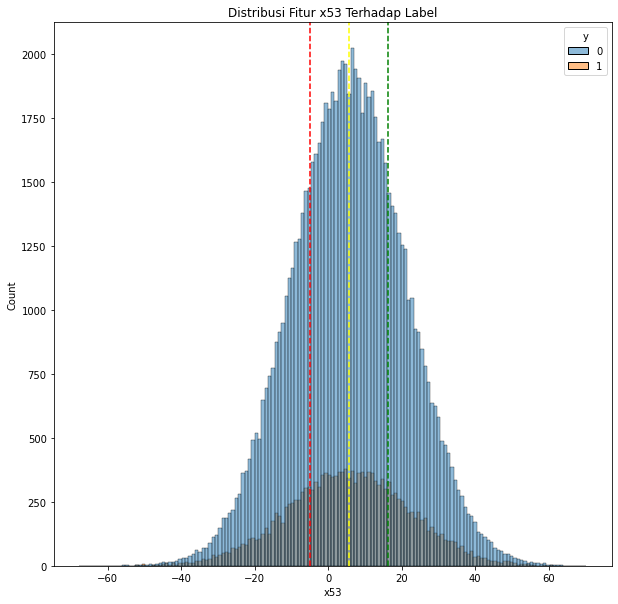

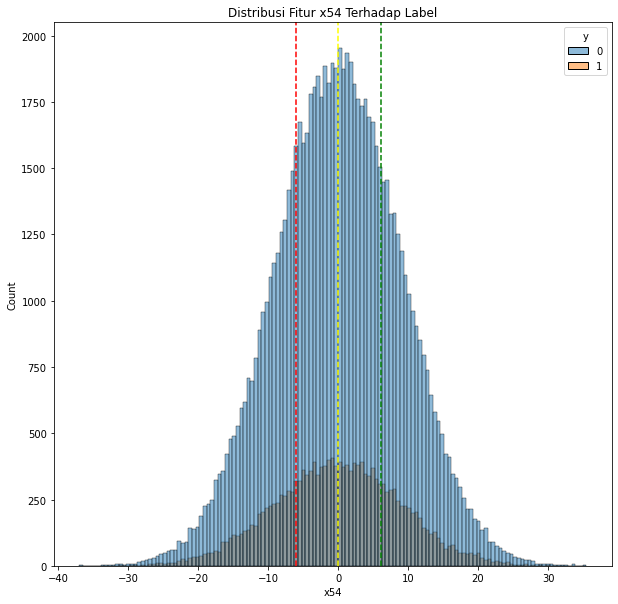

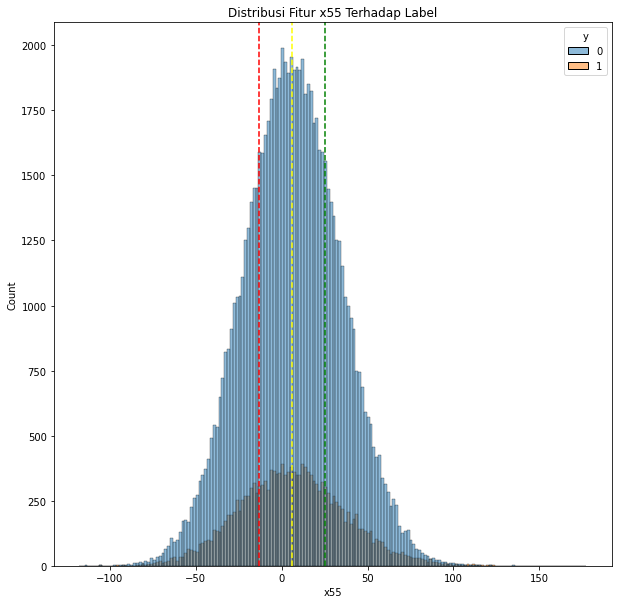

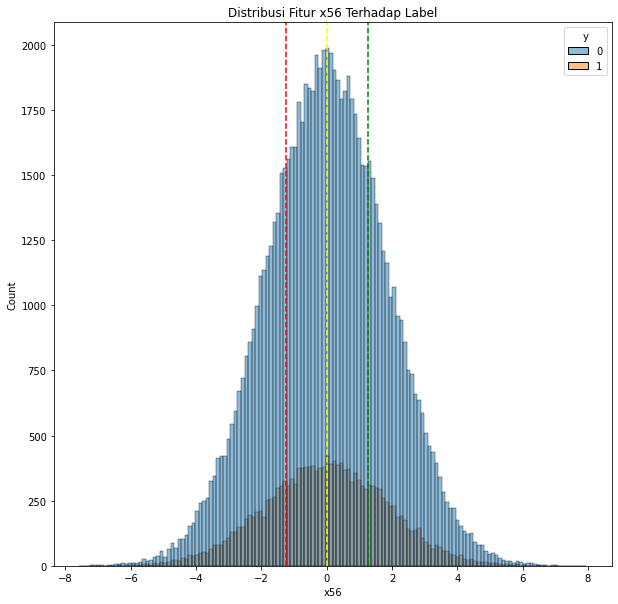

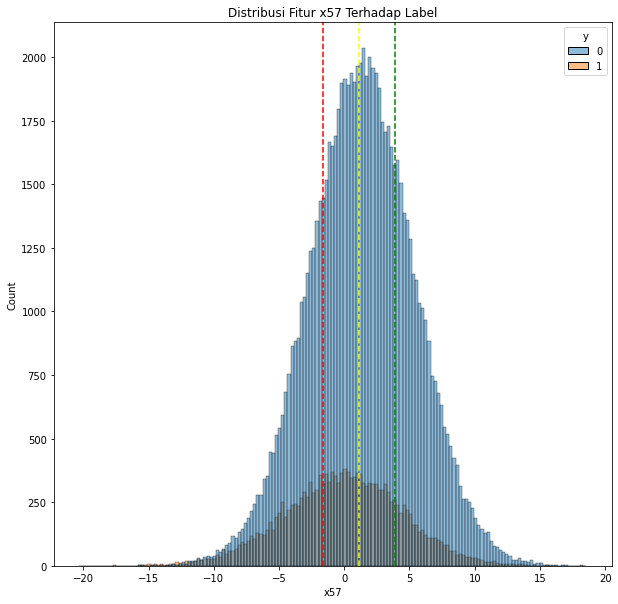

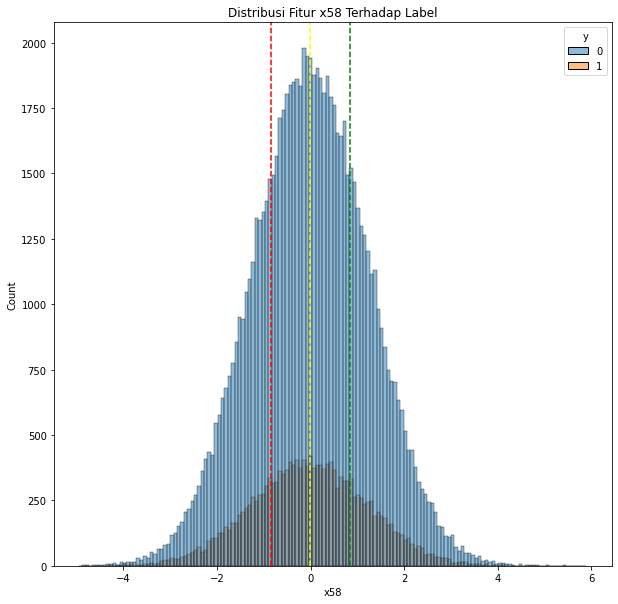

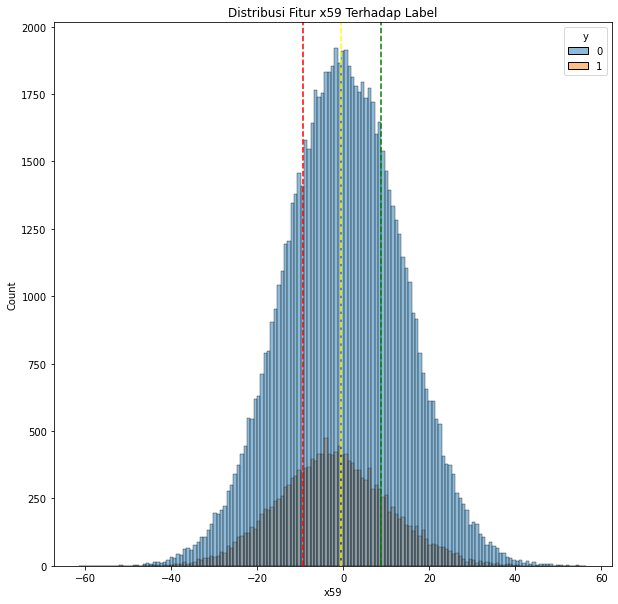

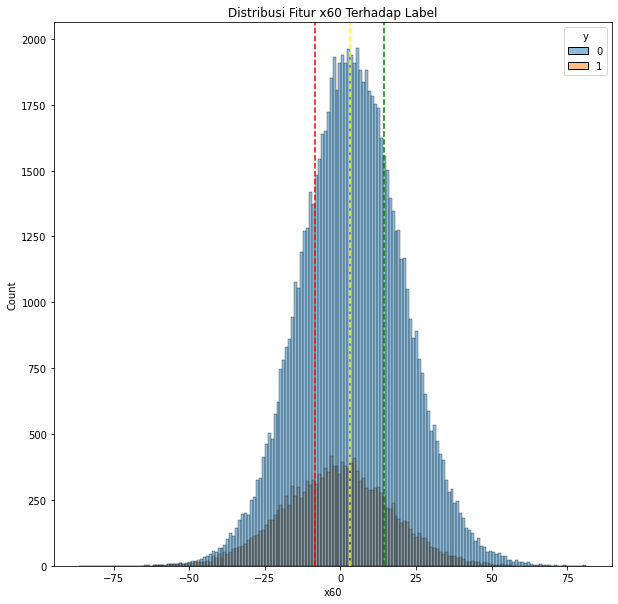

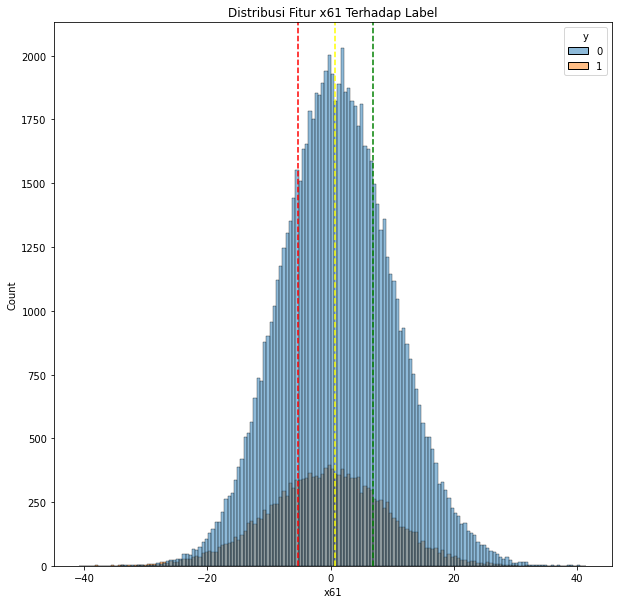

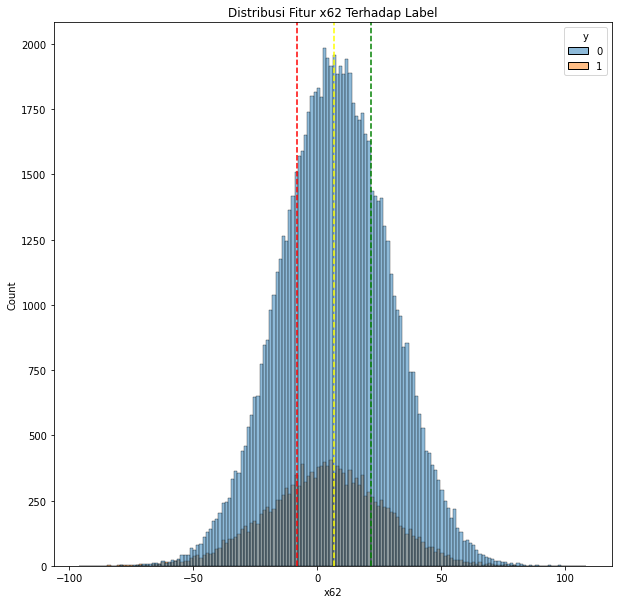

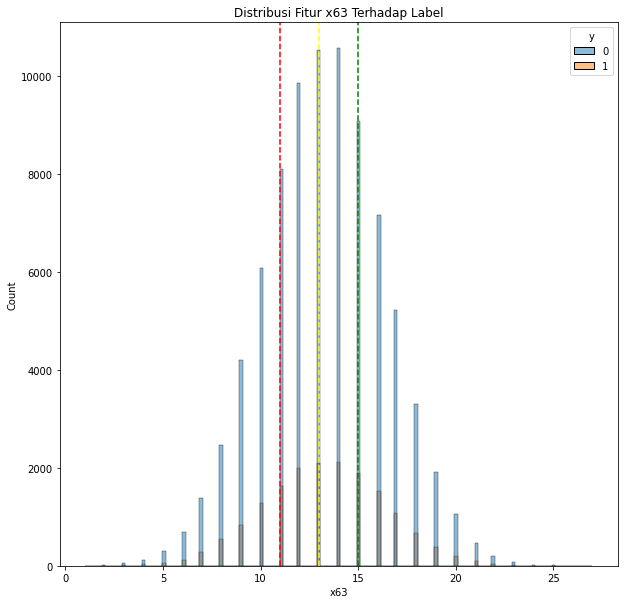

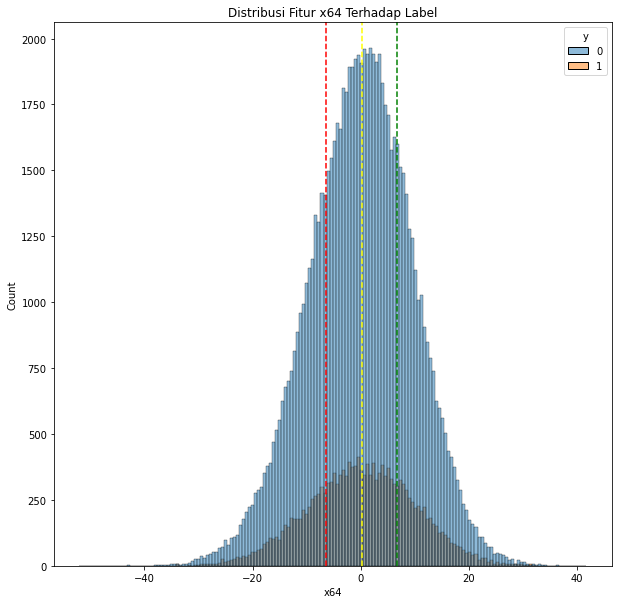

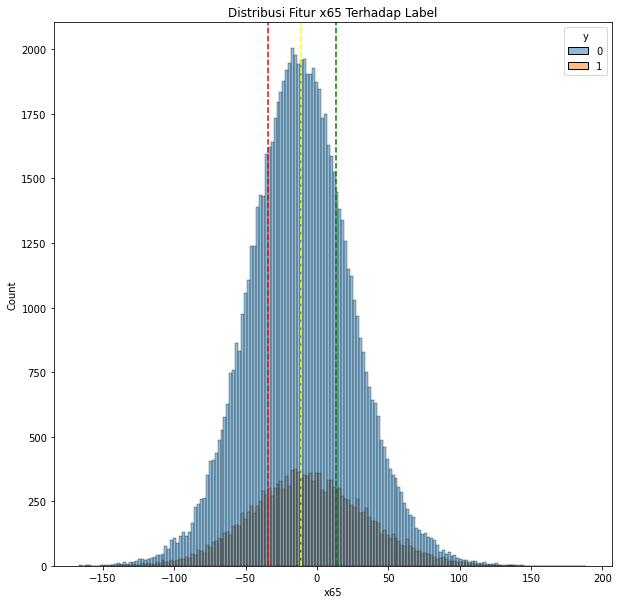

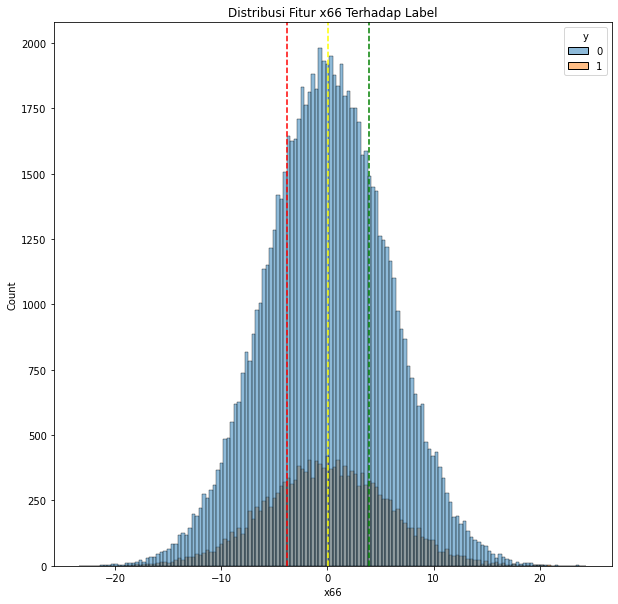

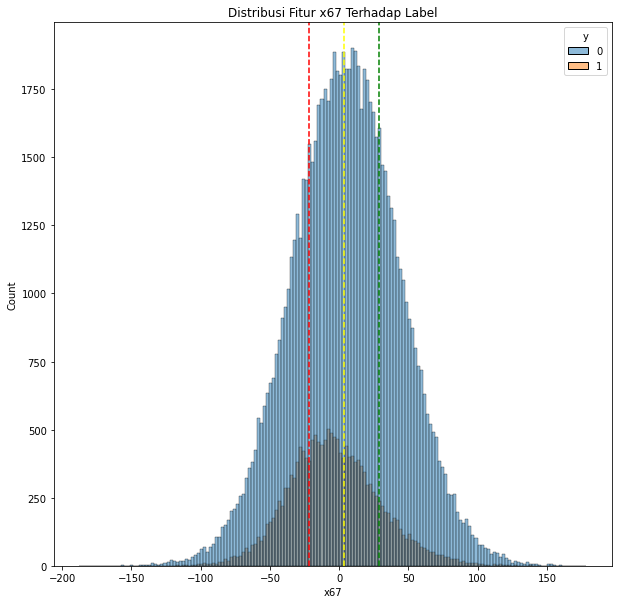

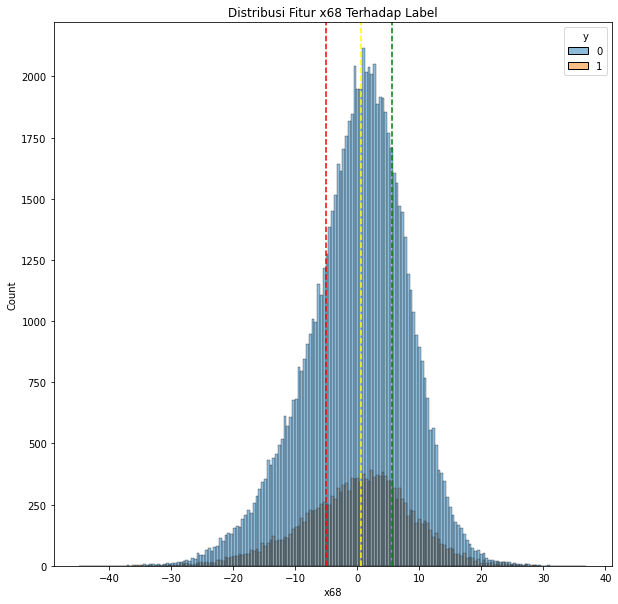

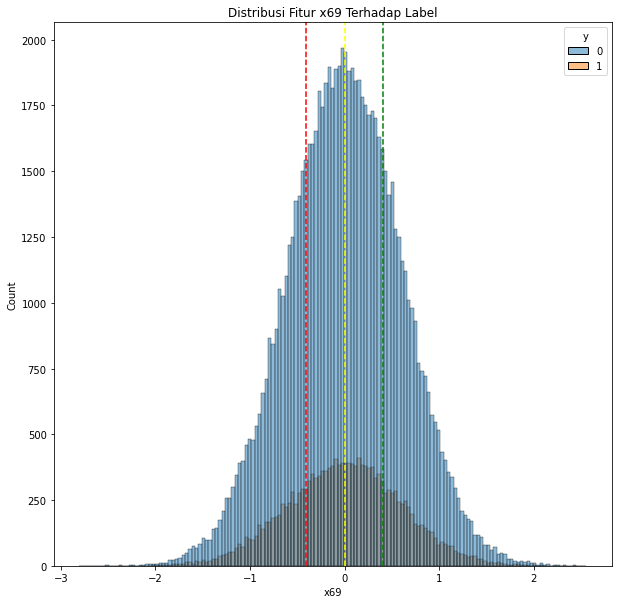

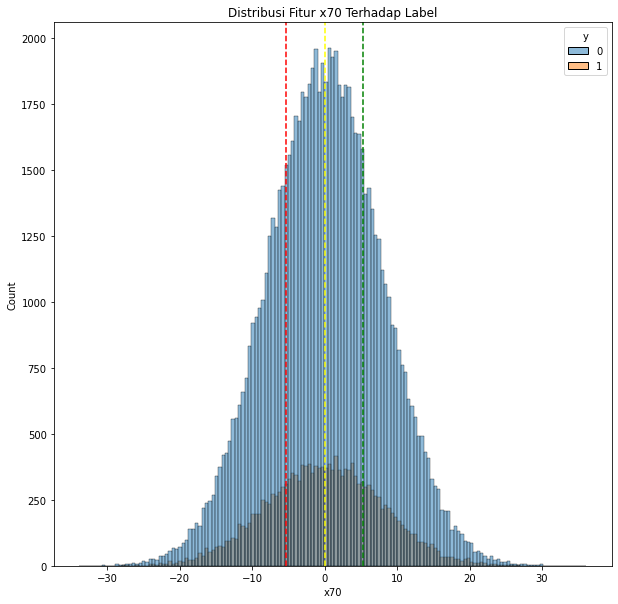

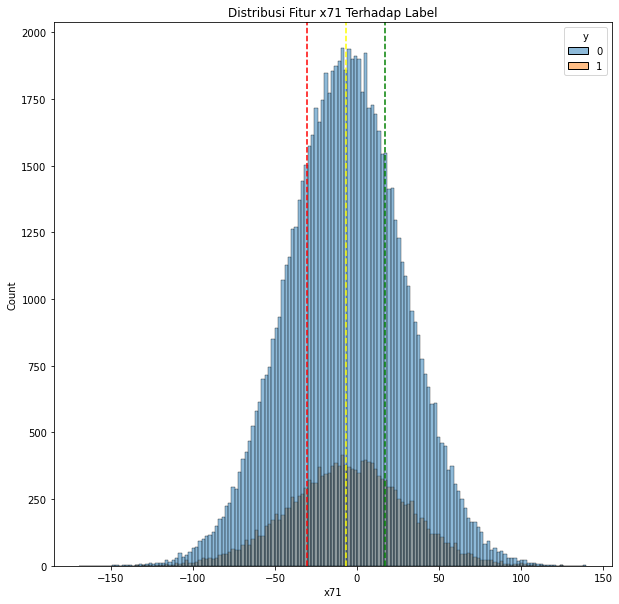

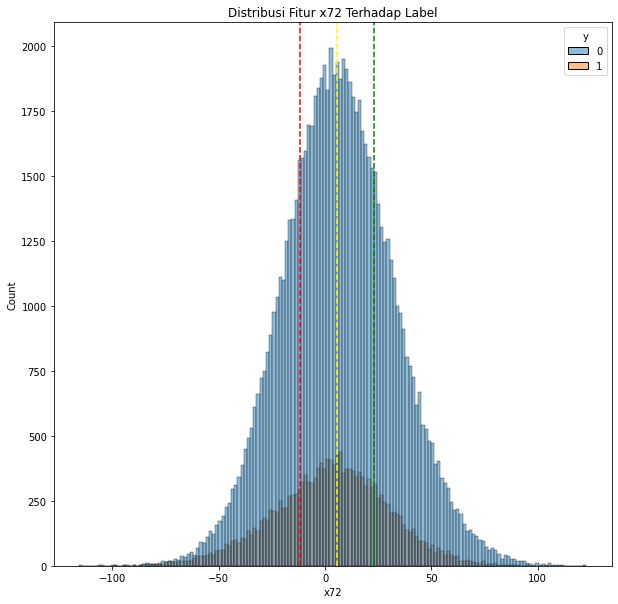

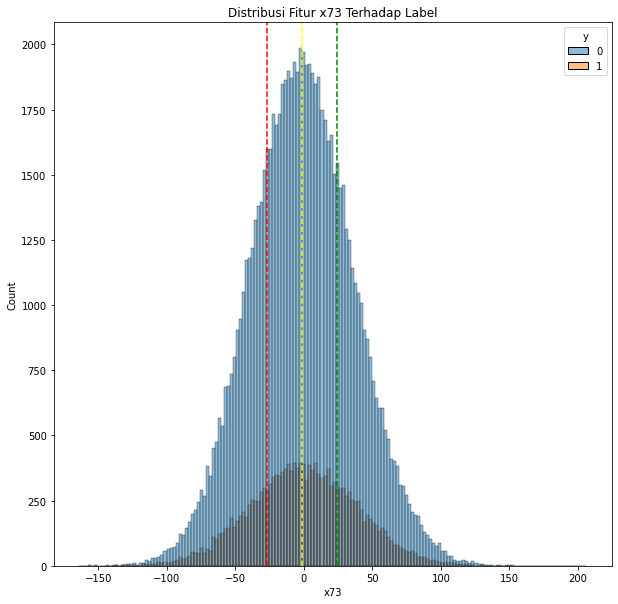

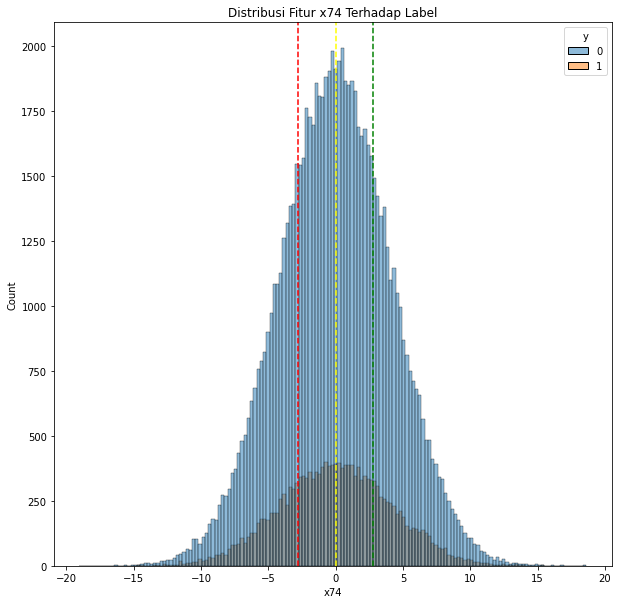

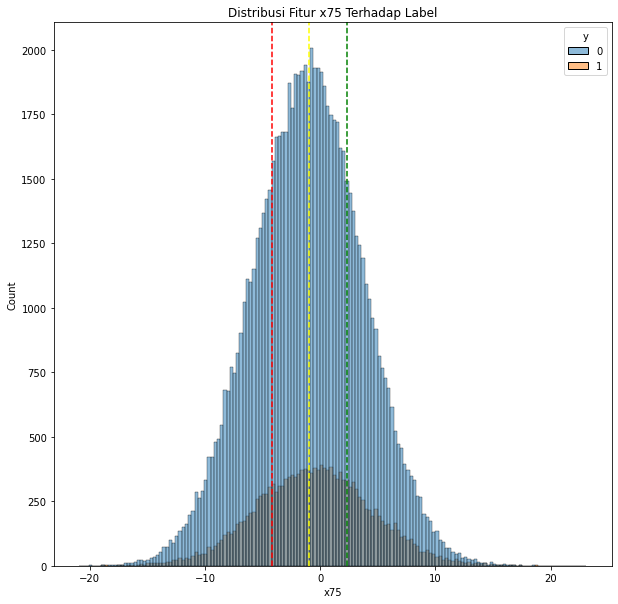

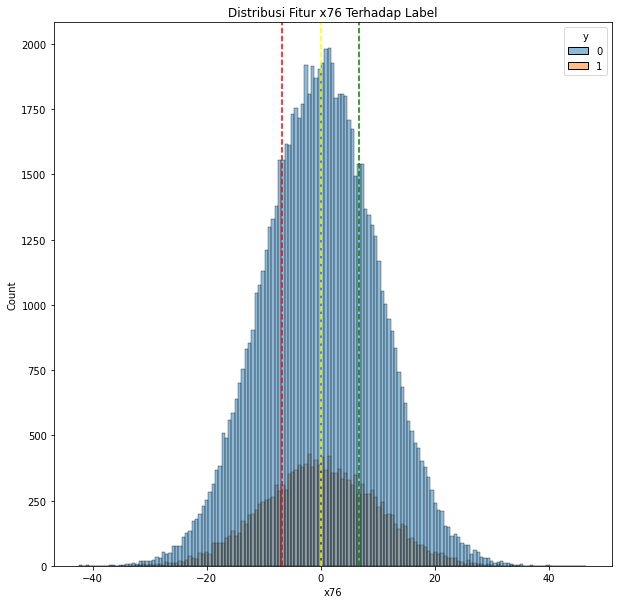

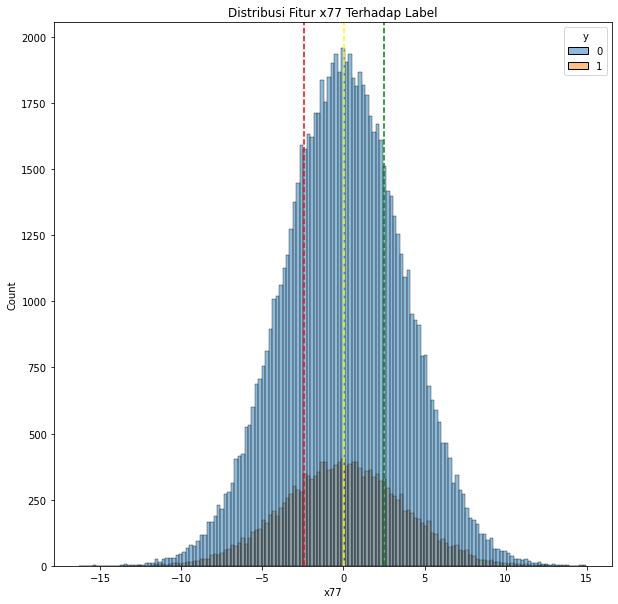

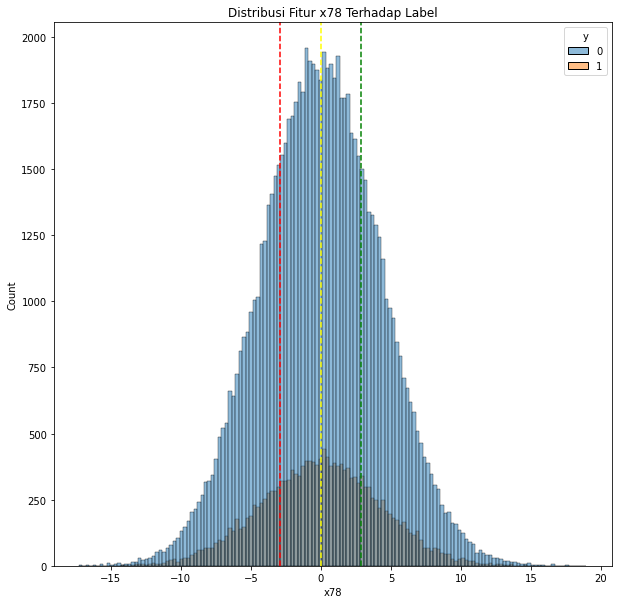

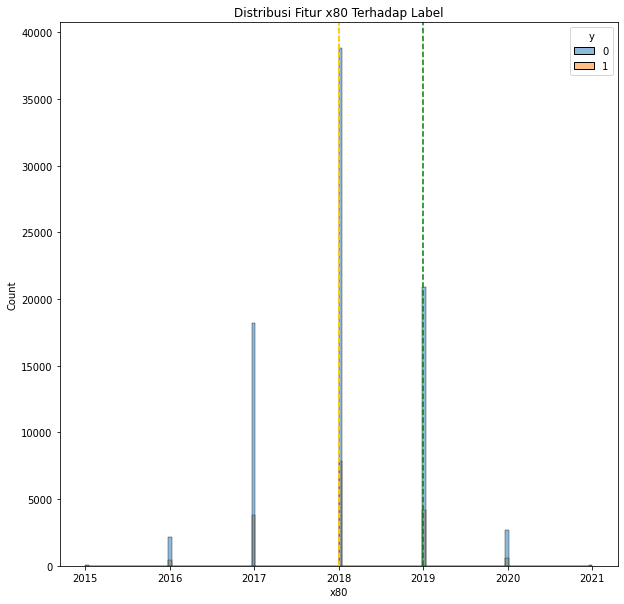

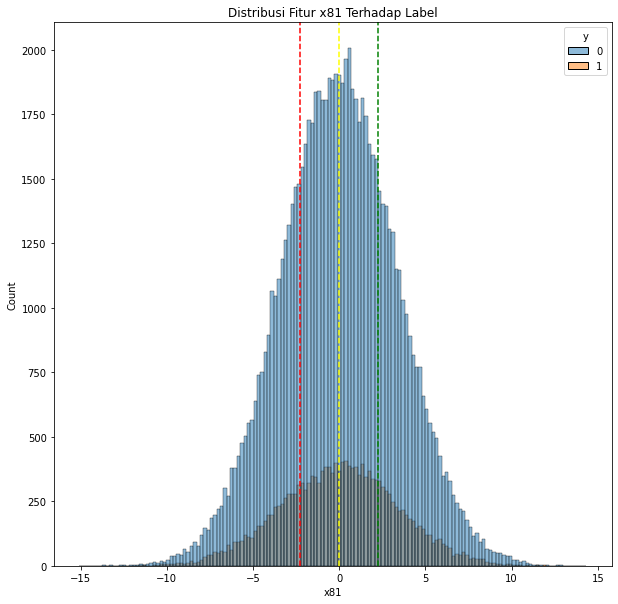

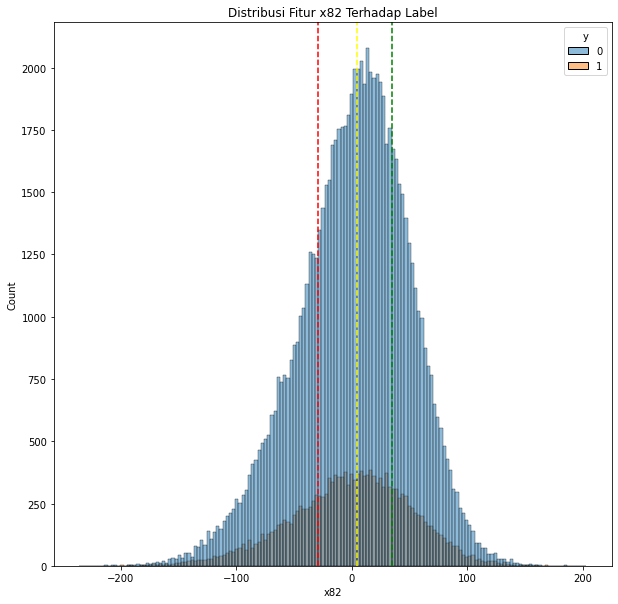

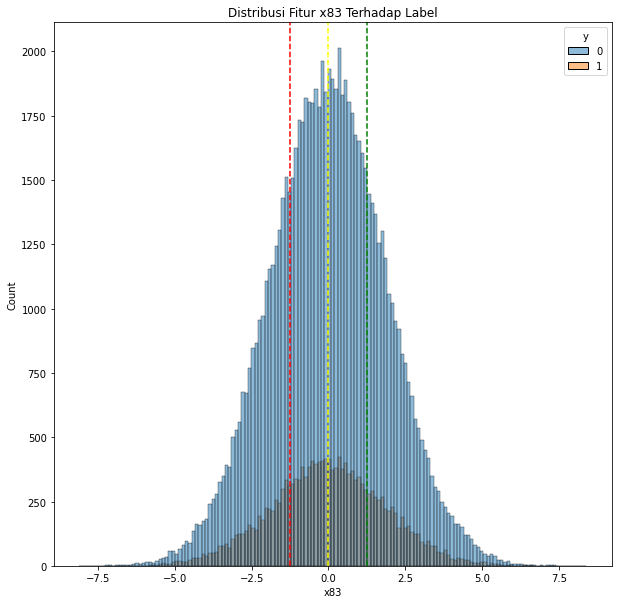

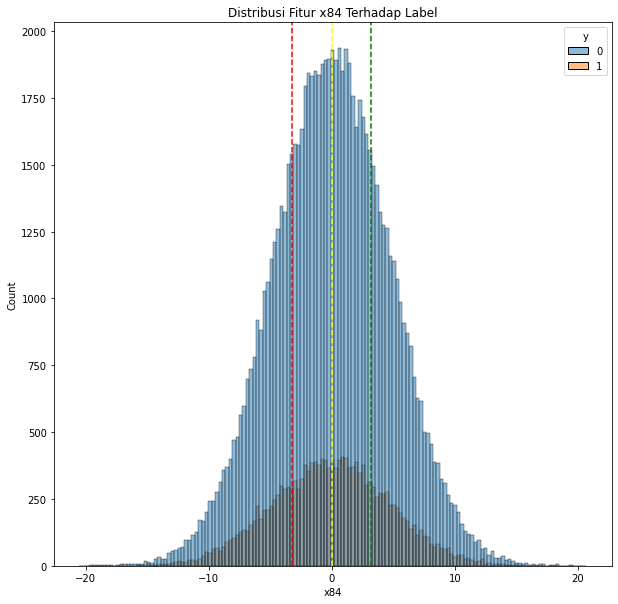

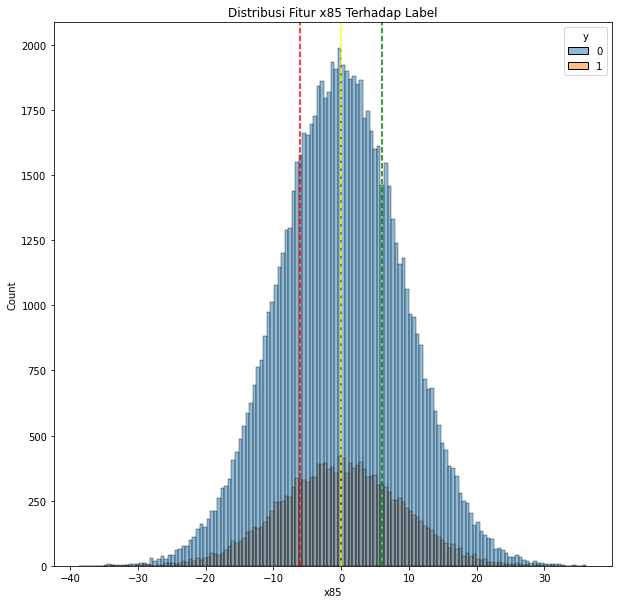

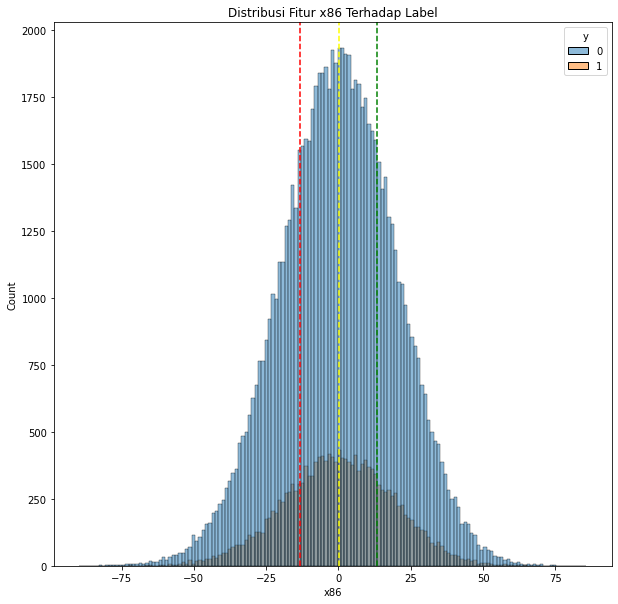

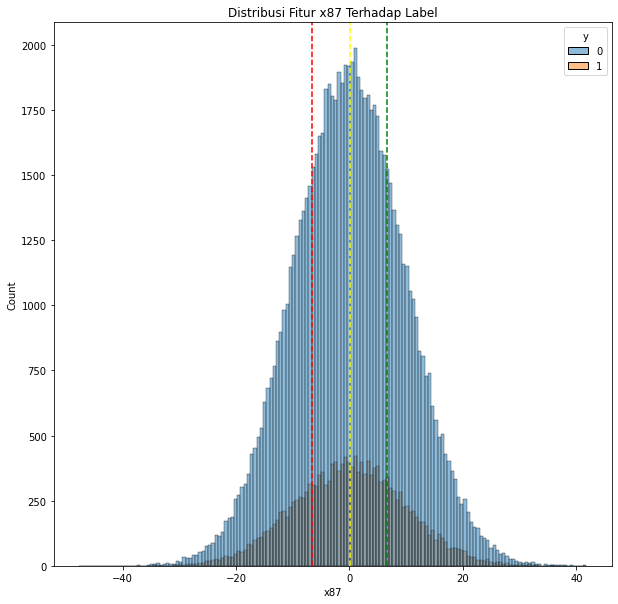

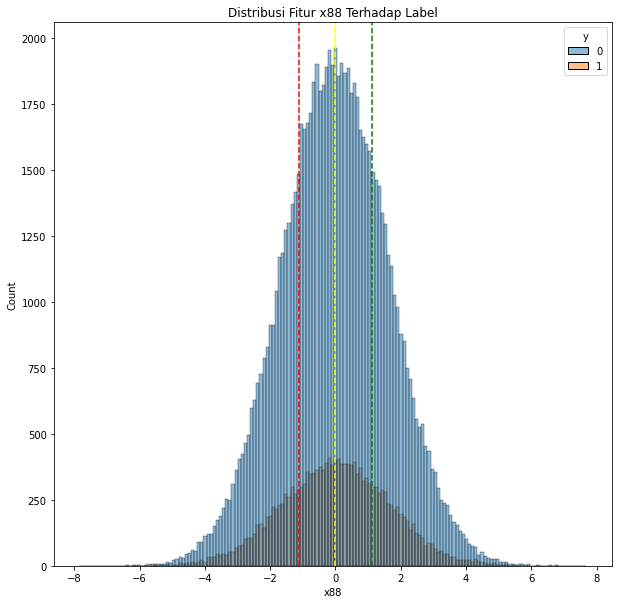

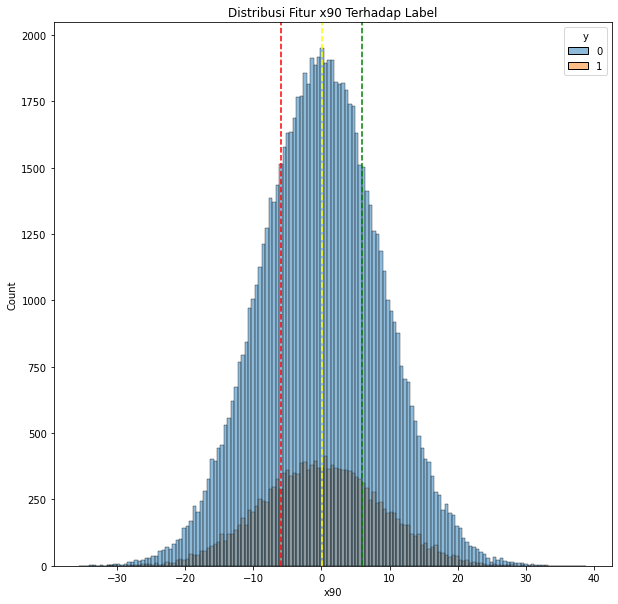

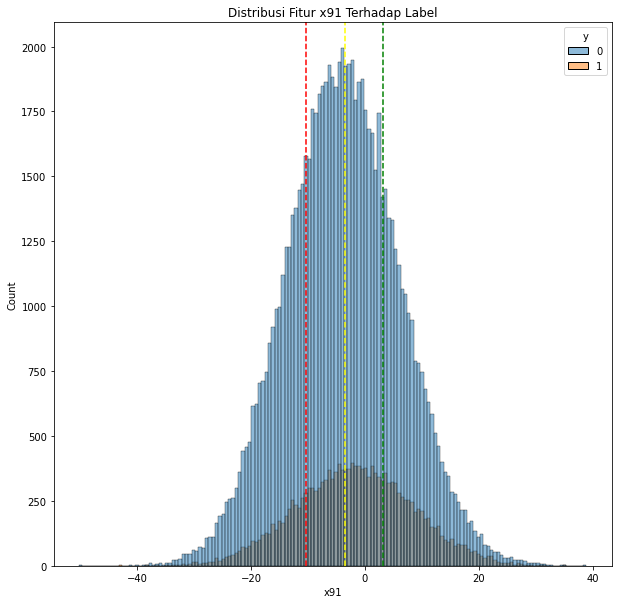

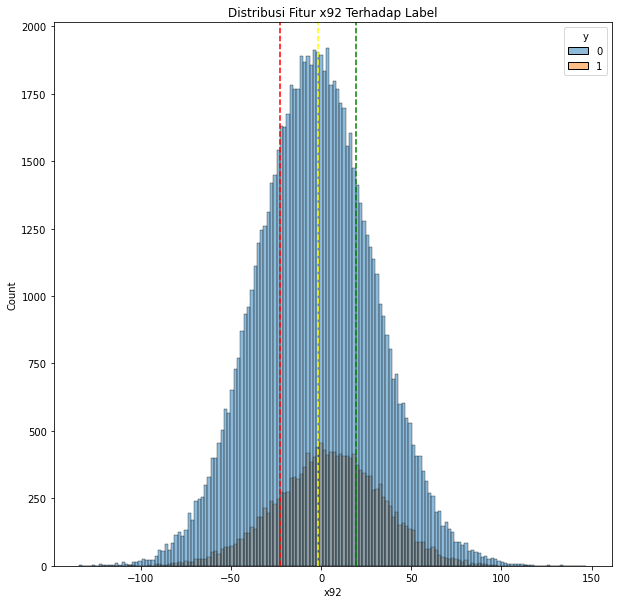

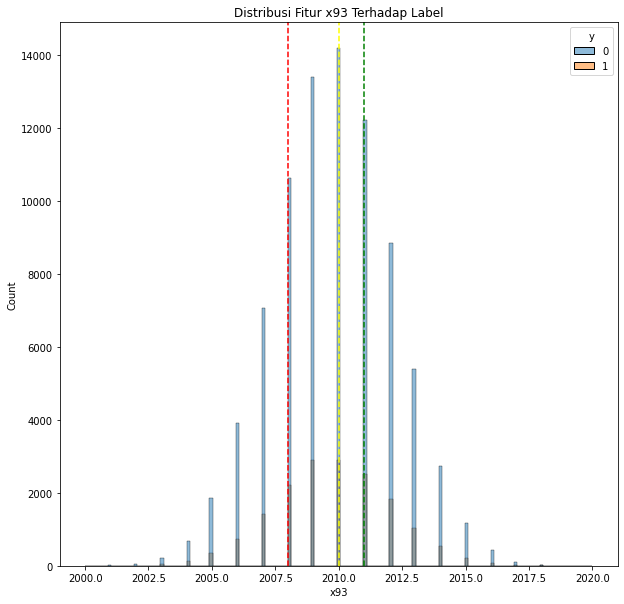

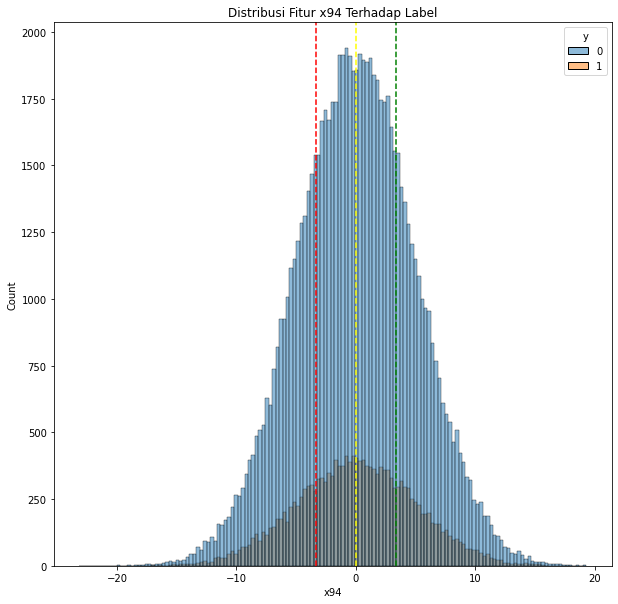

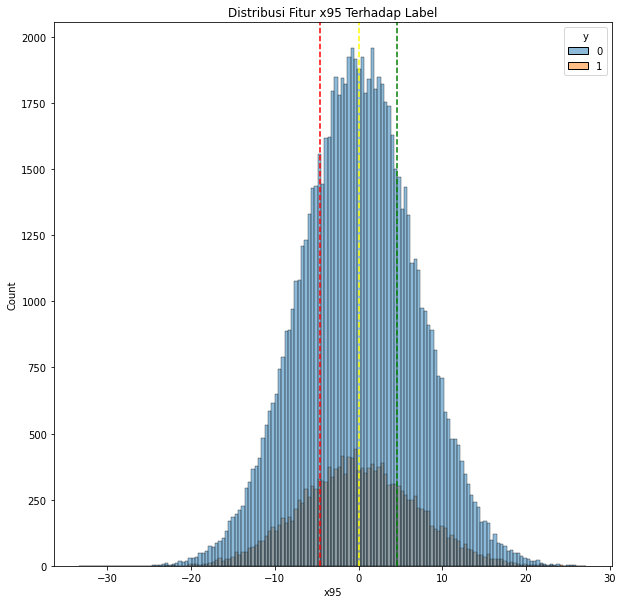

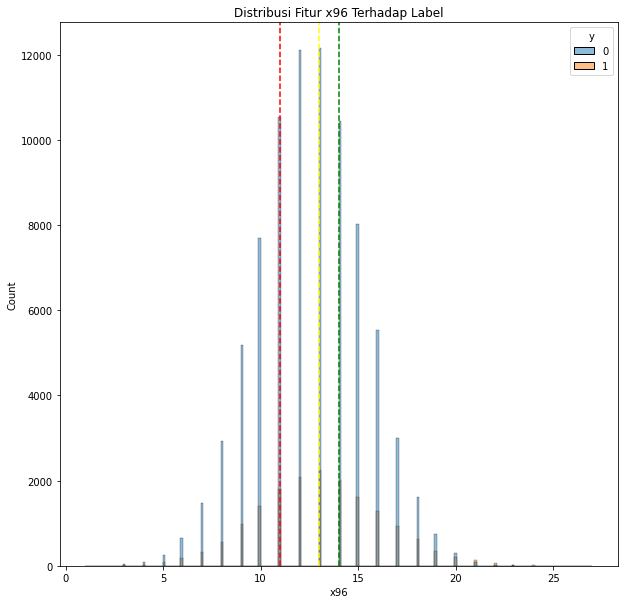

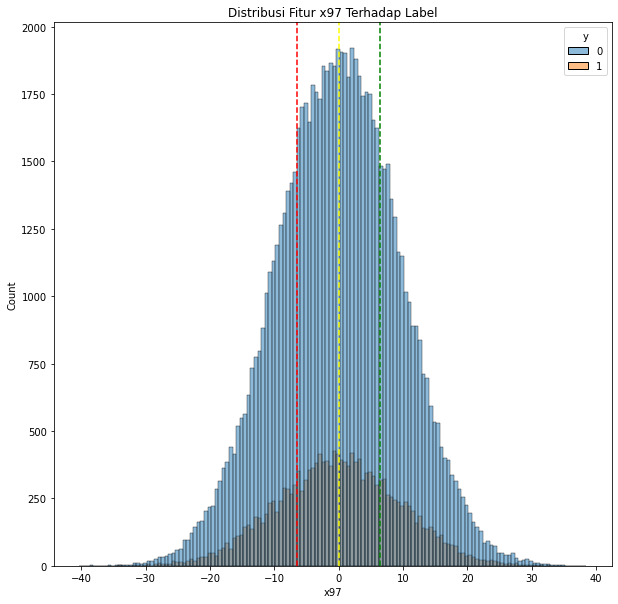

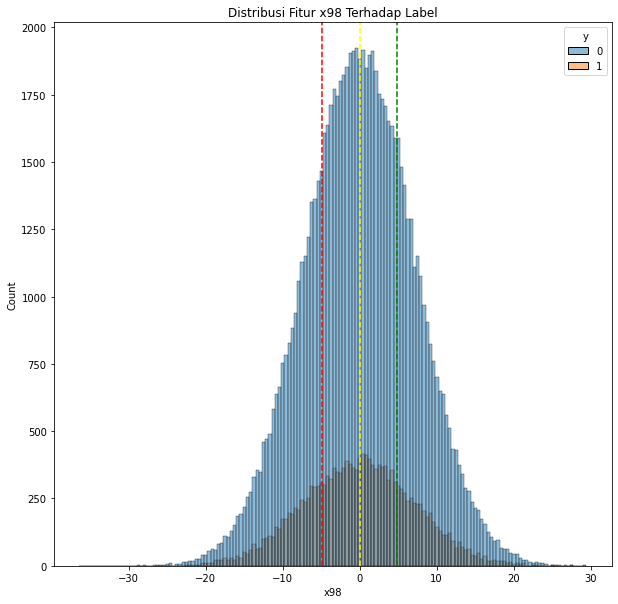

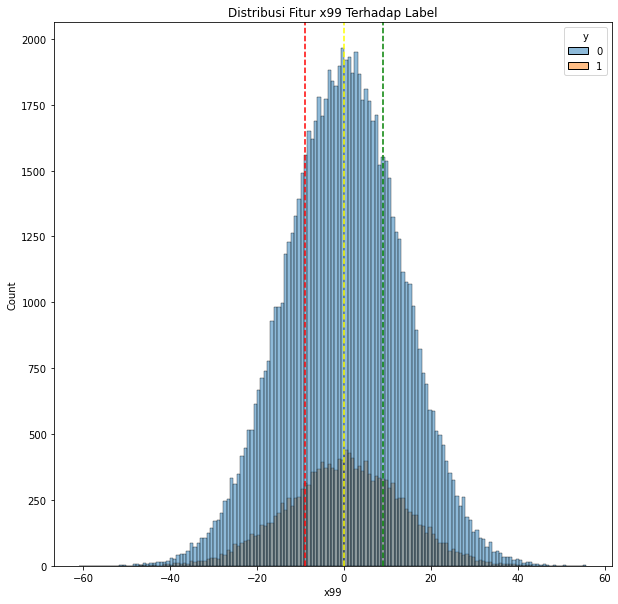

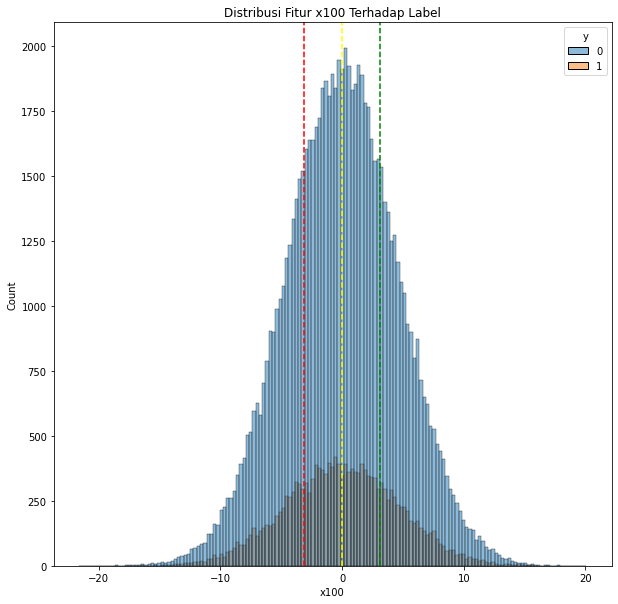

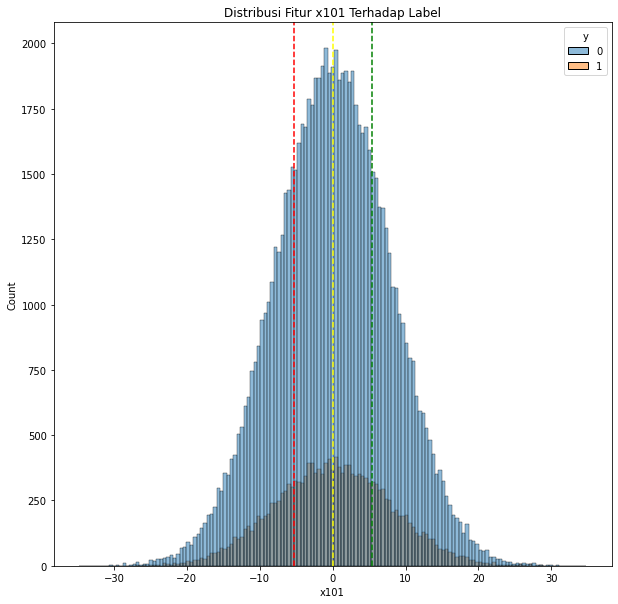

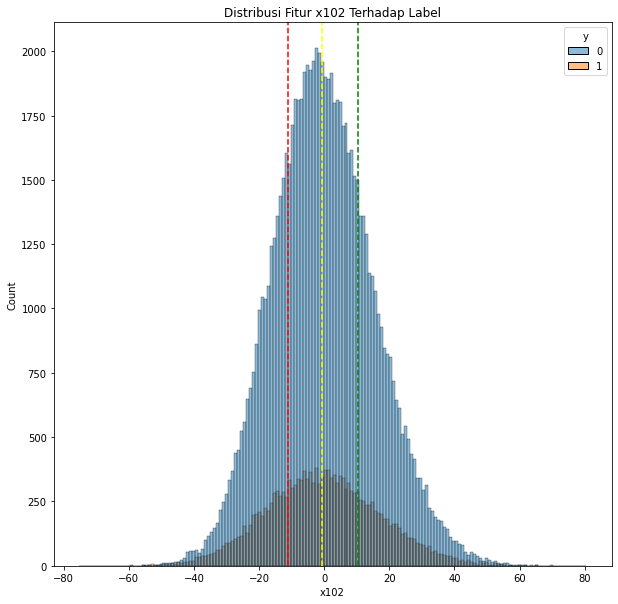

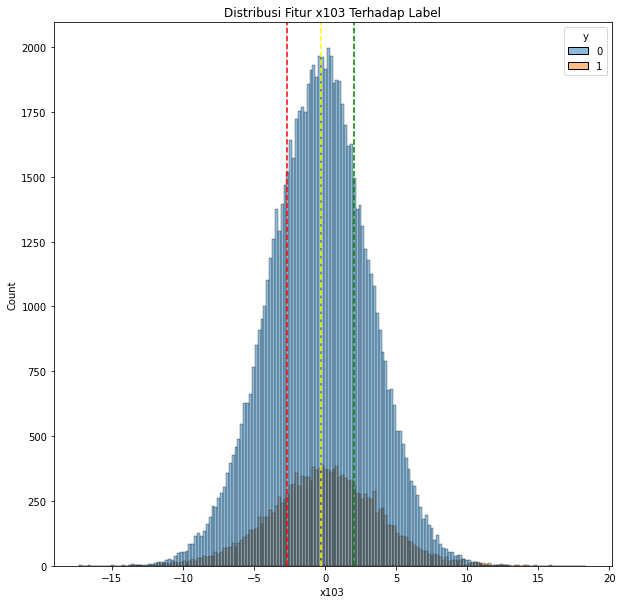

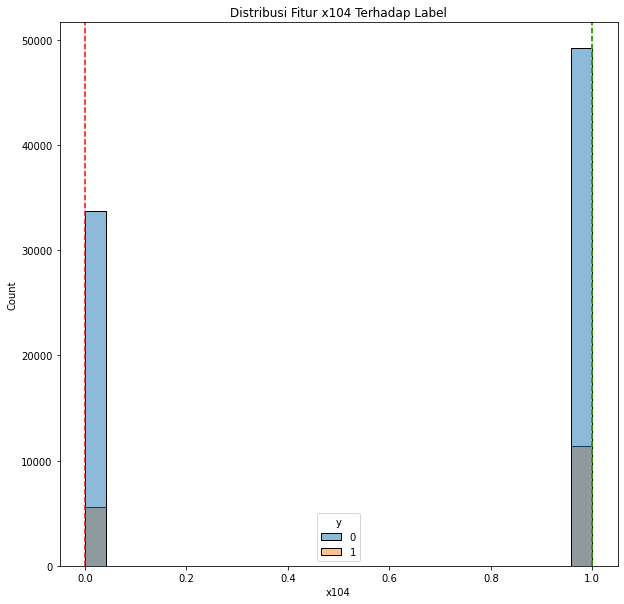

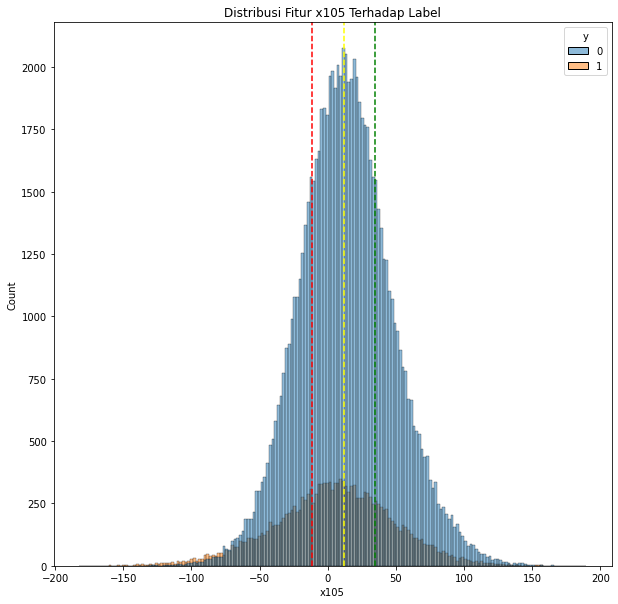

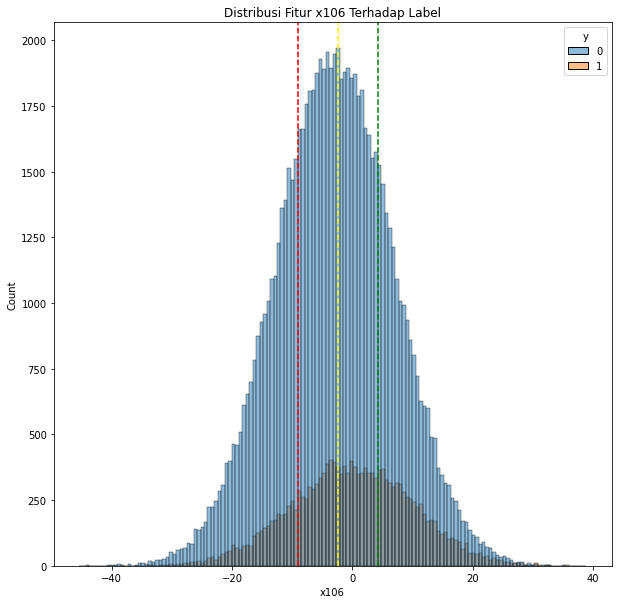

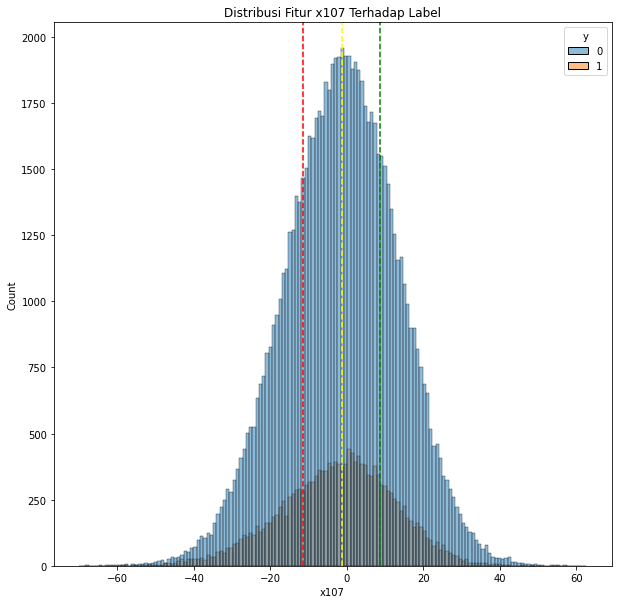

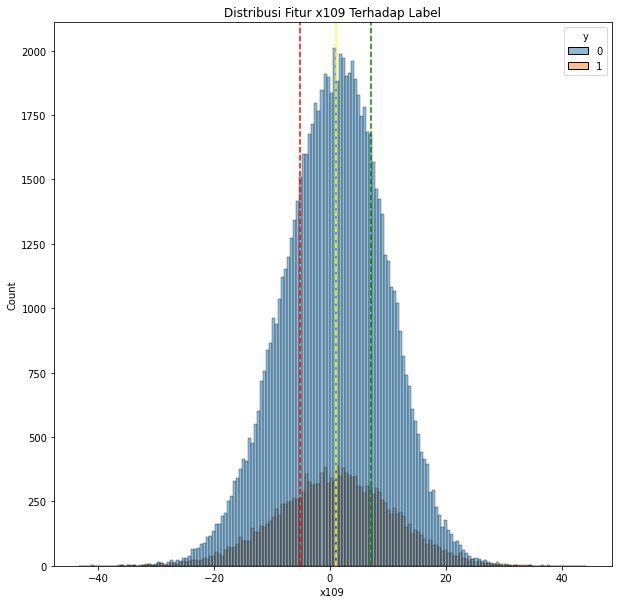

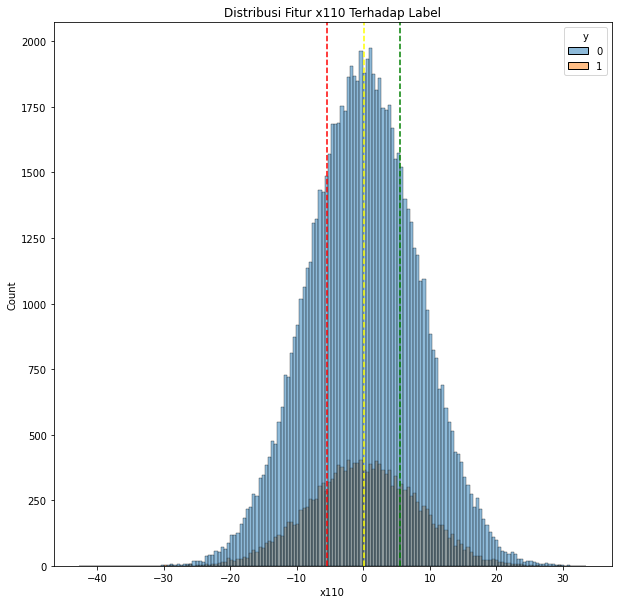

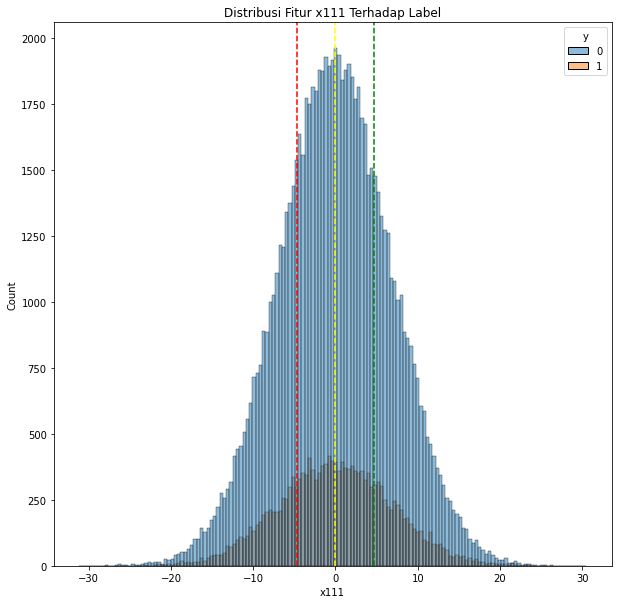

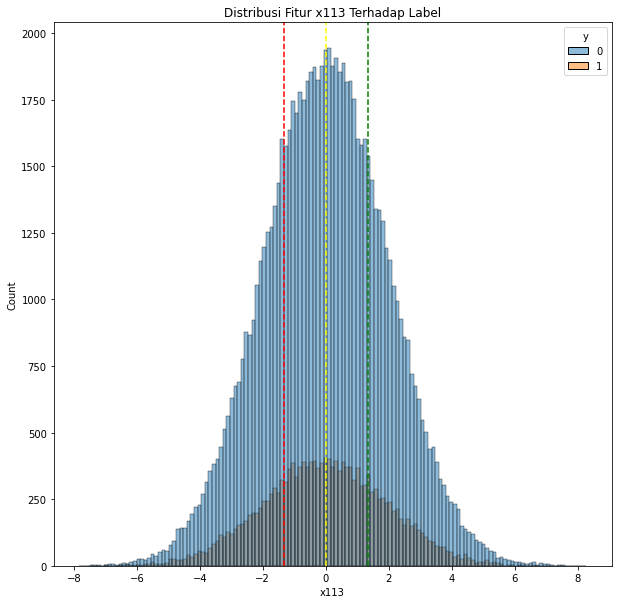

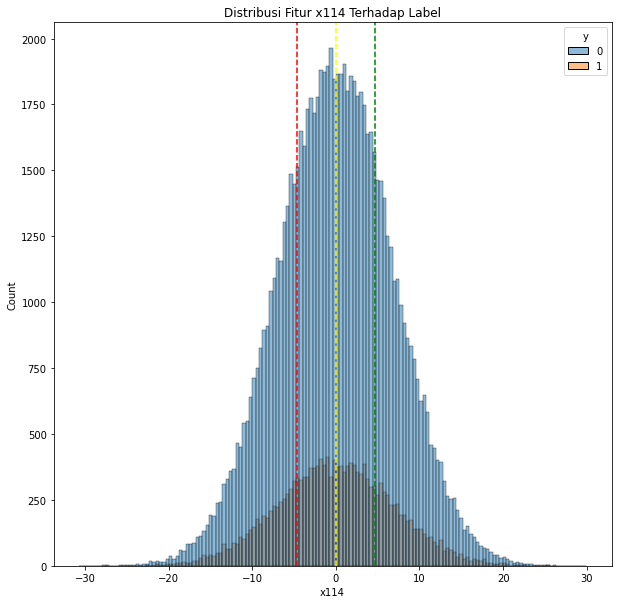

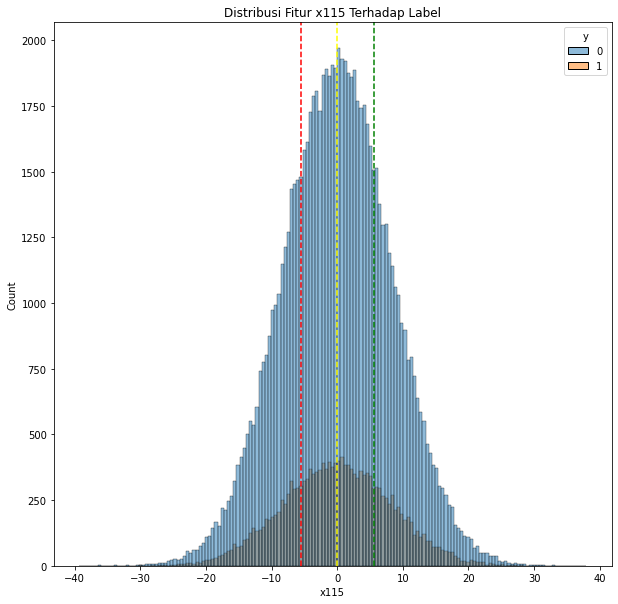

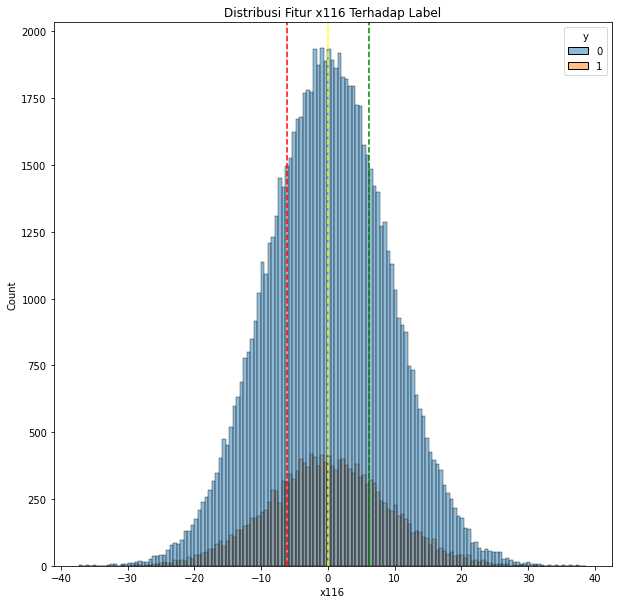

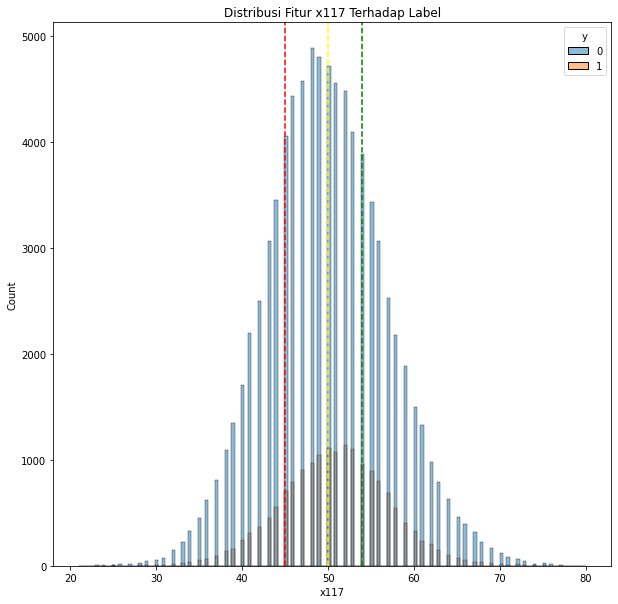

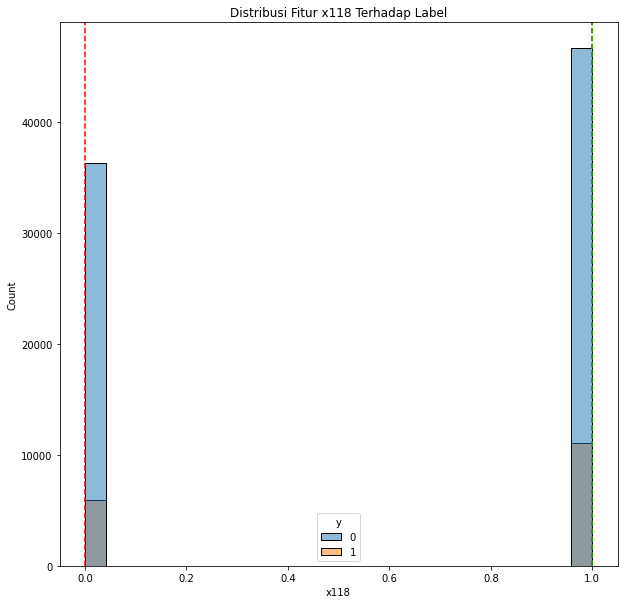

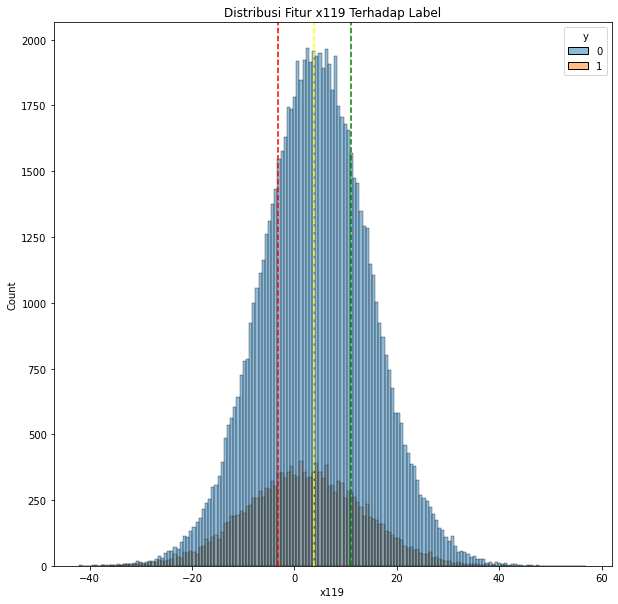

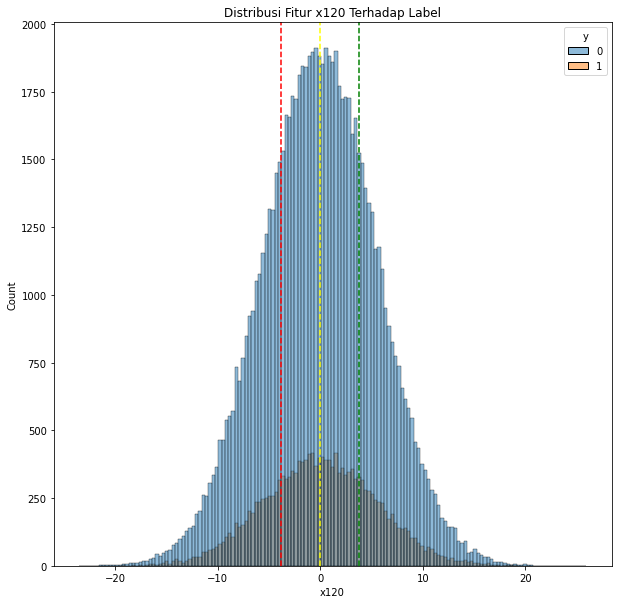

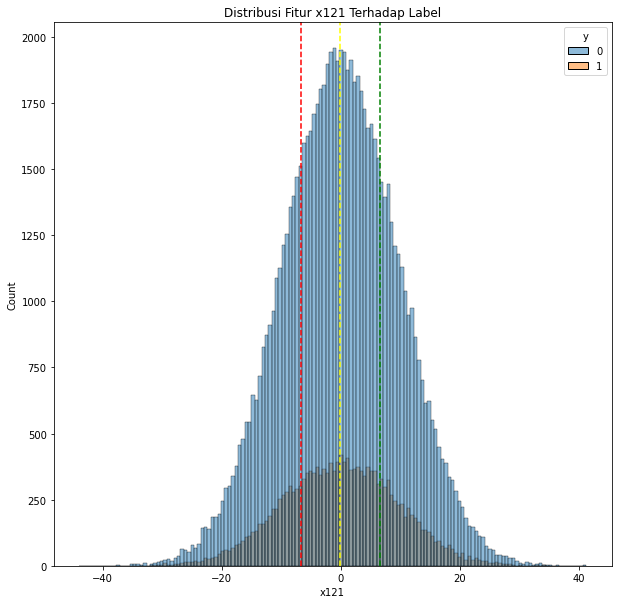

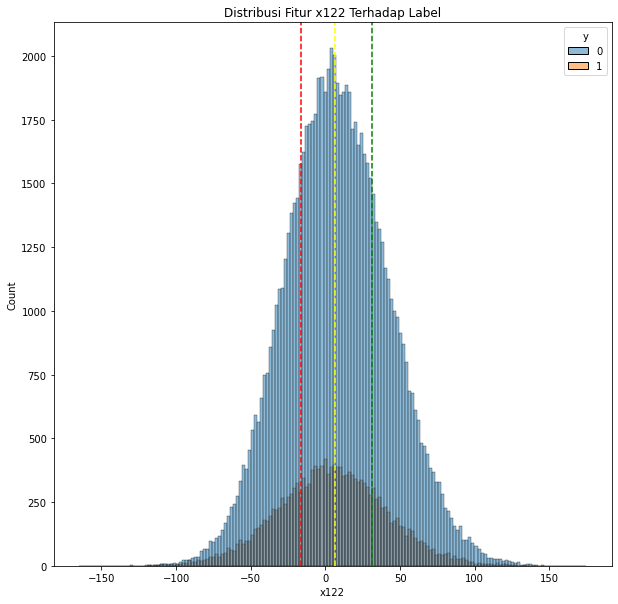

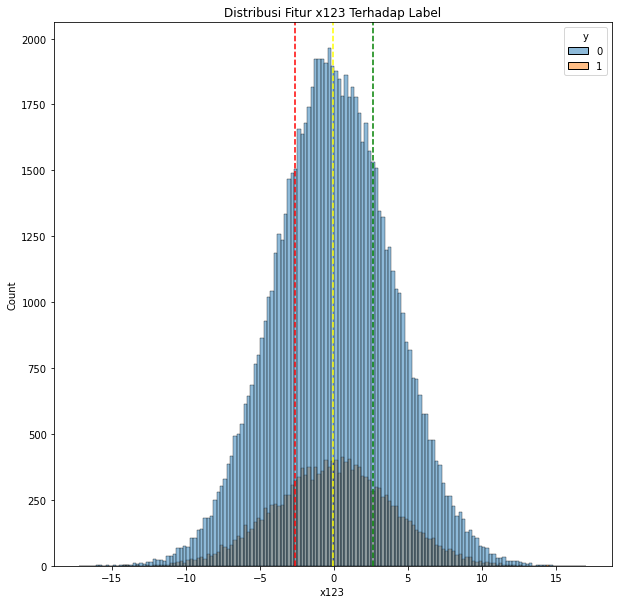

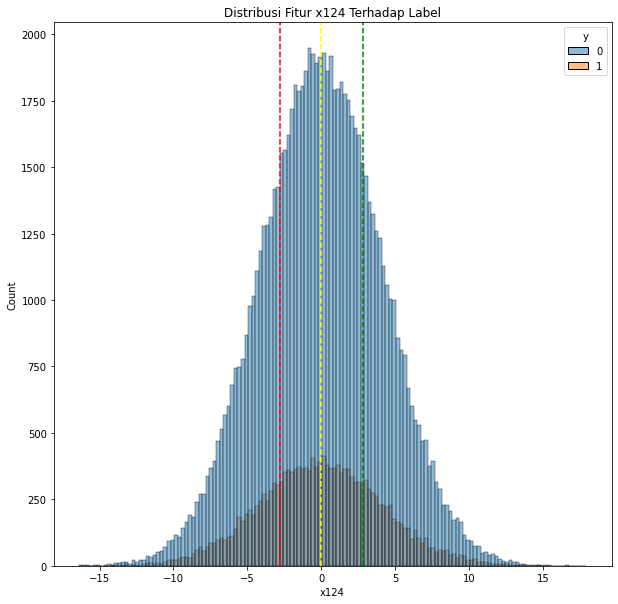

In [15]:
for col in numericFeature[:-1]:
    plt.figure(figsize=(10,10))
    sns.histplot(data=df_churn_train, x=col, hue='y')
    
    plt.axvline(x=df_churn_train[col].quantile(0.25), ls='--', c='red', label='25')
    plt.axvline(x=df_churn_train[col].quantile(0.5), ls='--', c='yellow', label='50')
    plt.axvline(x=df_churn_train[col].quantile(0.75), ls='--', c='green', label='75')
    
    plt.title(f'Distribusi Fitur {col} Terhadap Label')
    plt.show()

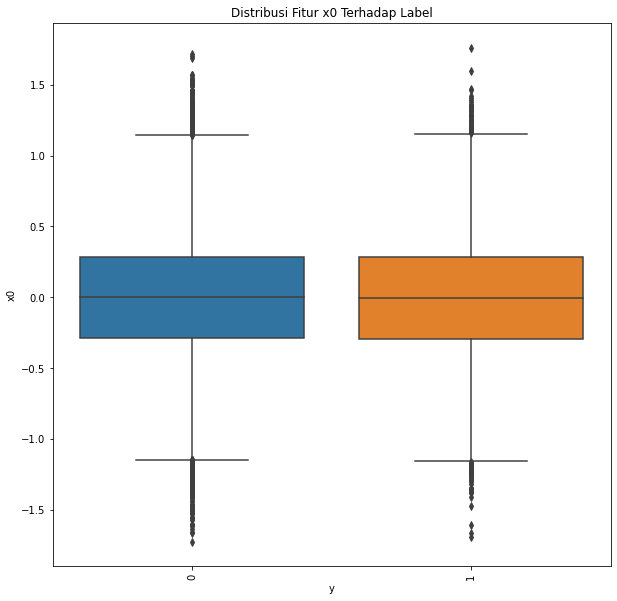

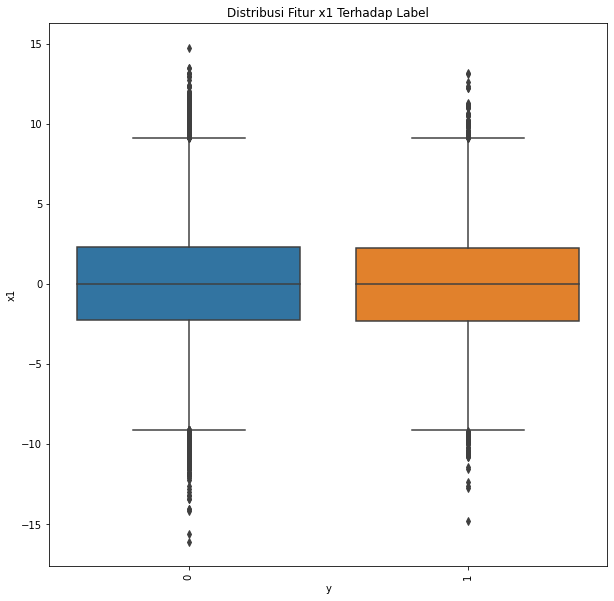

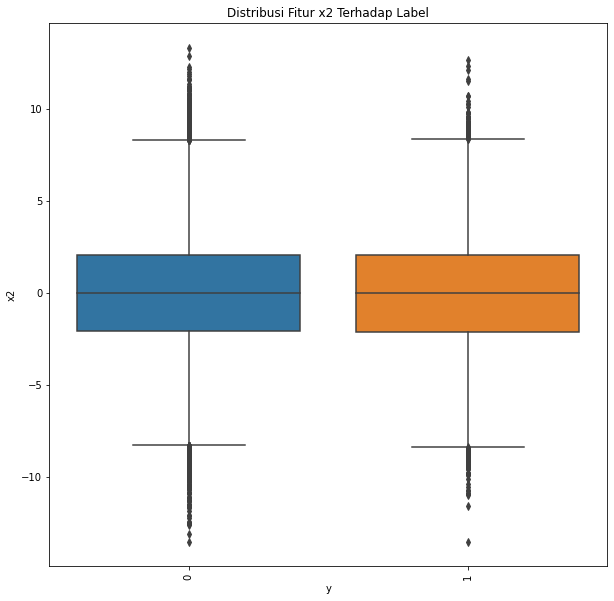

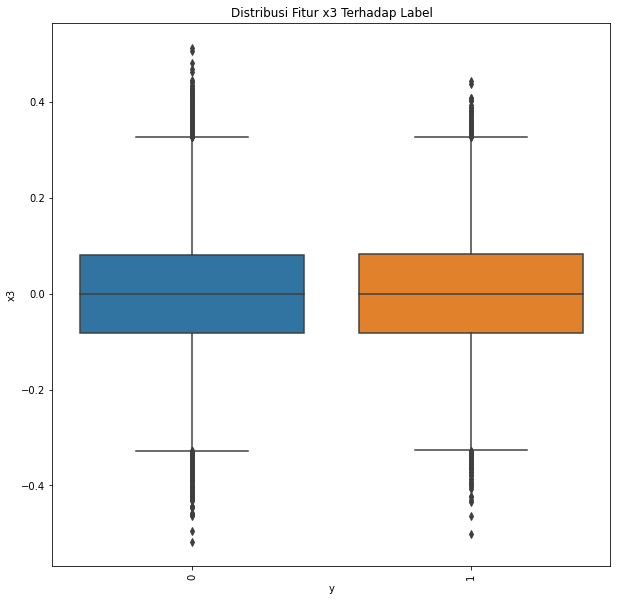

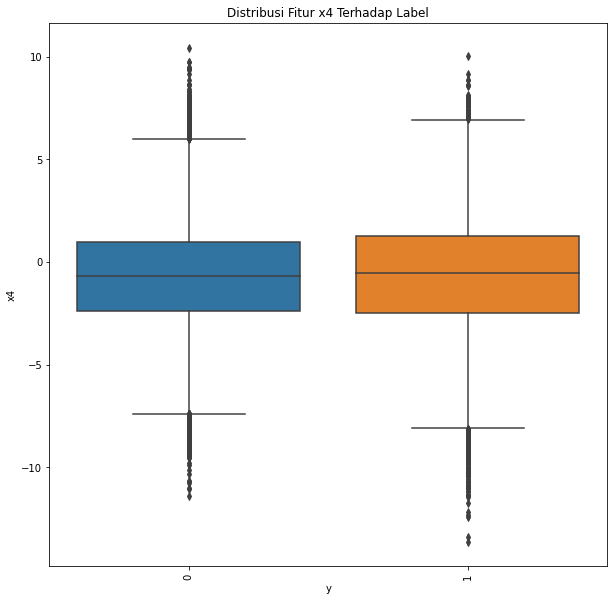

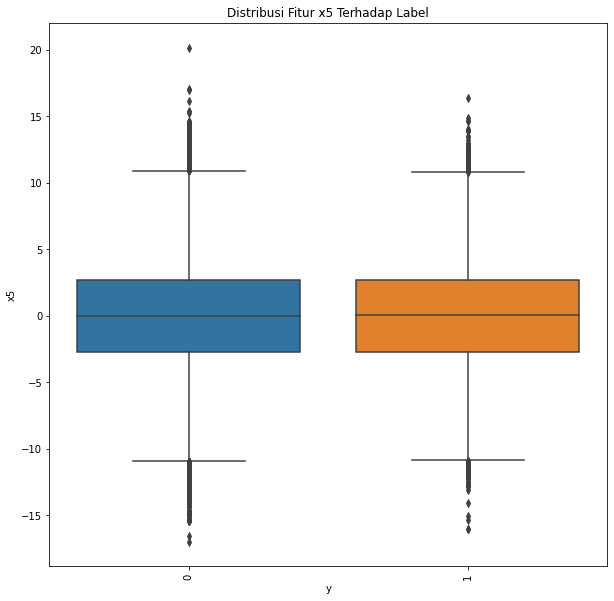

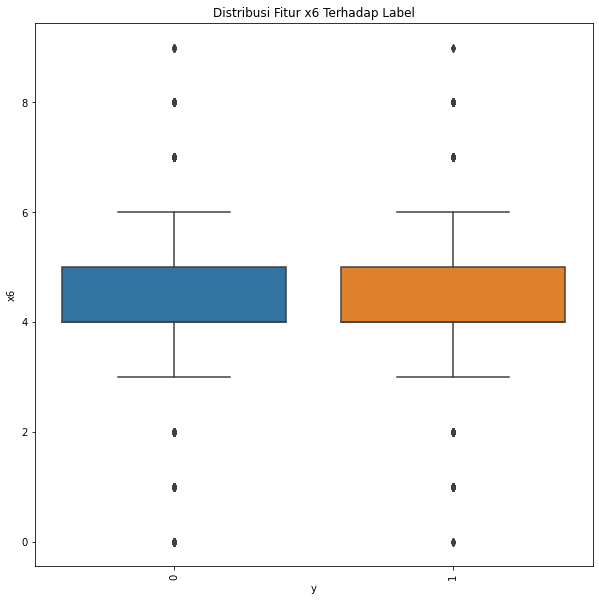

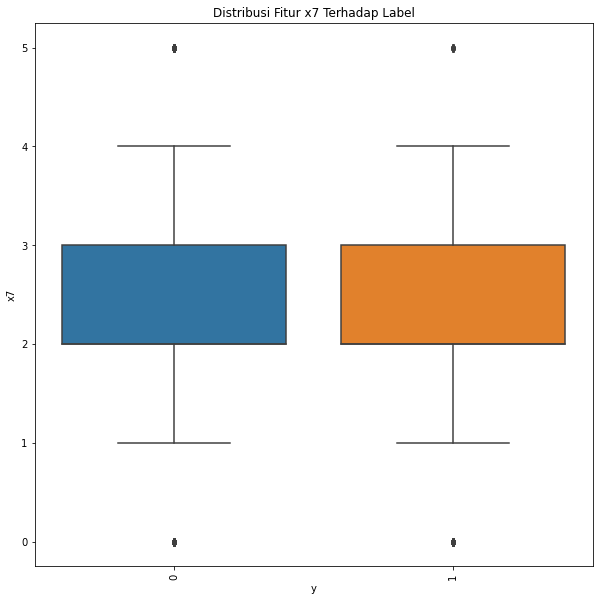

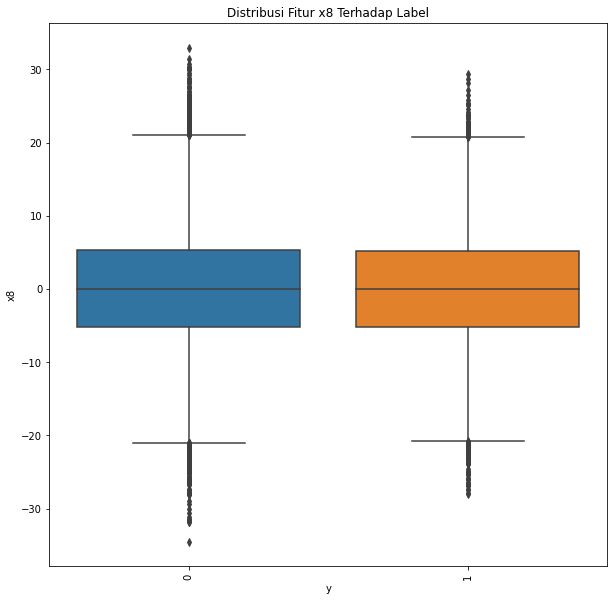

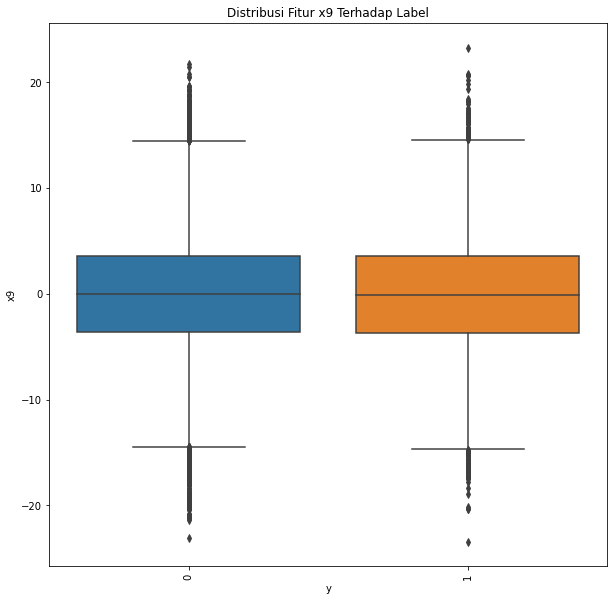

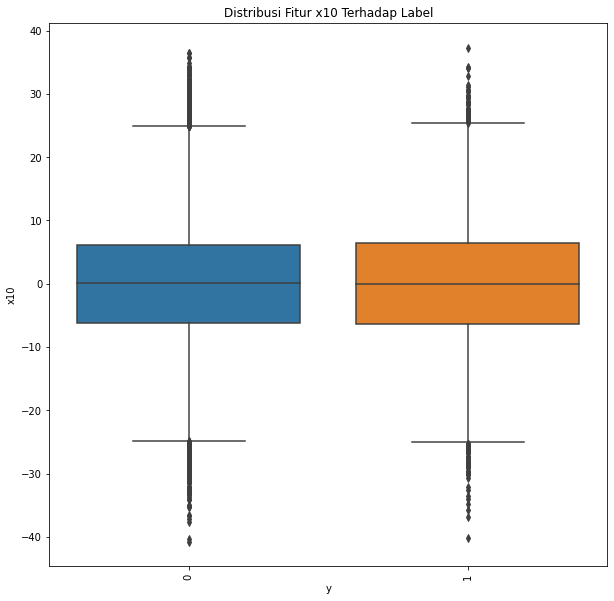

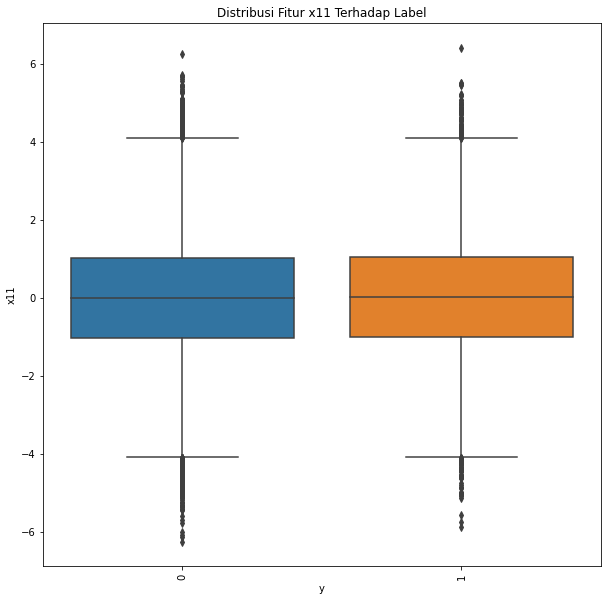

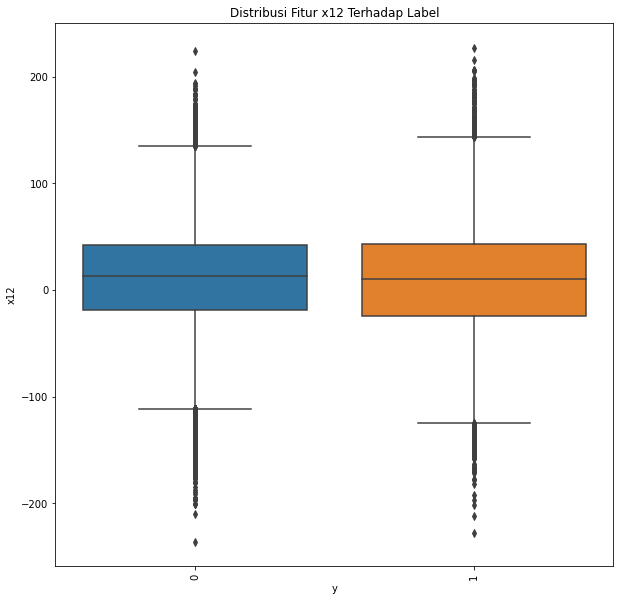

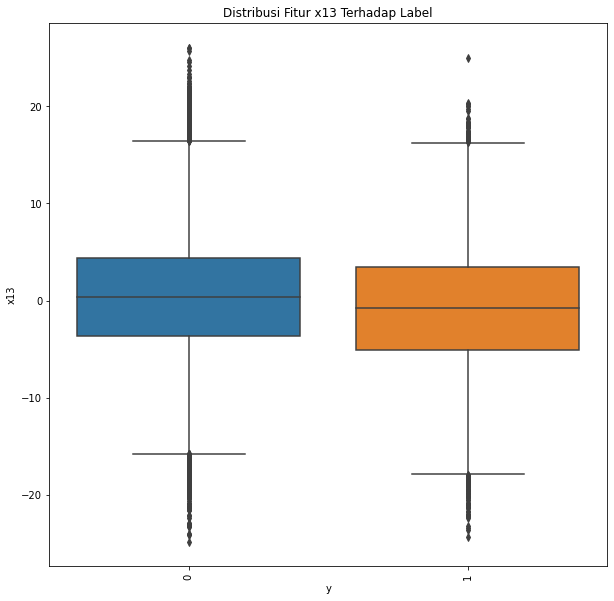

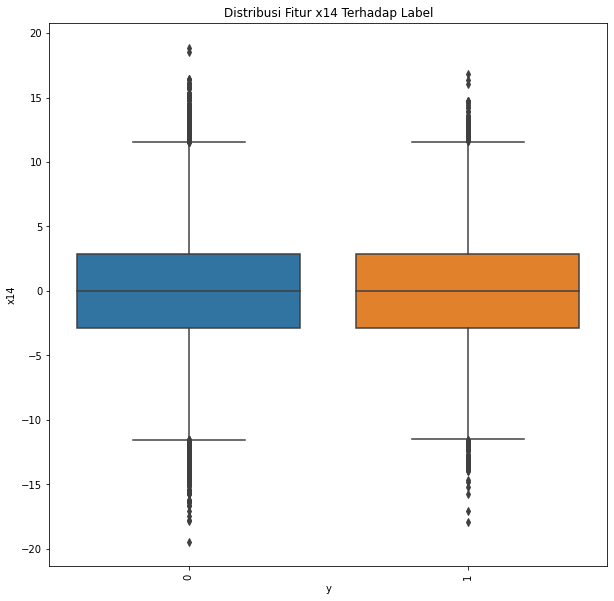

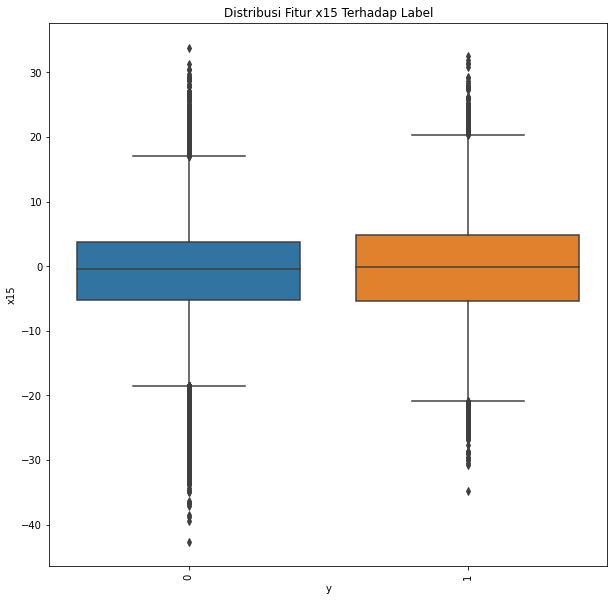

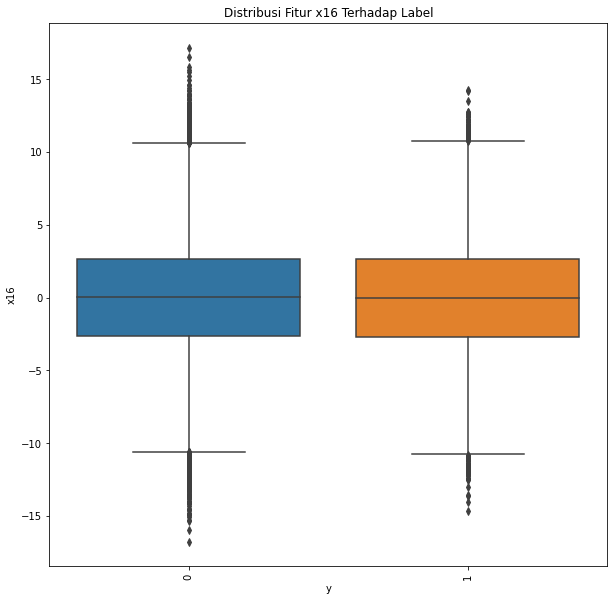

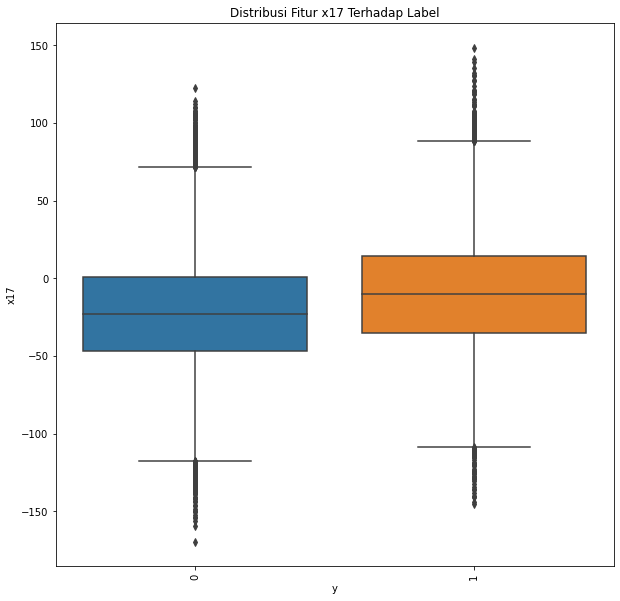

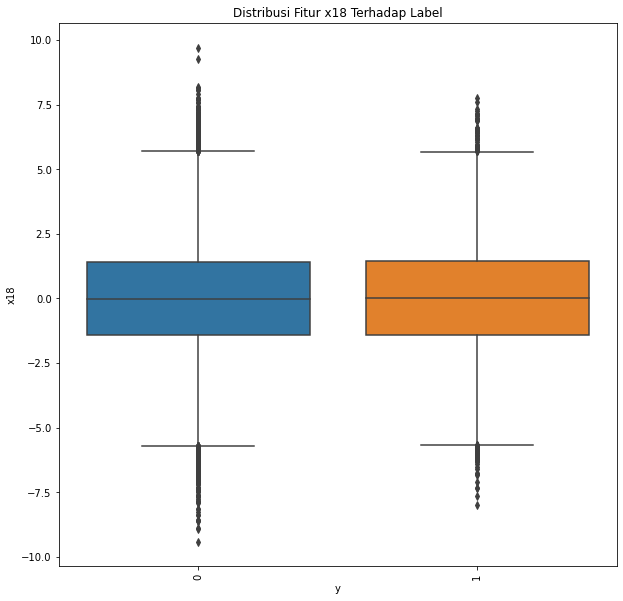

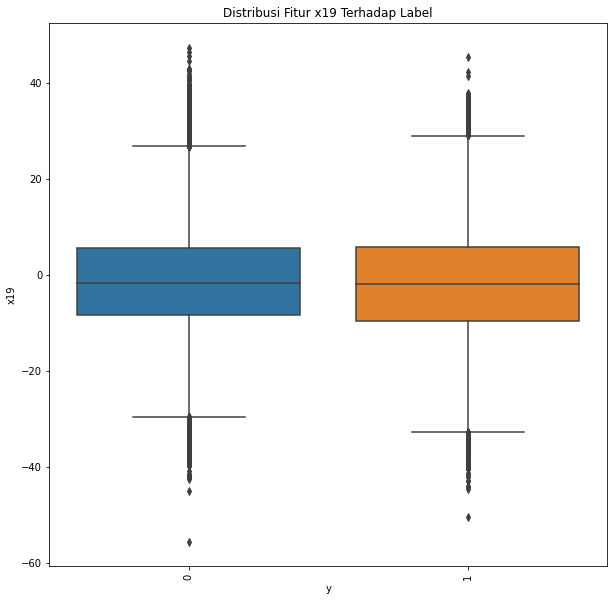

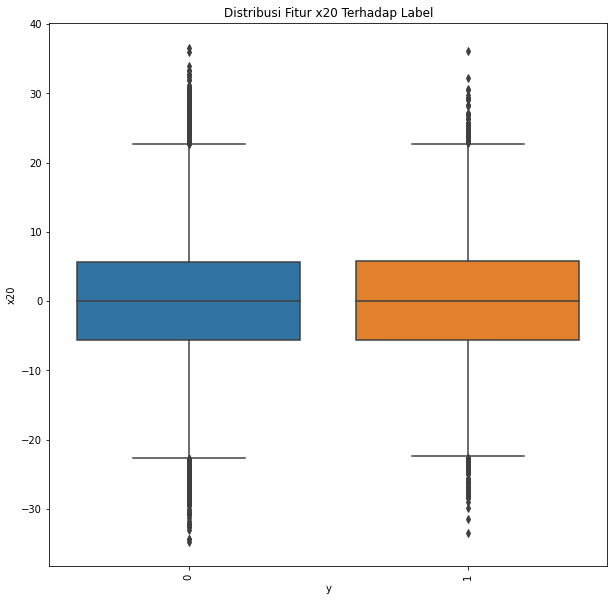

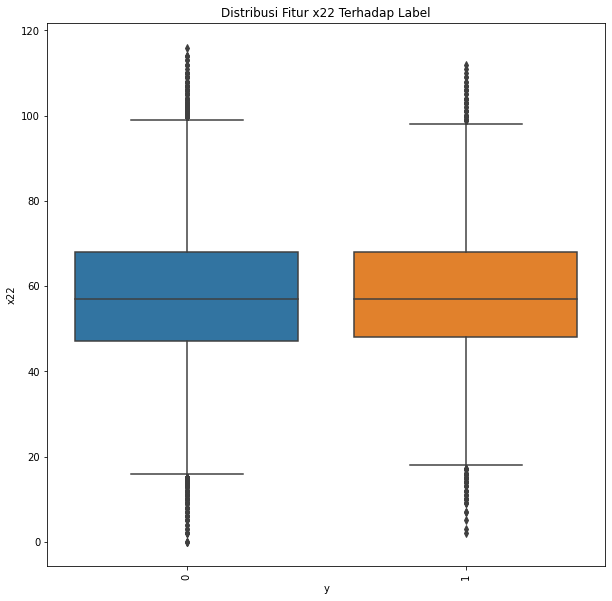

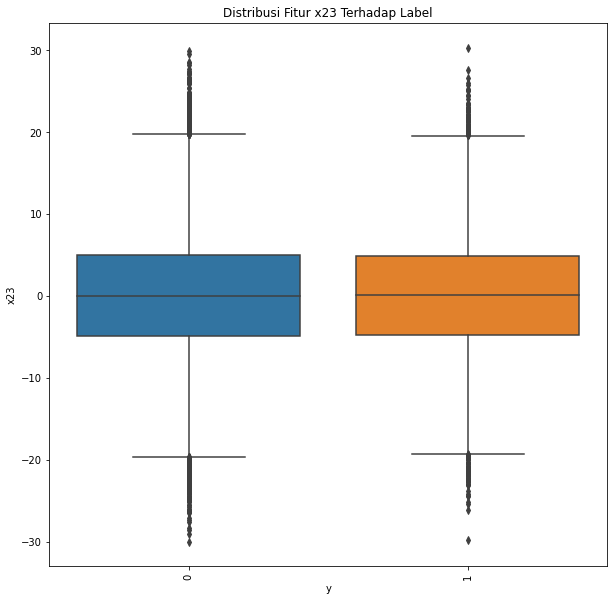

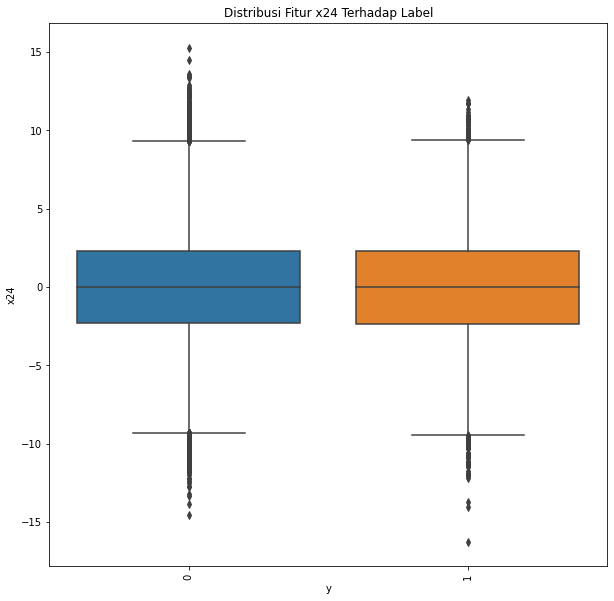

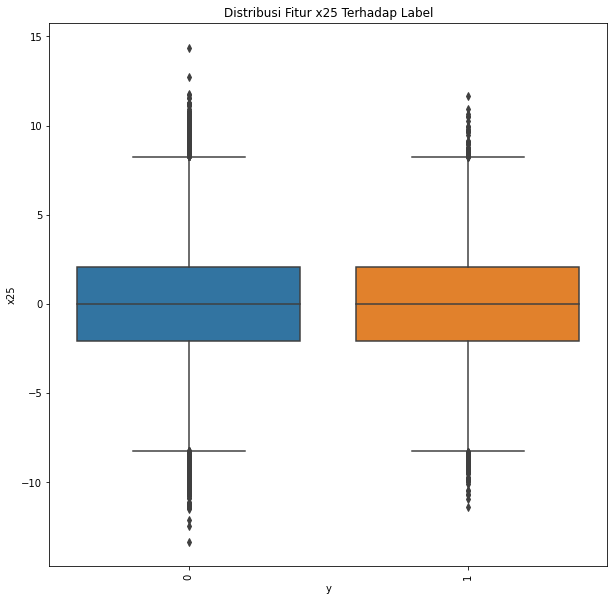

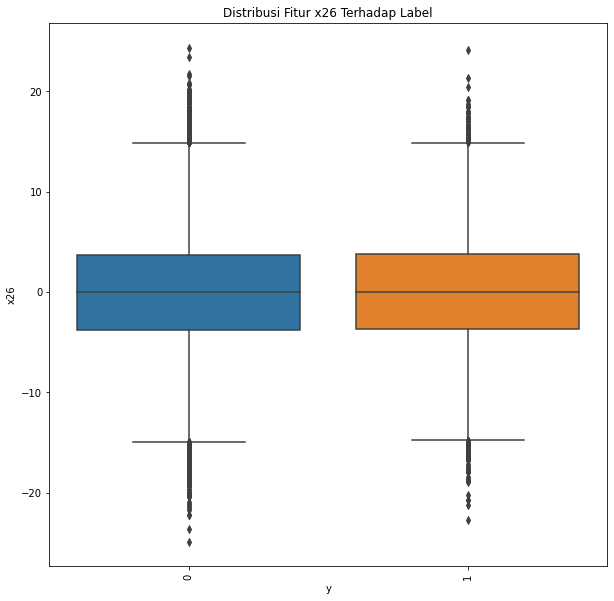

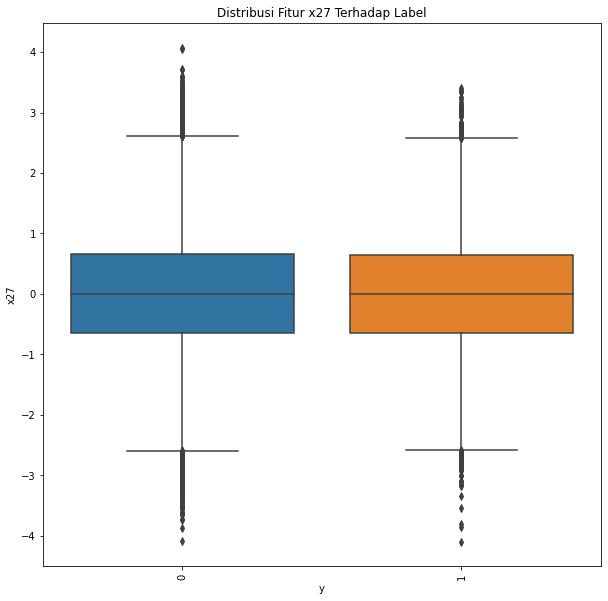

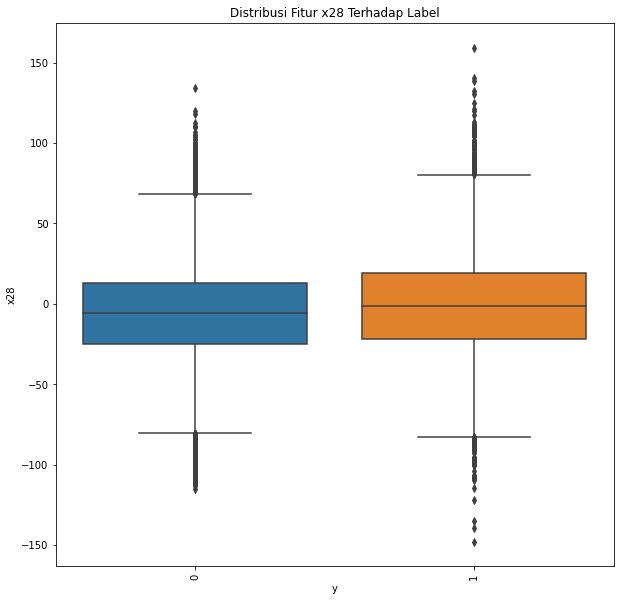

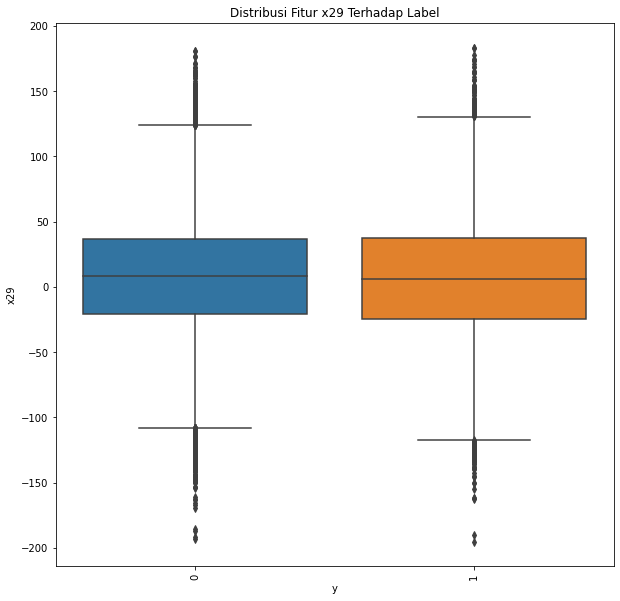

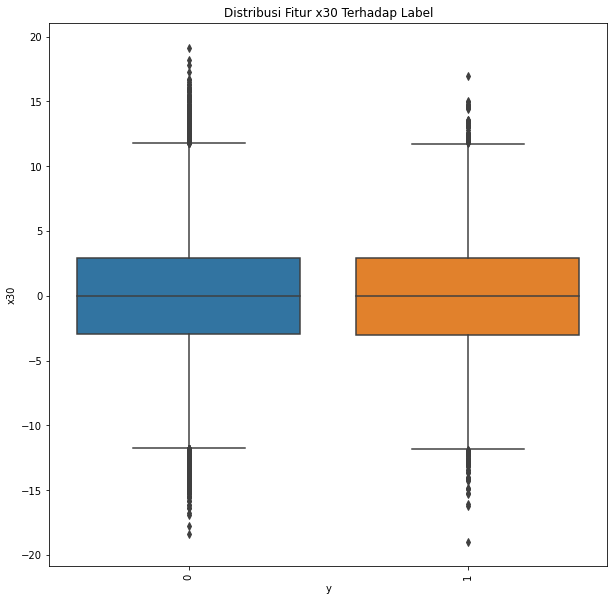

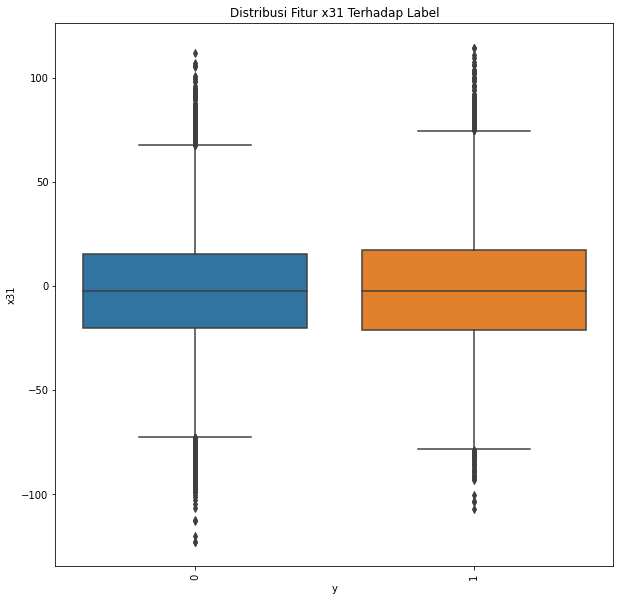

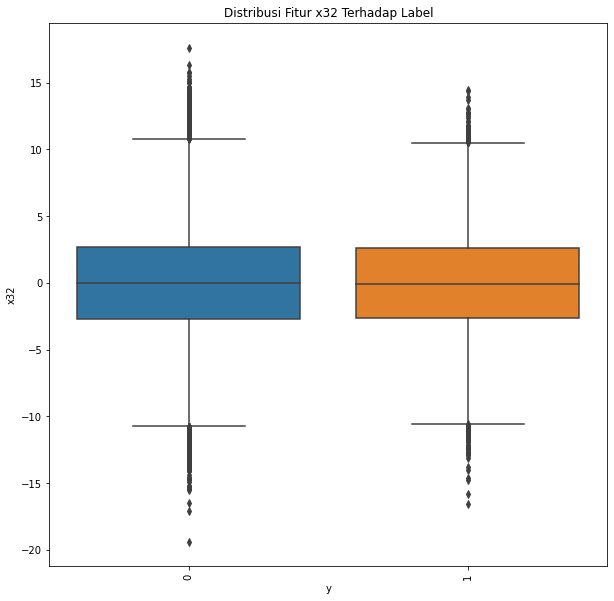

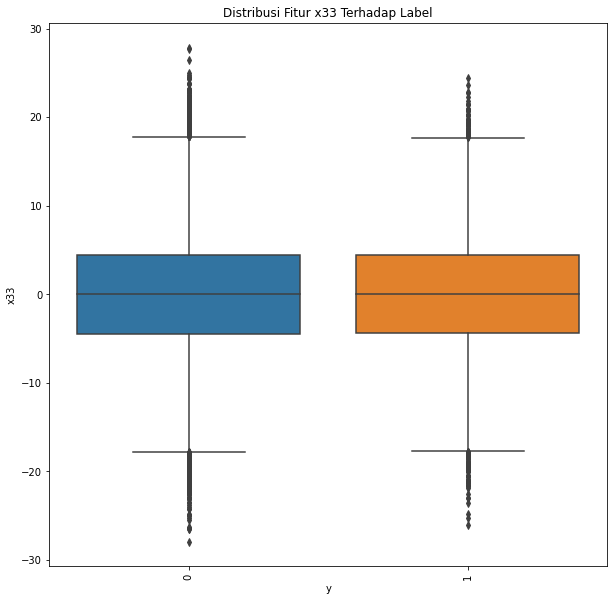

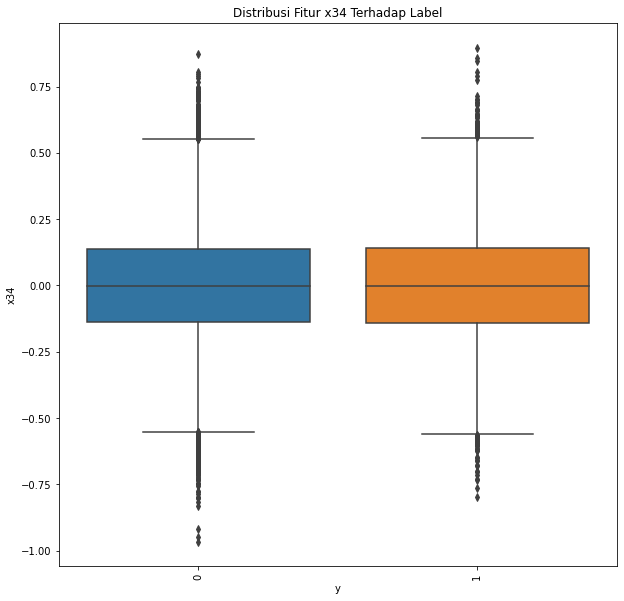

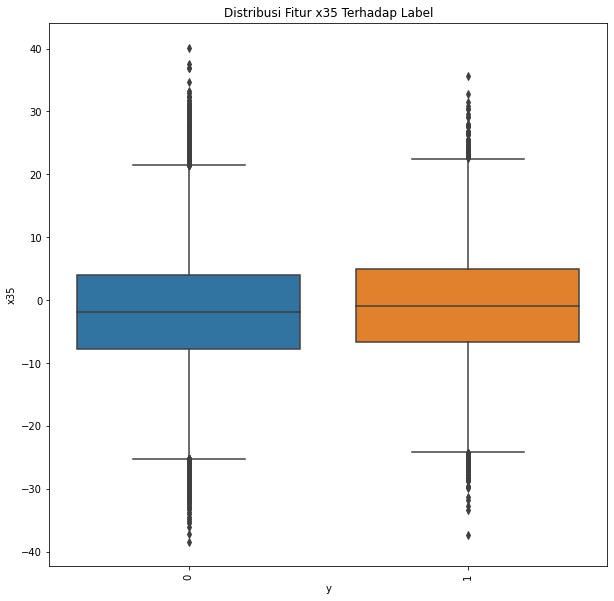

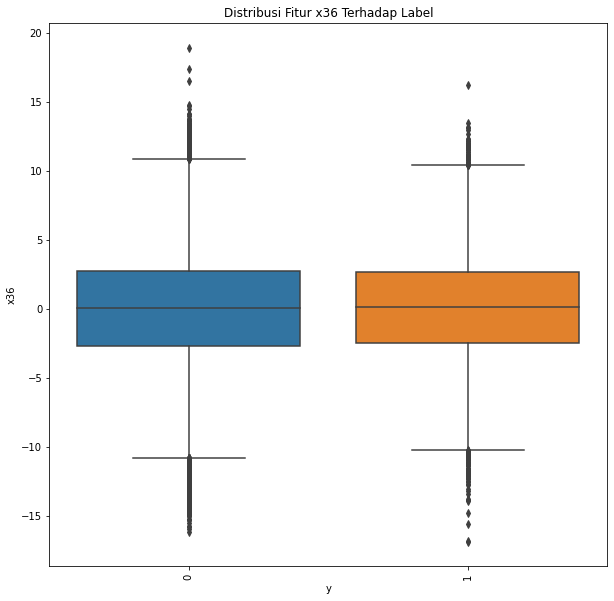

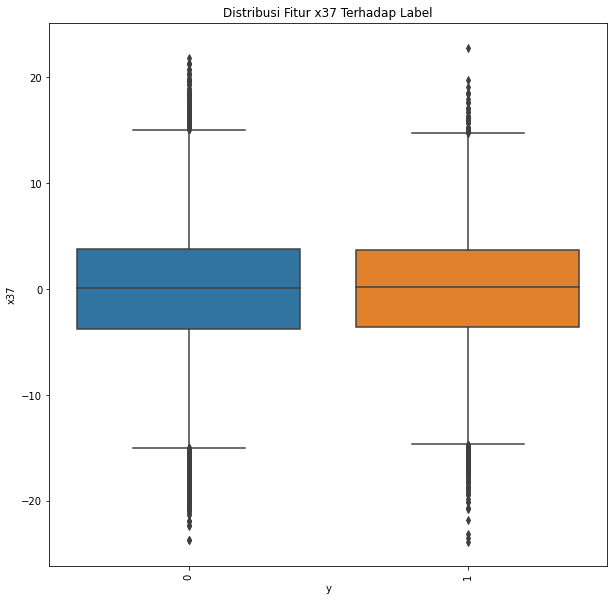

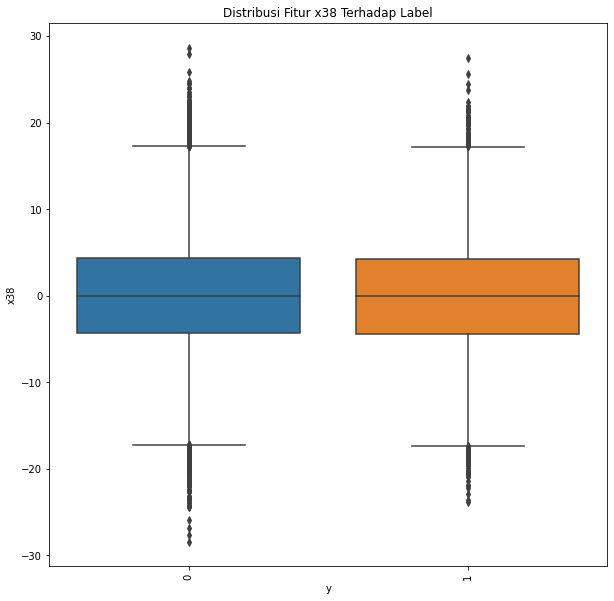

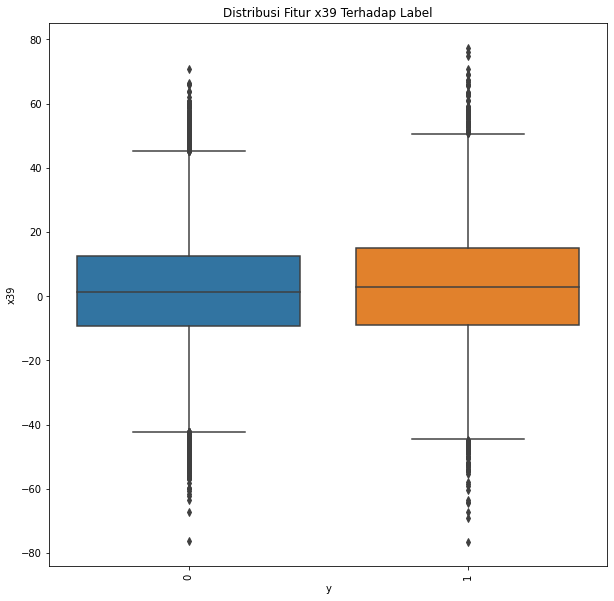

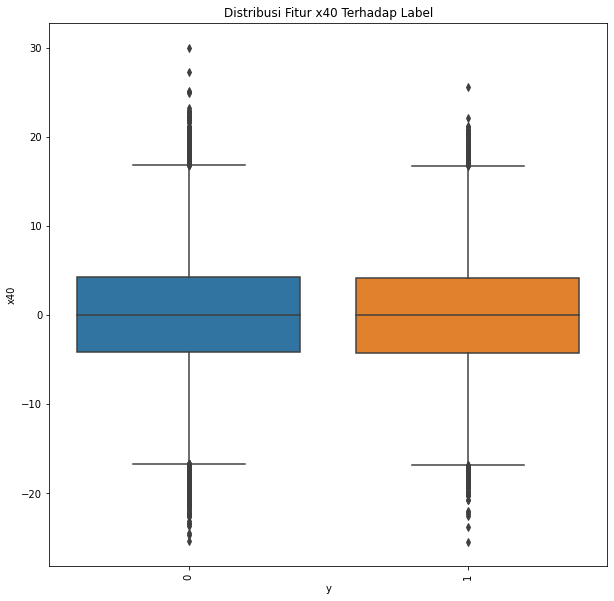

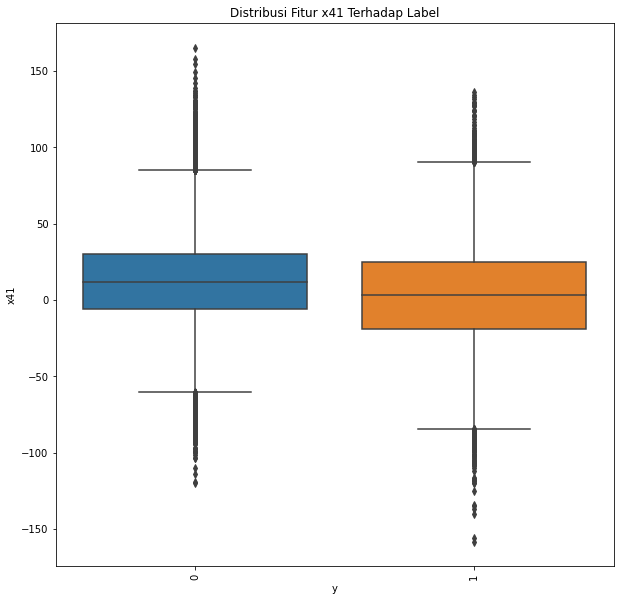

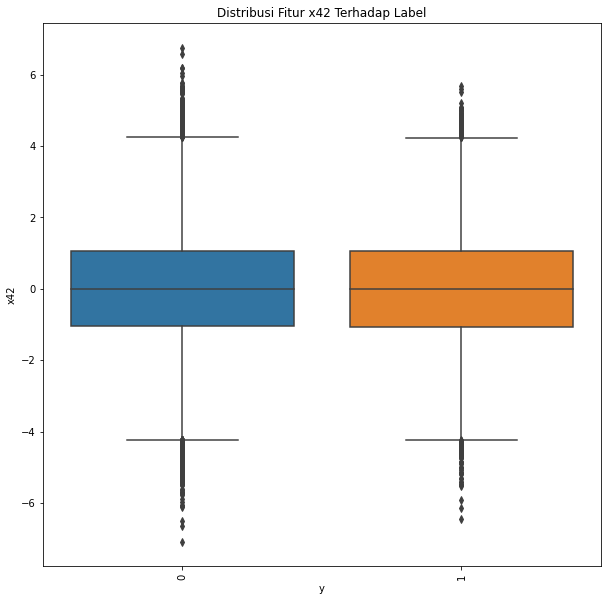

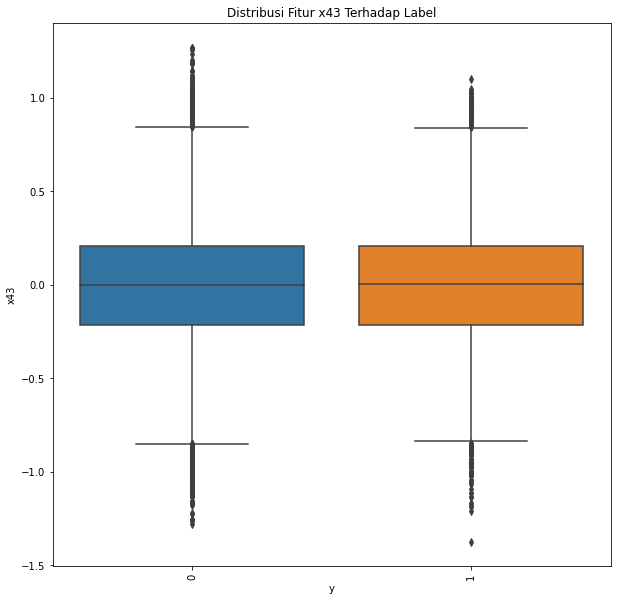

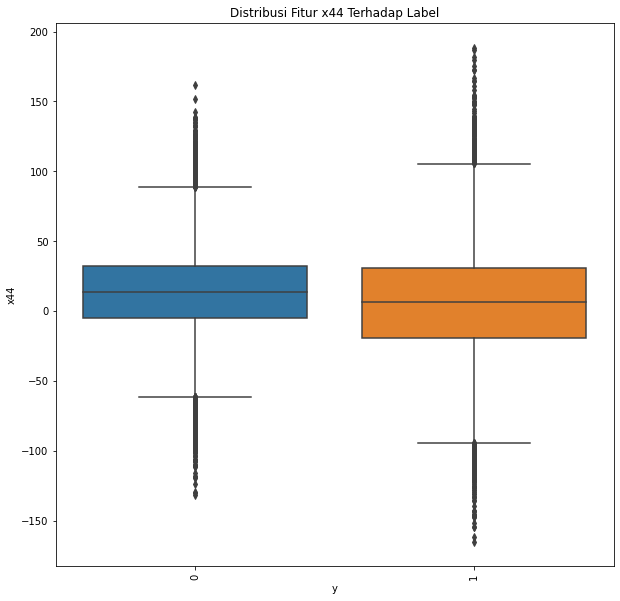

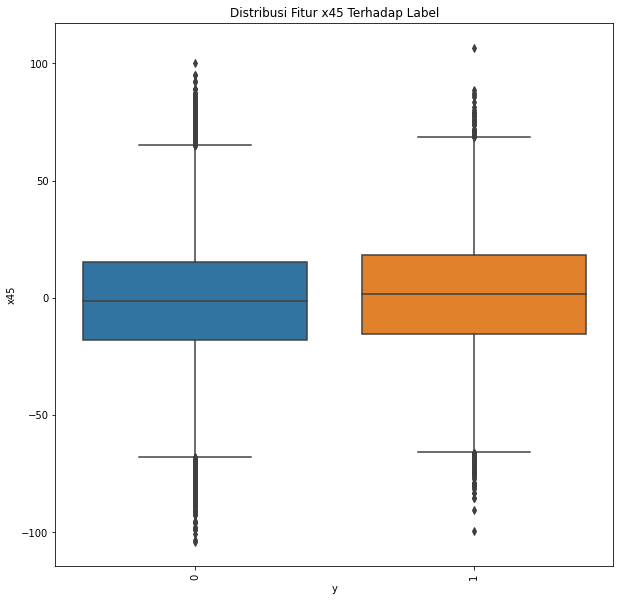

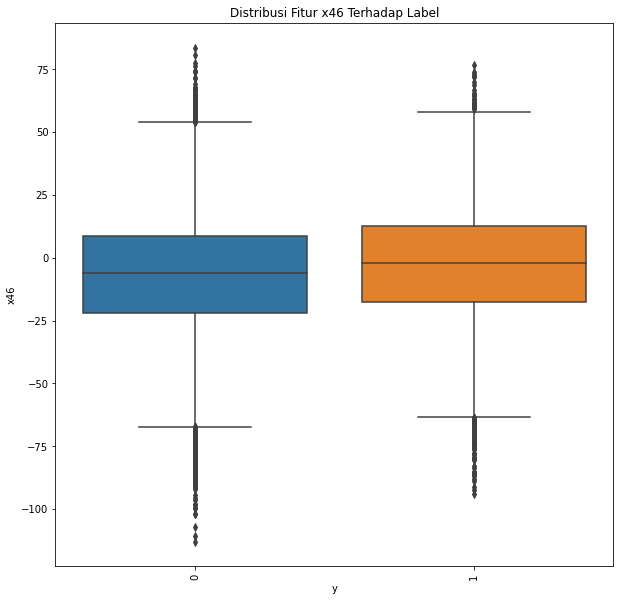

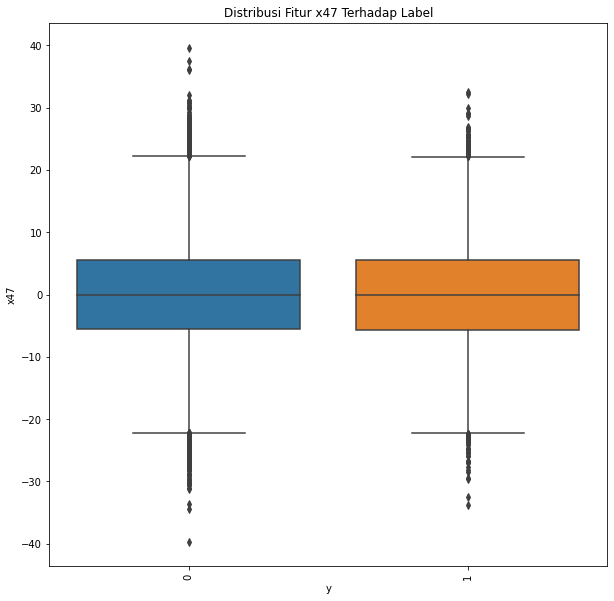

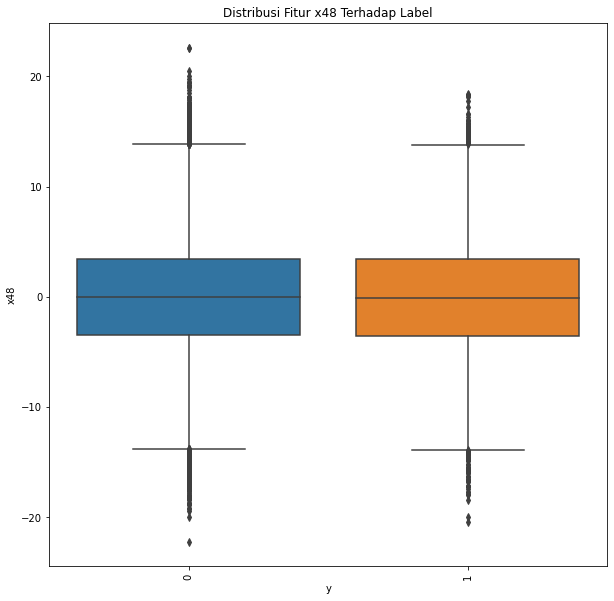

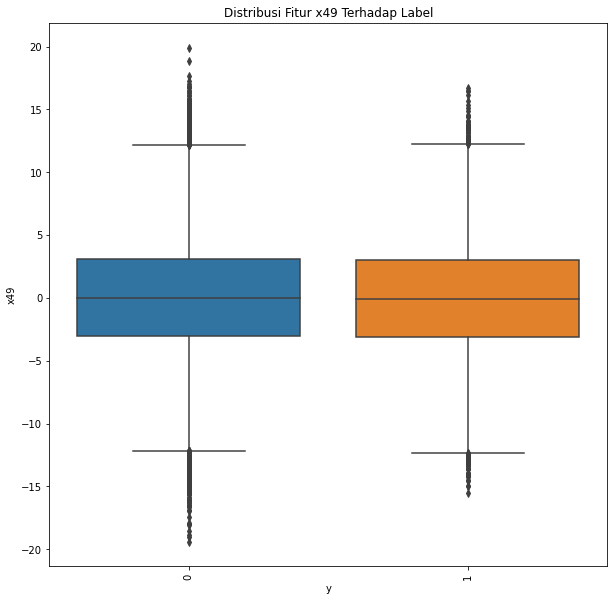

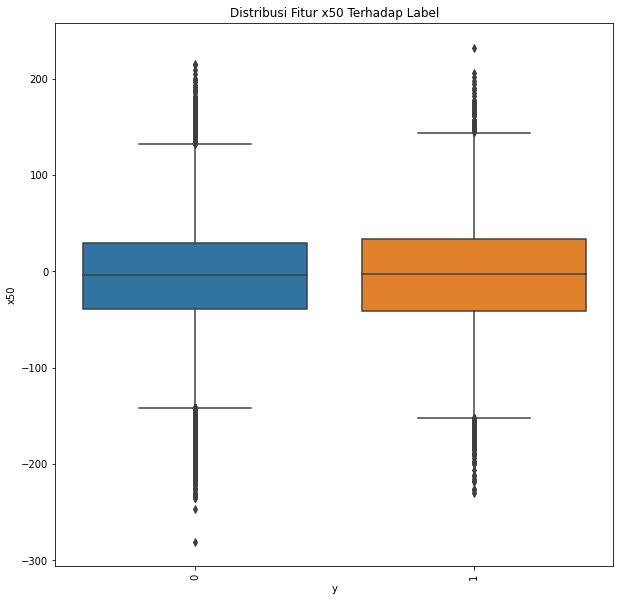

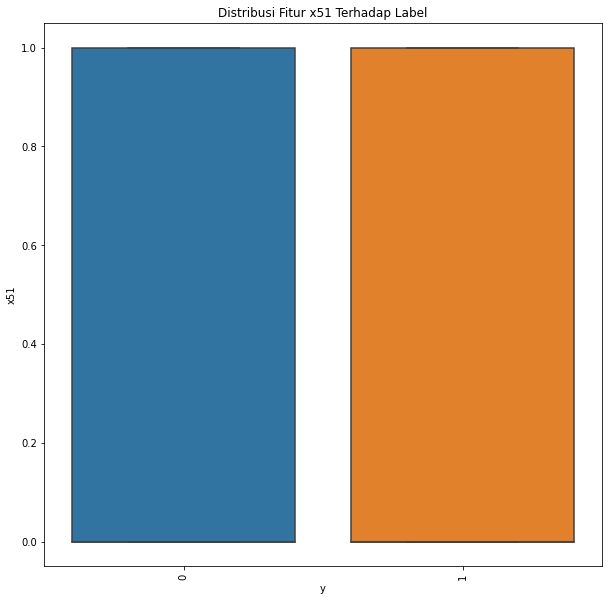

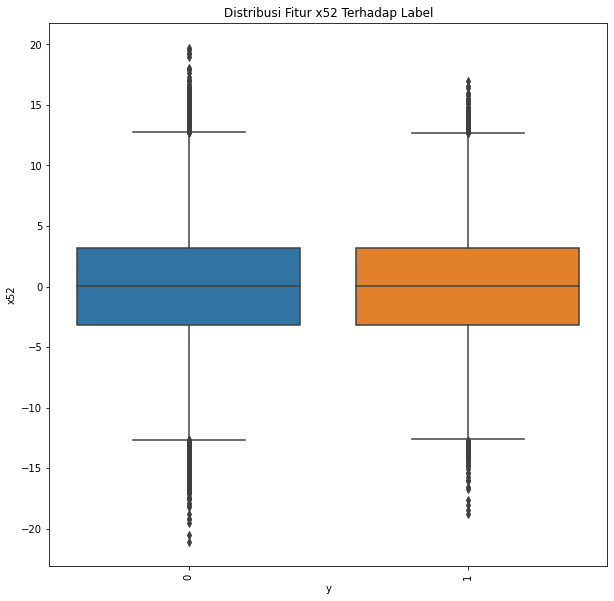

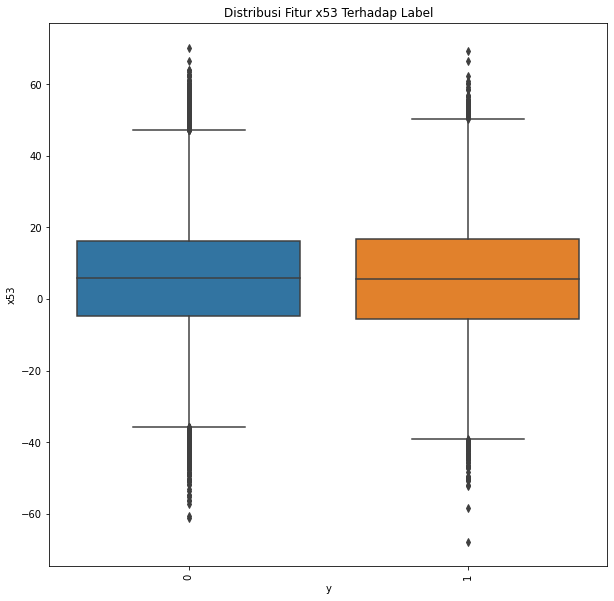

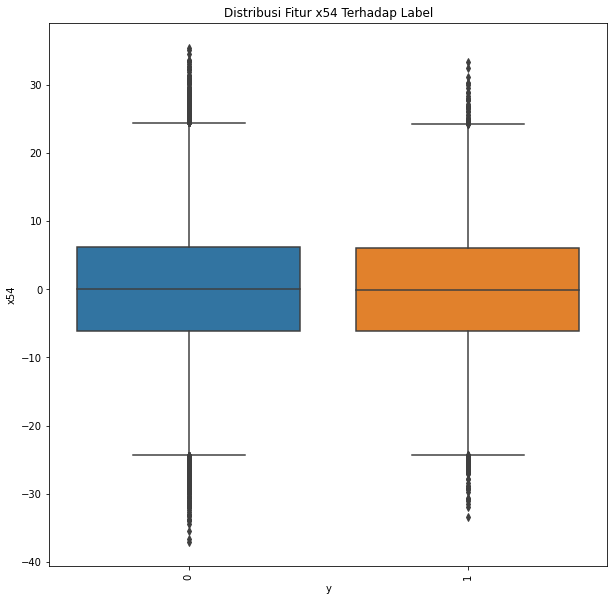

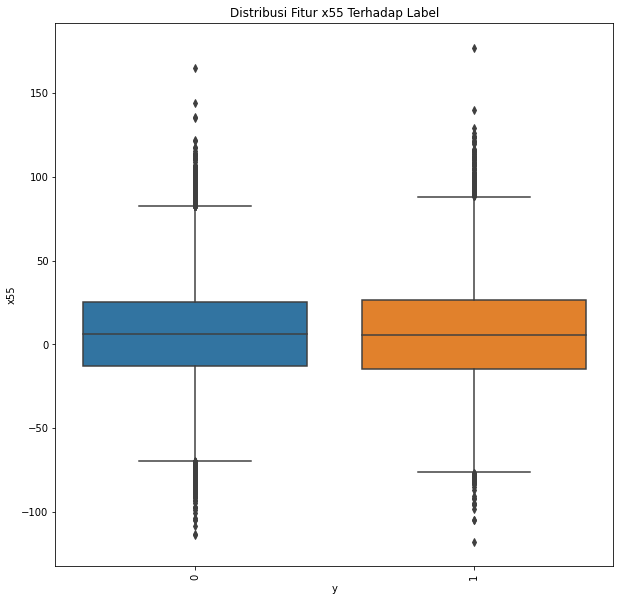

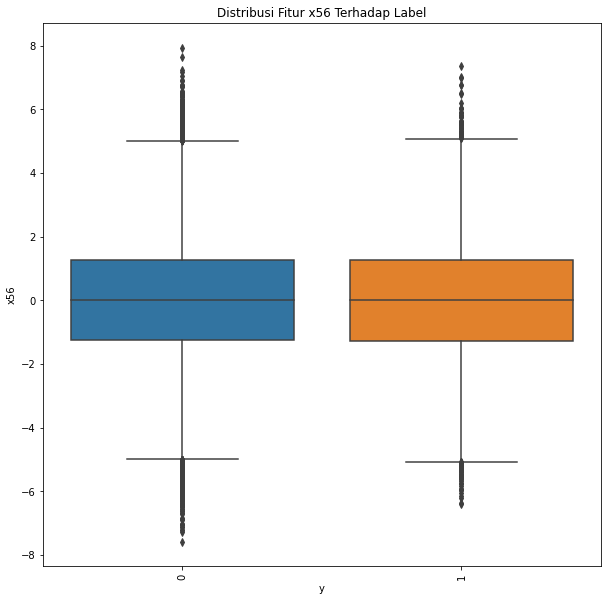

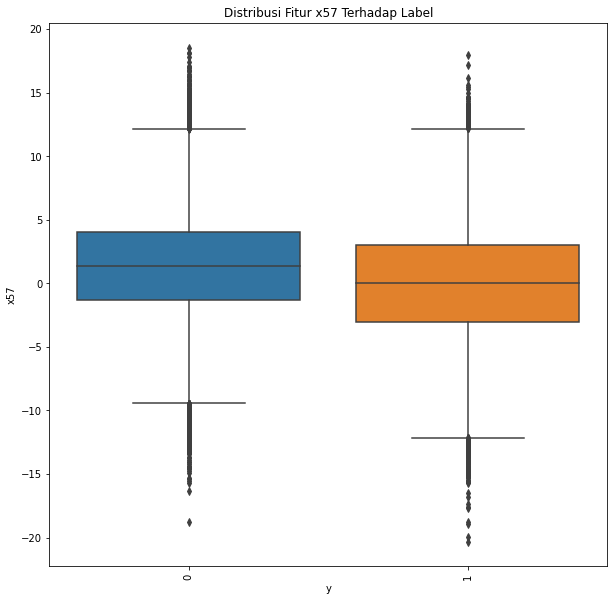

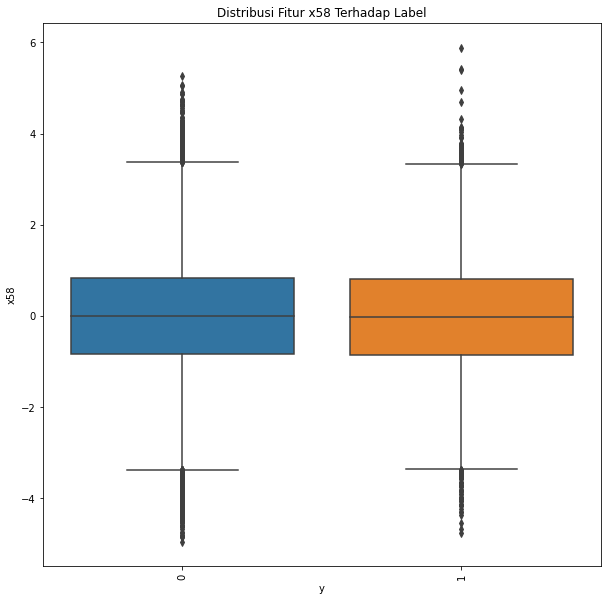

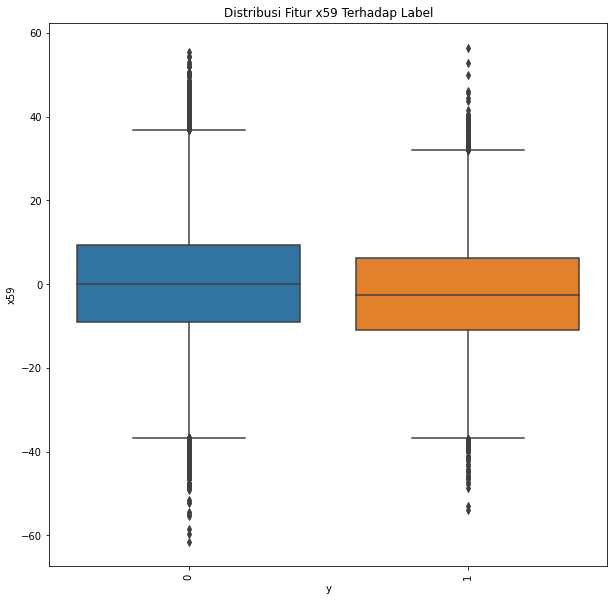

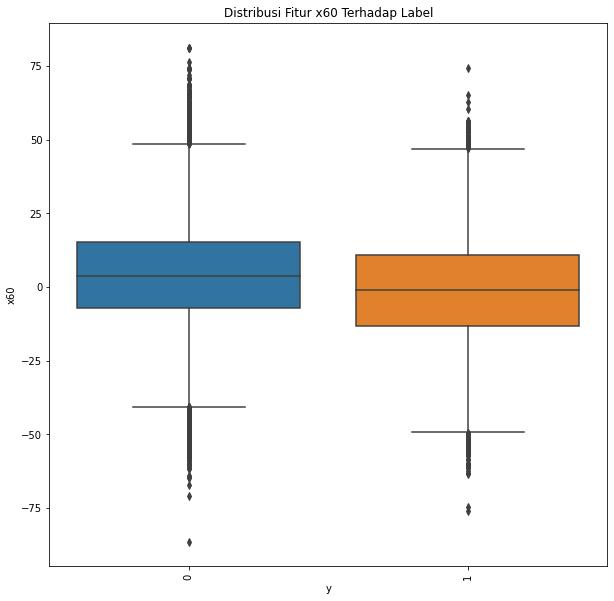

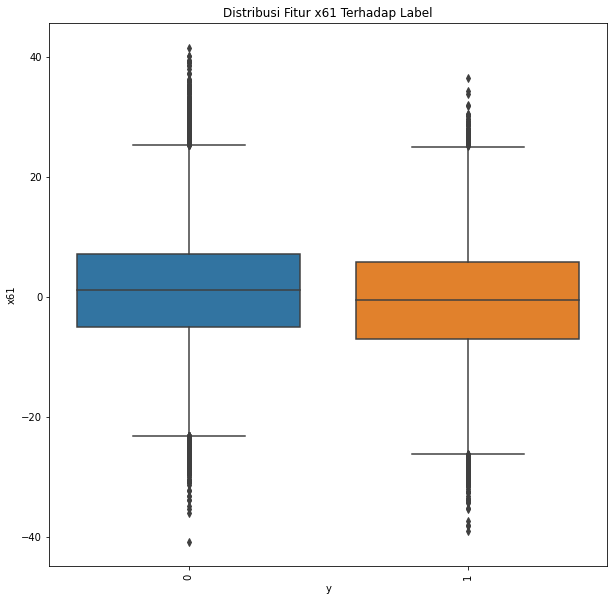

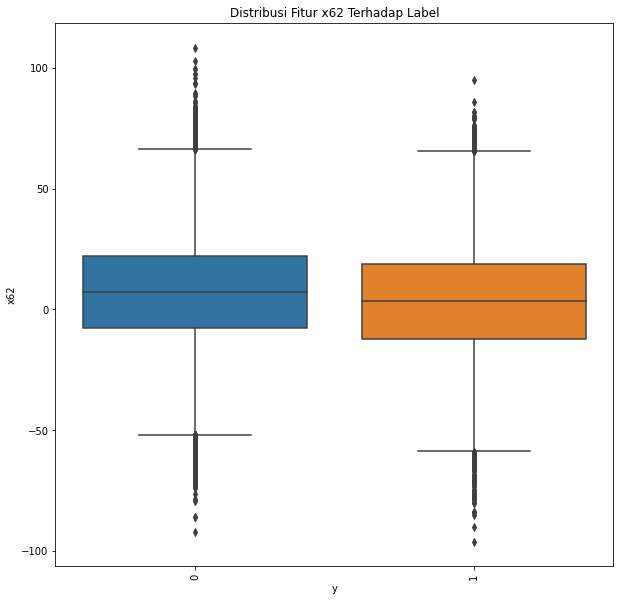

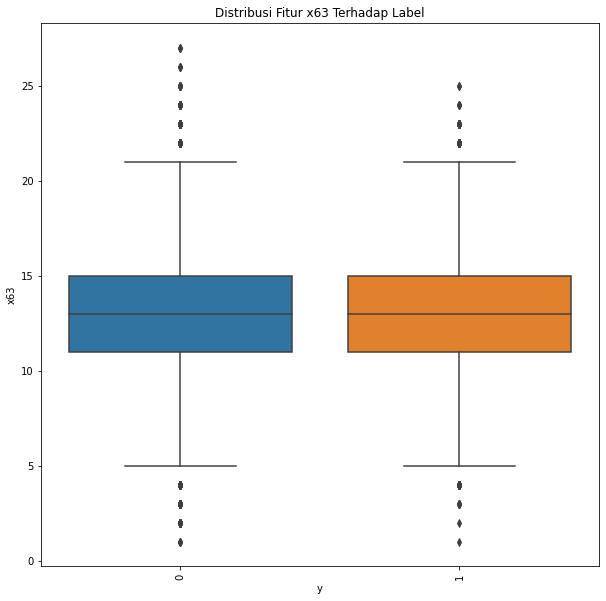

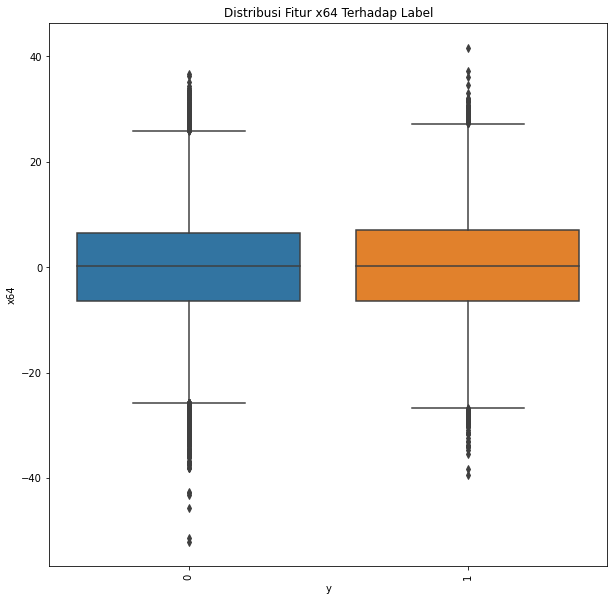

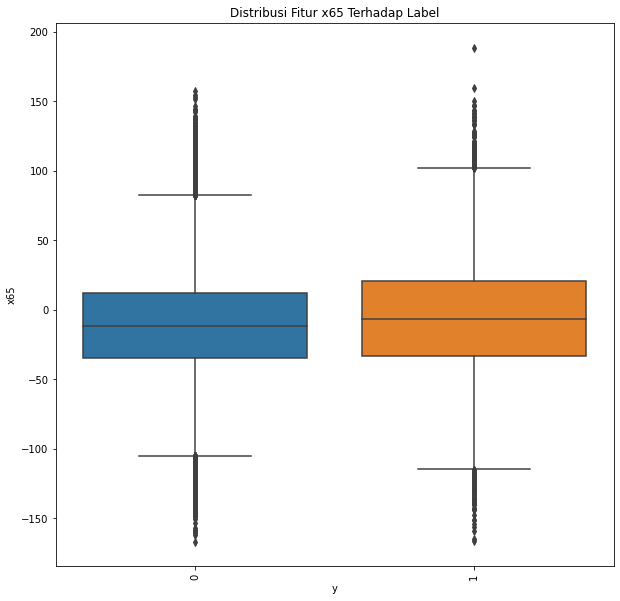

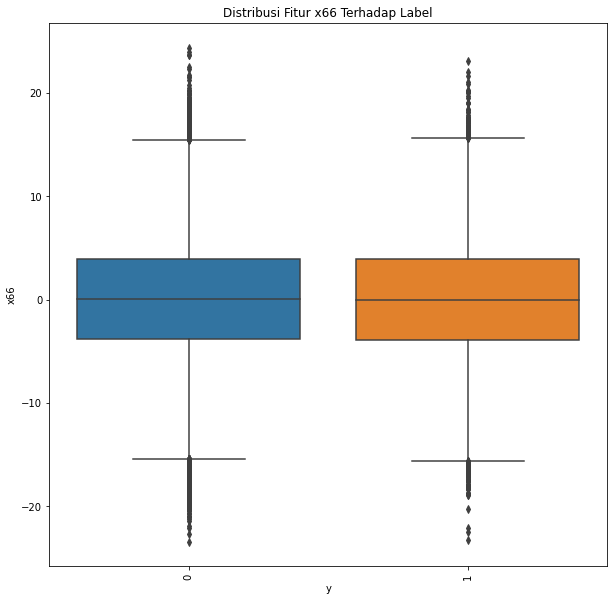

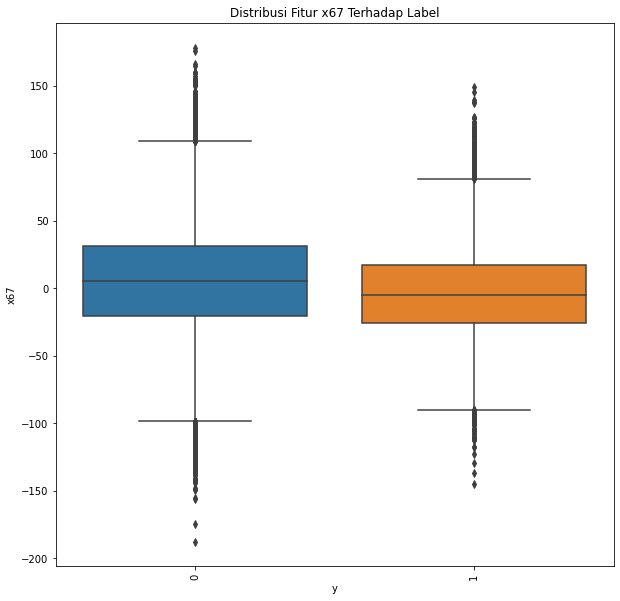

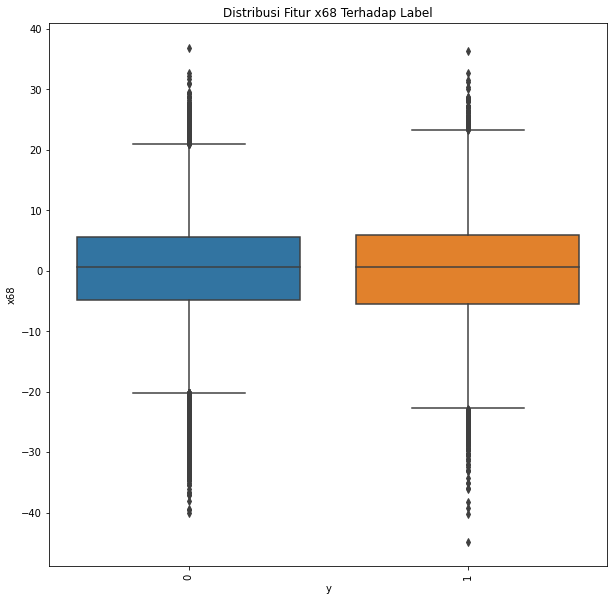

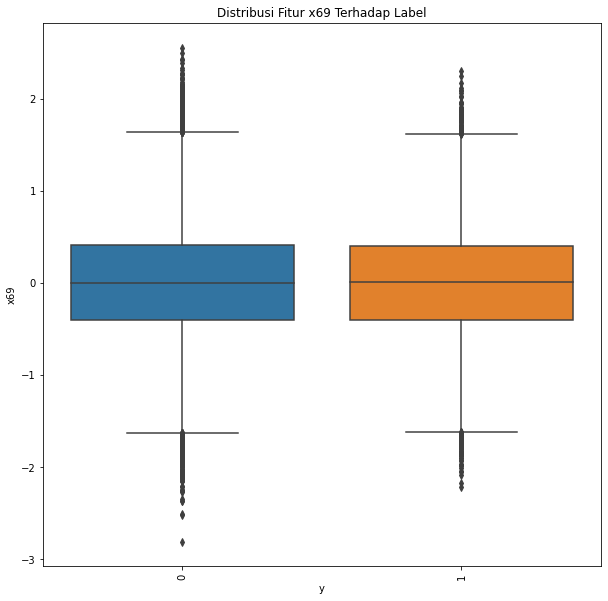

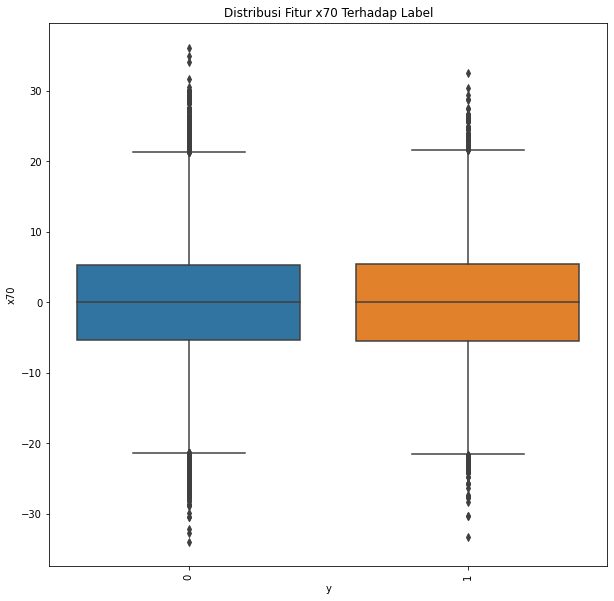

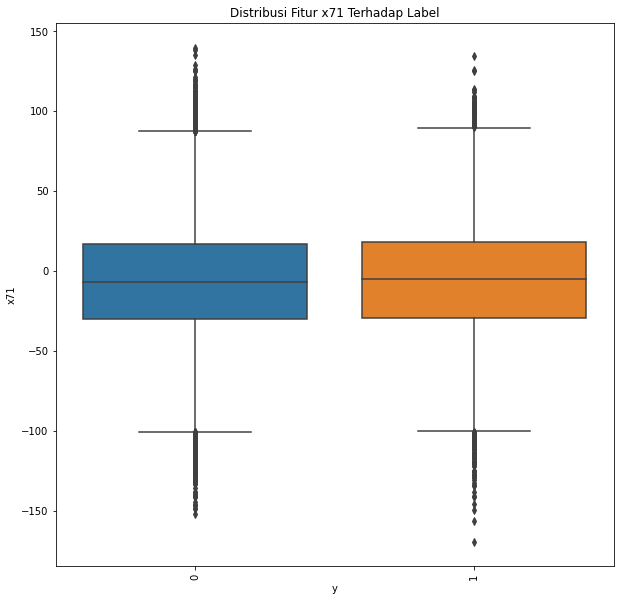

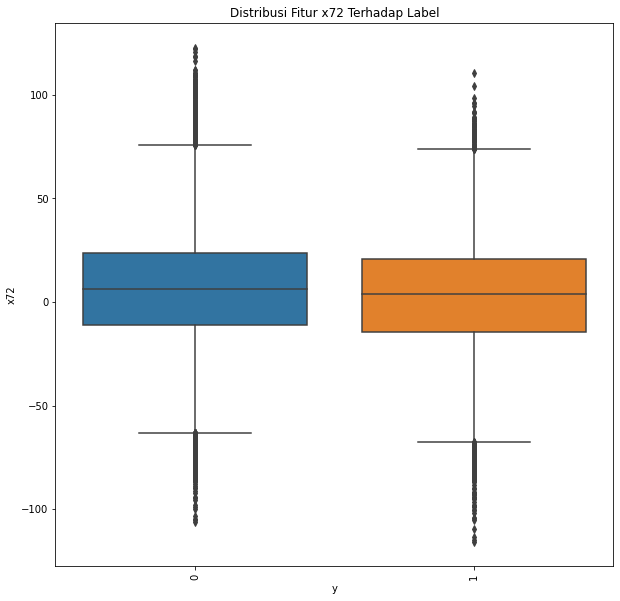

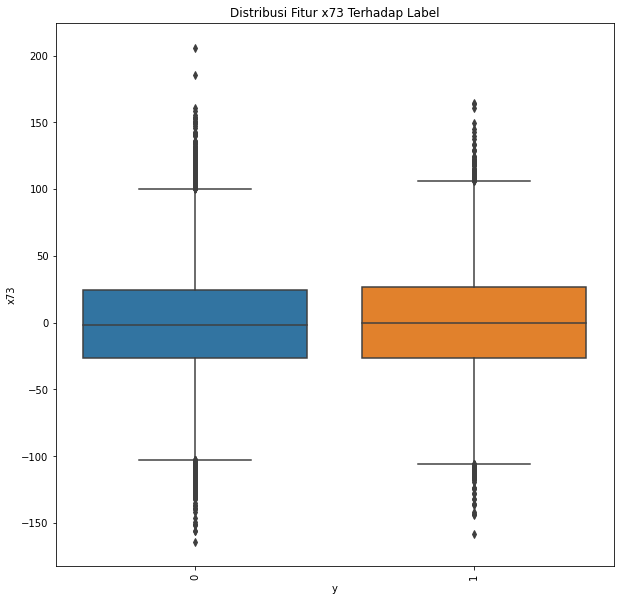

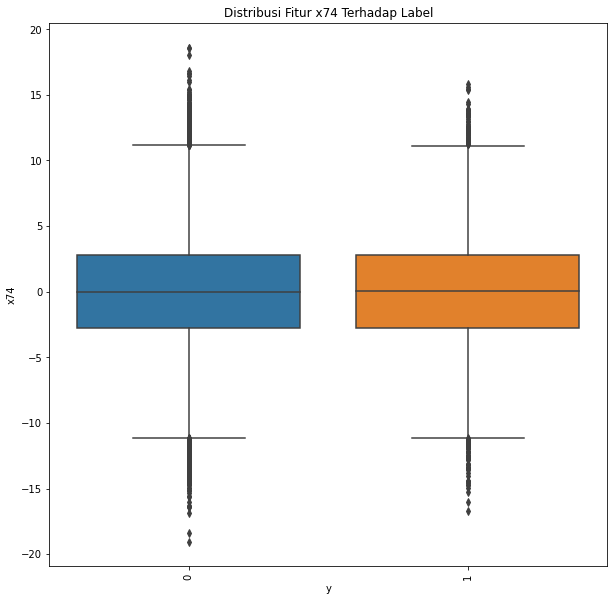

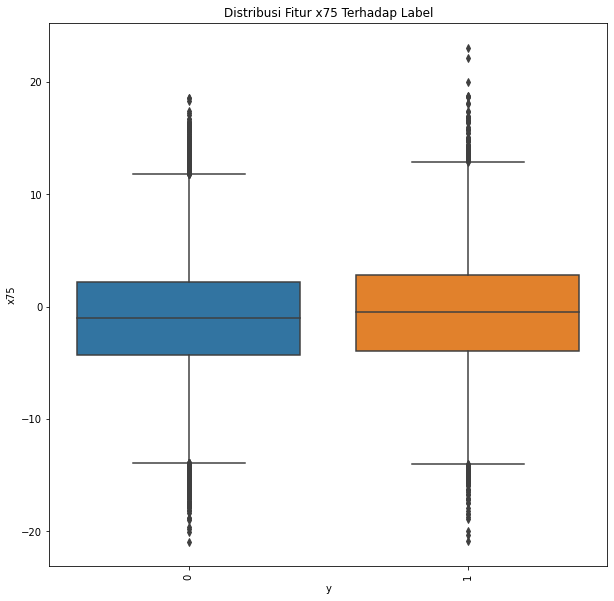

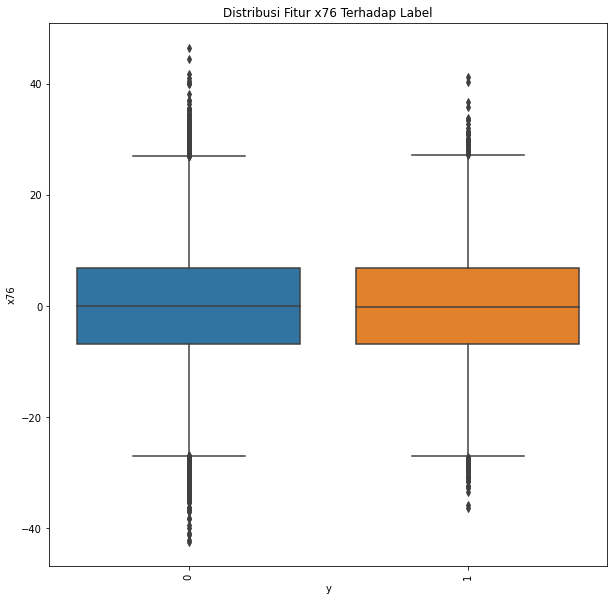

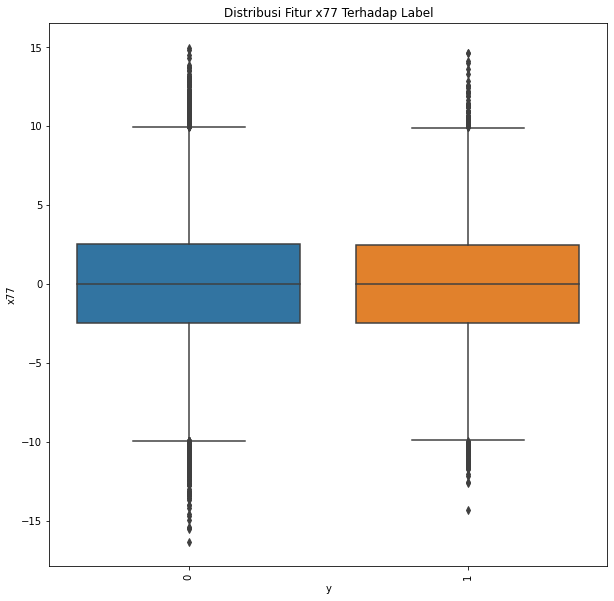

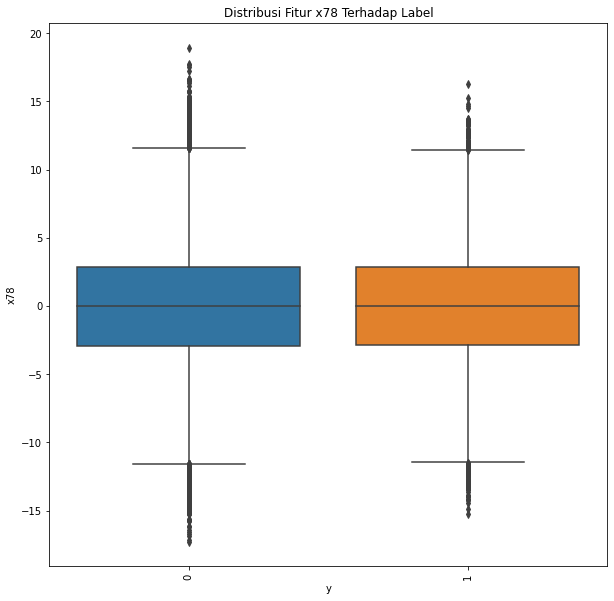

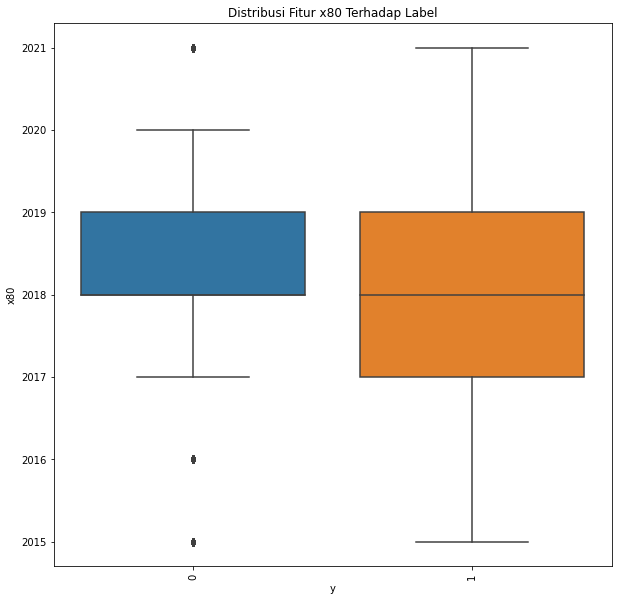

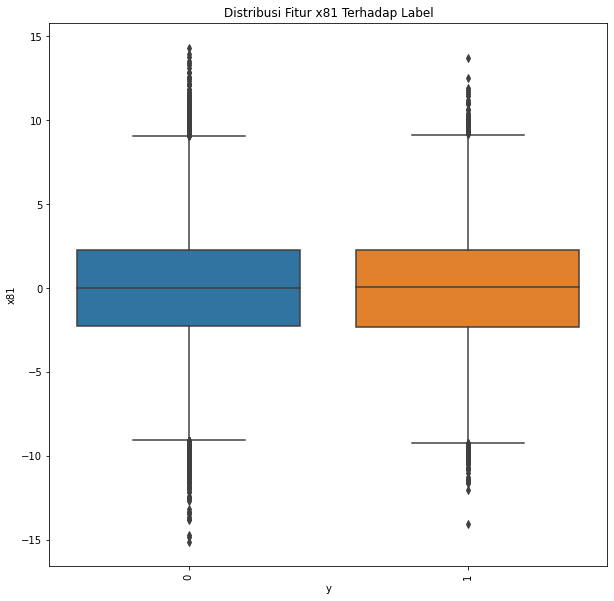

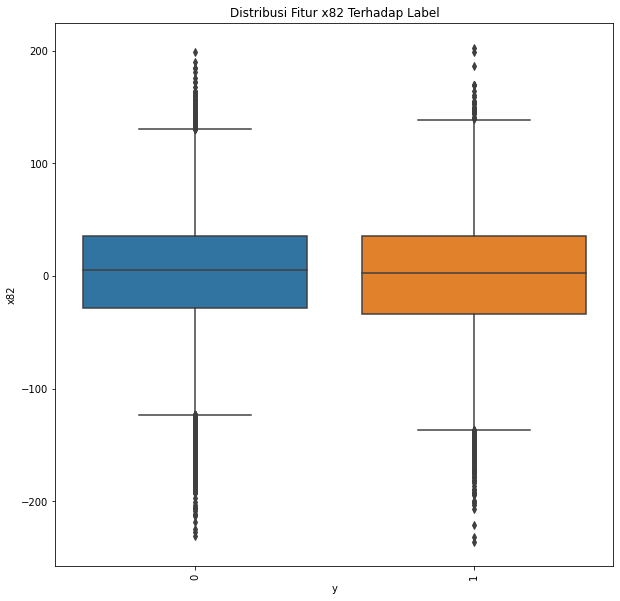

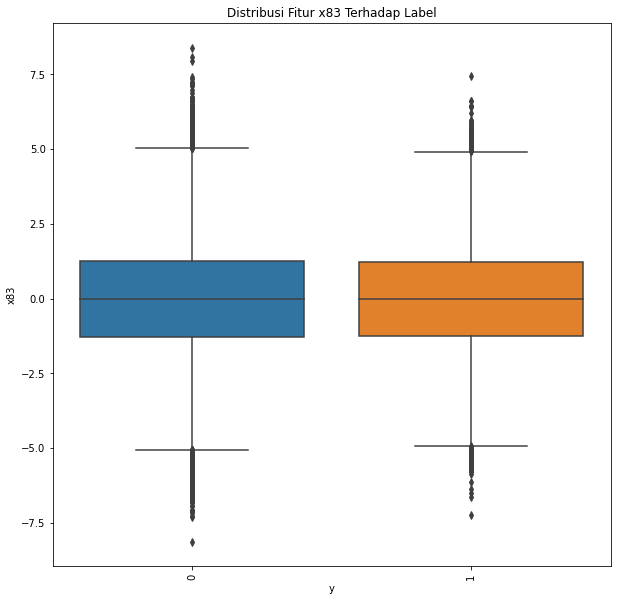

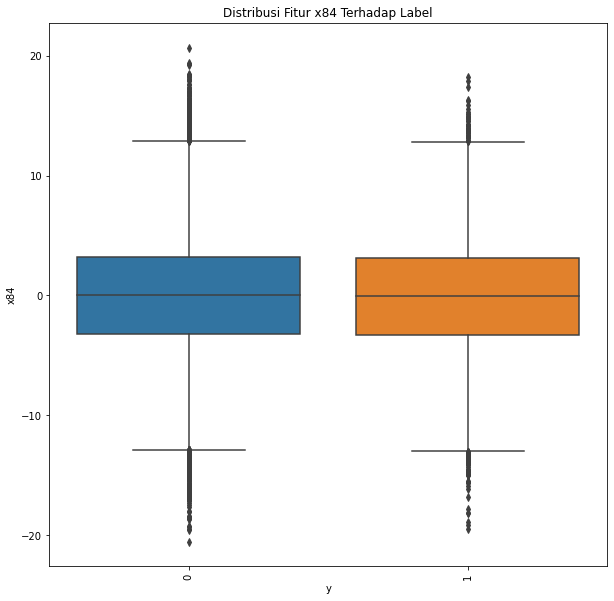

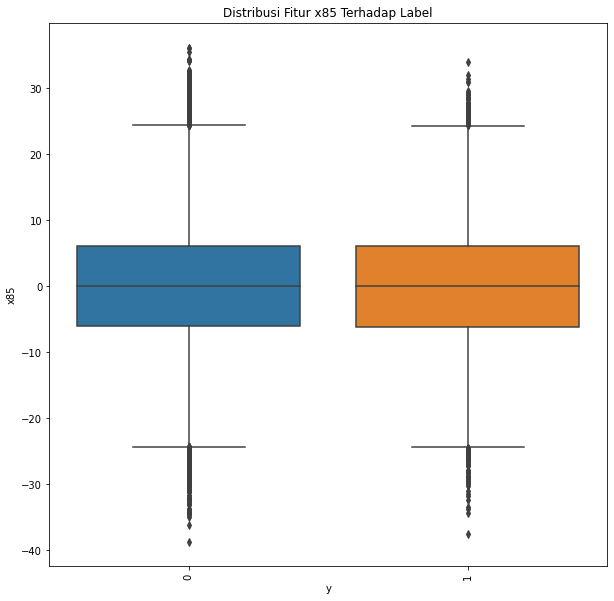

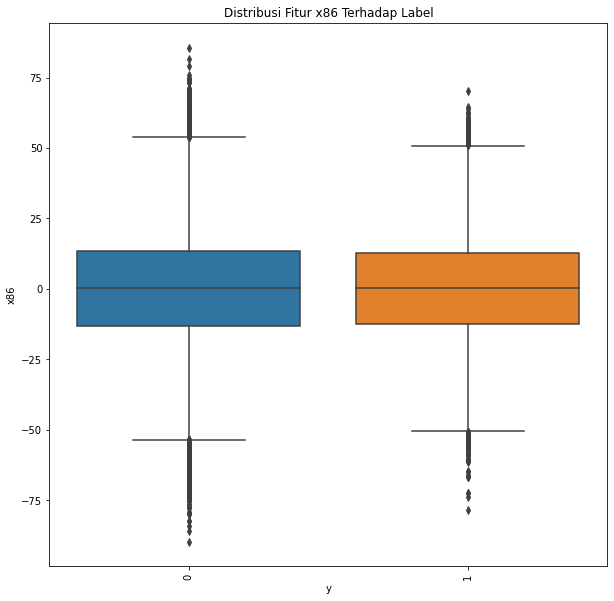

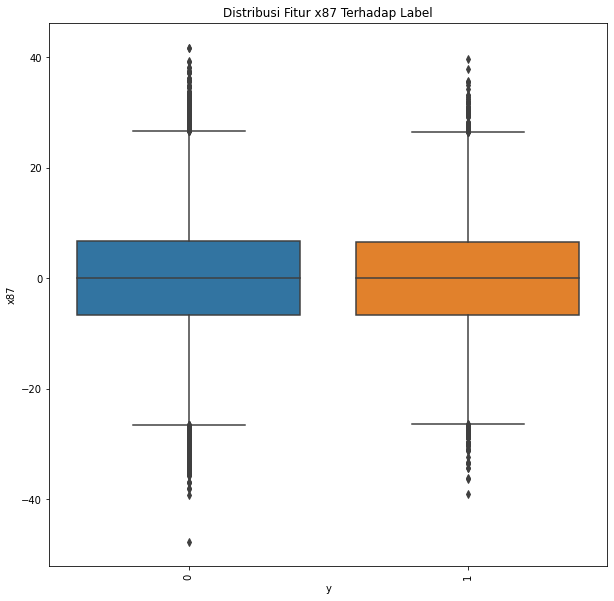

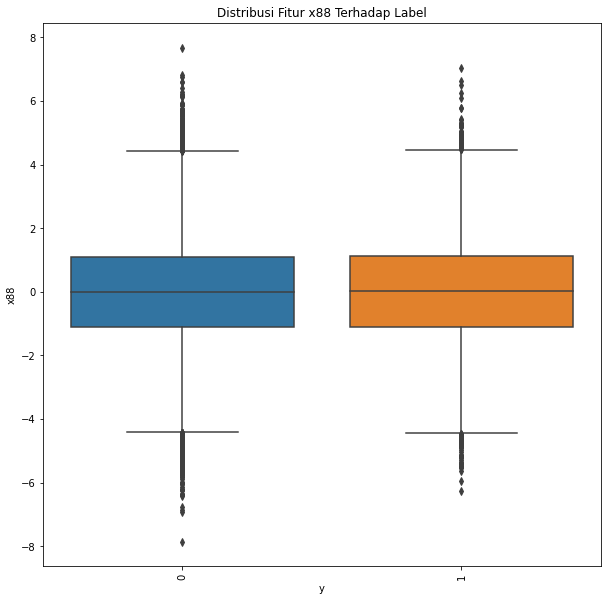

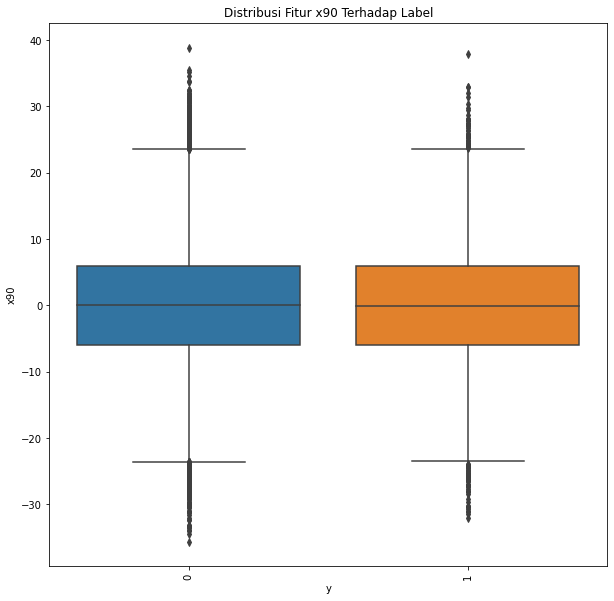

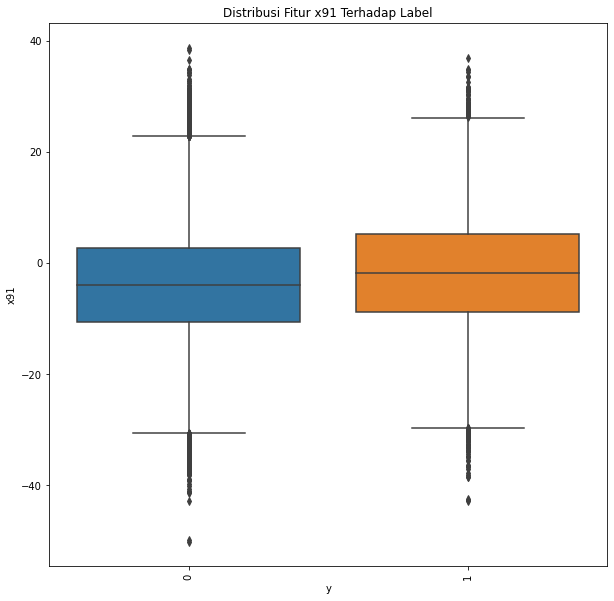

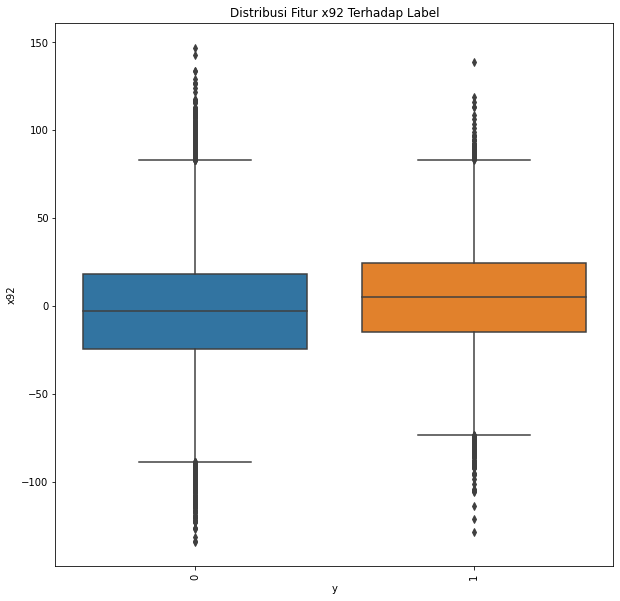

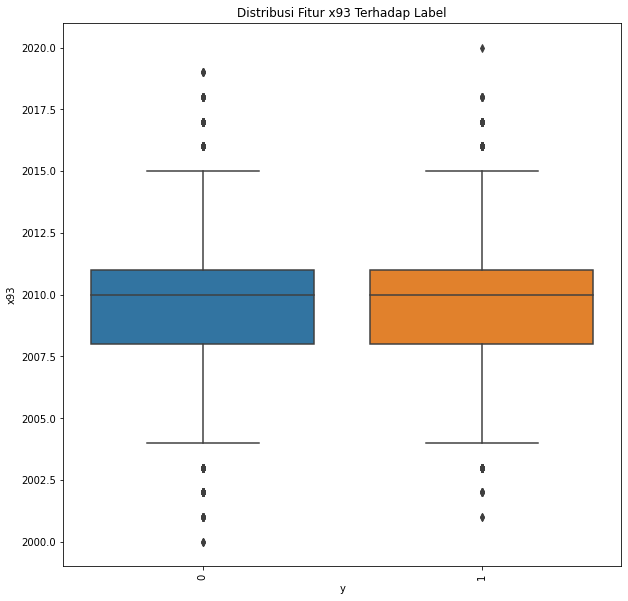

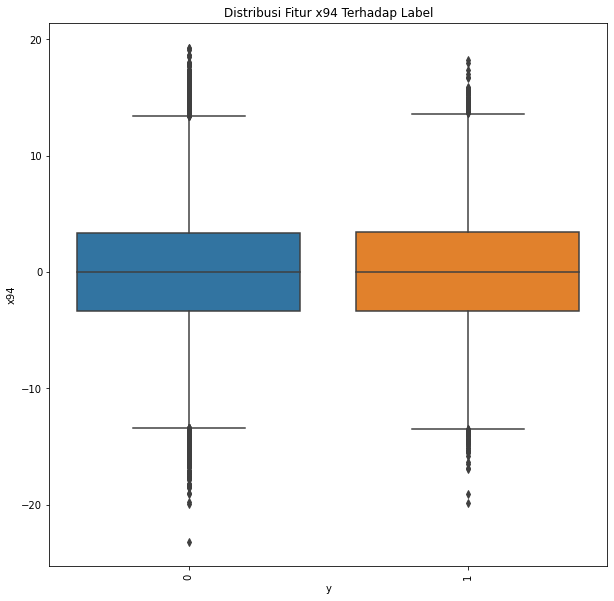

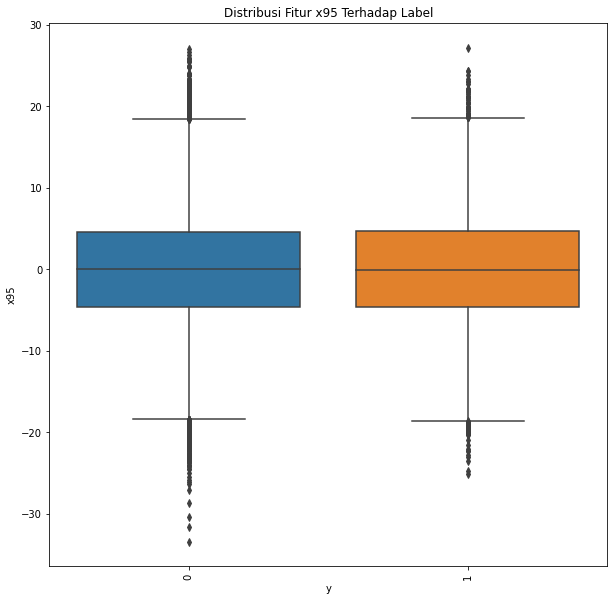

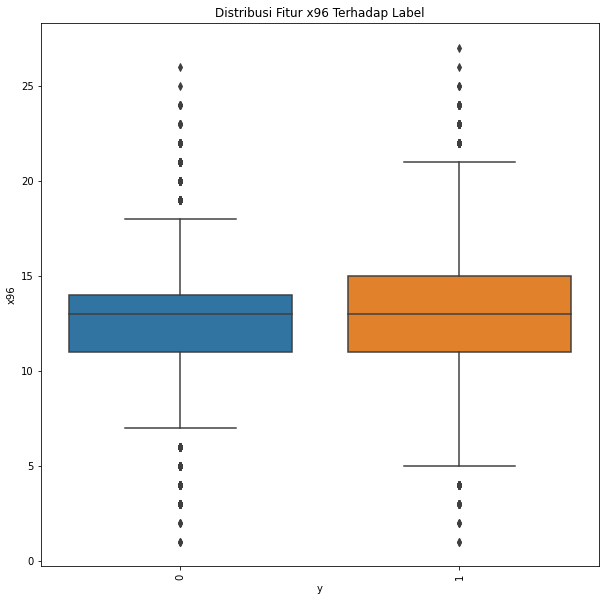

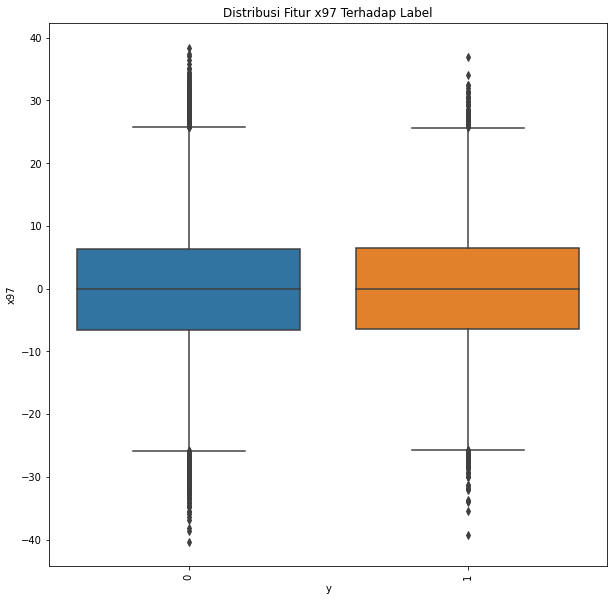

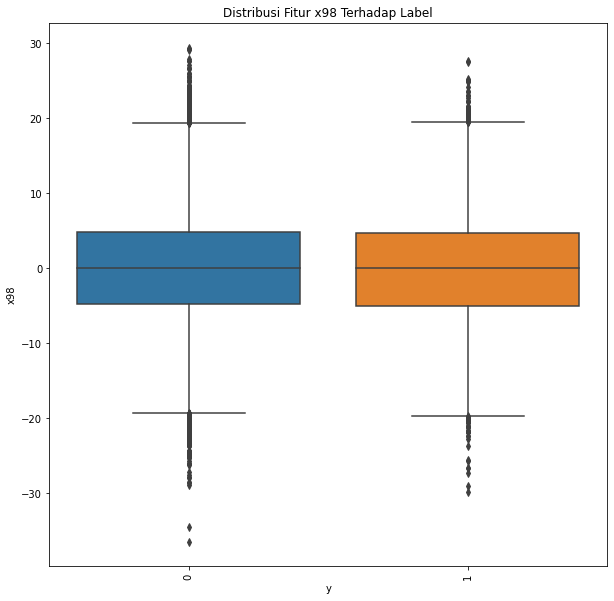

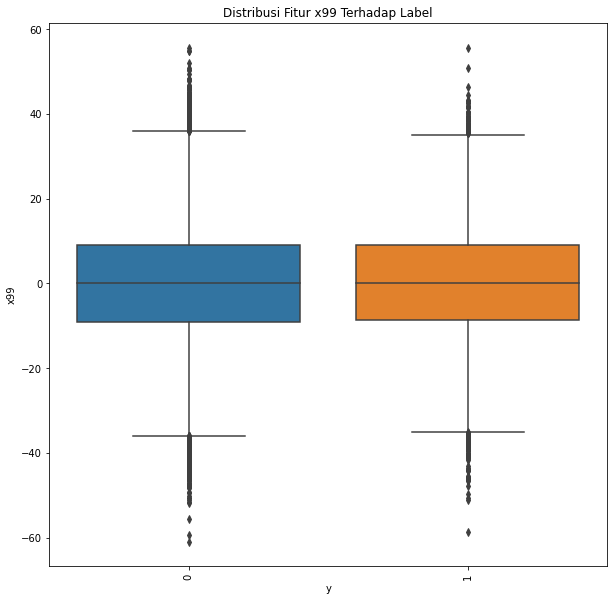

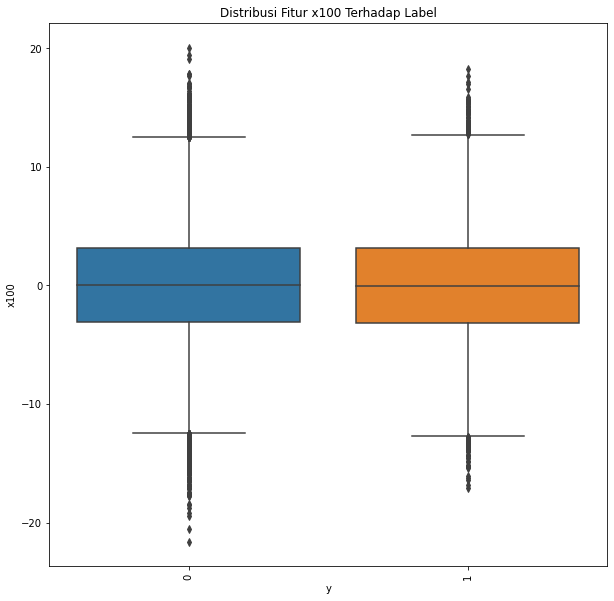

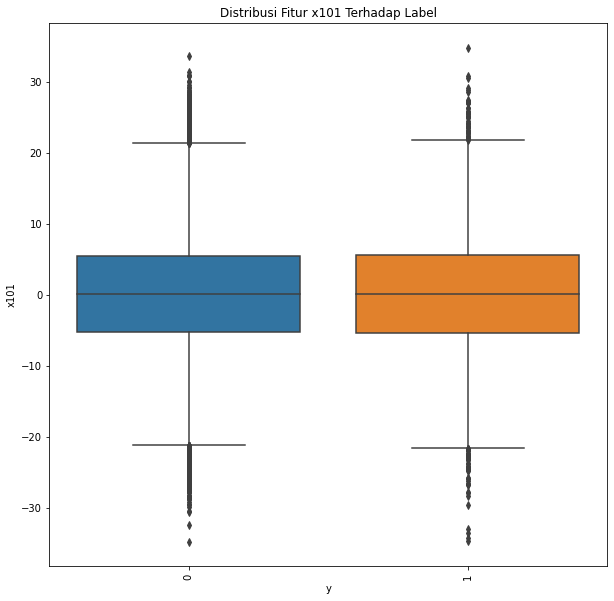

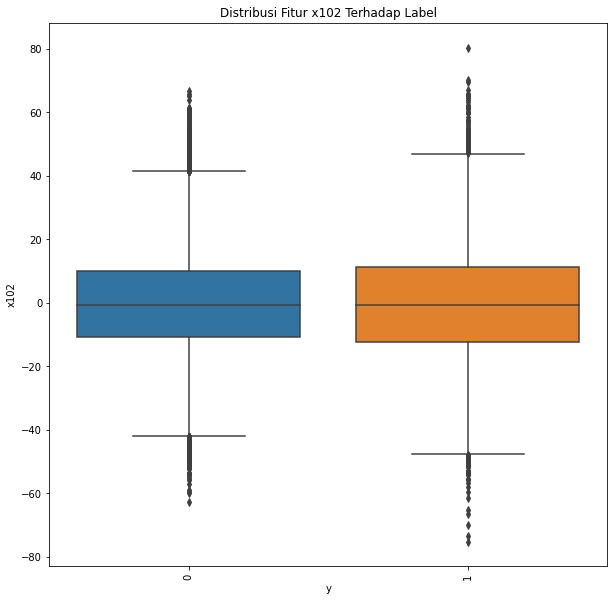

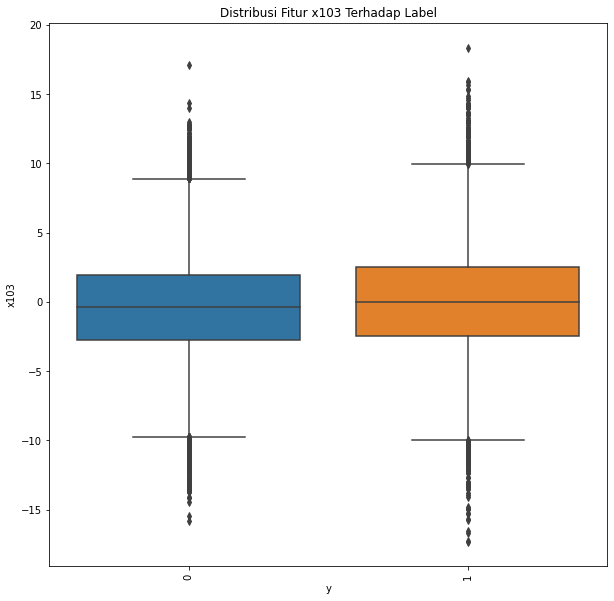

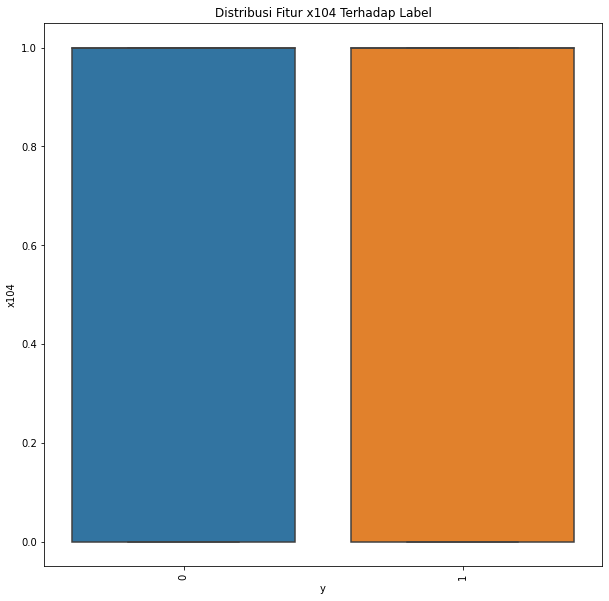

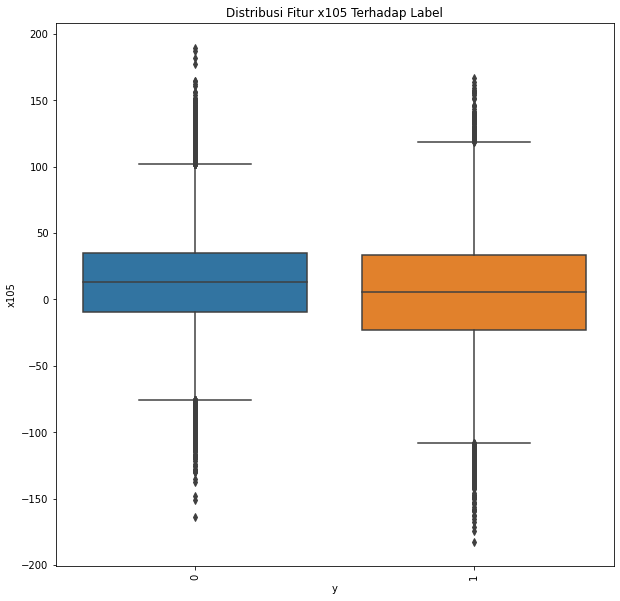

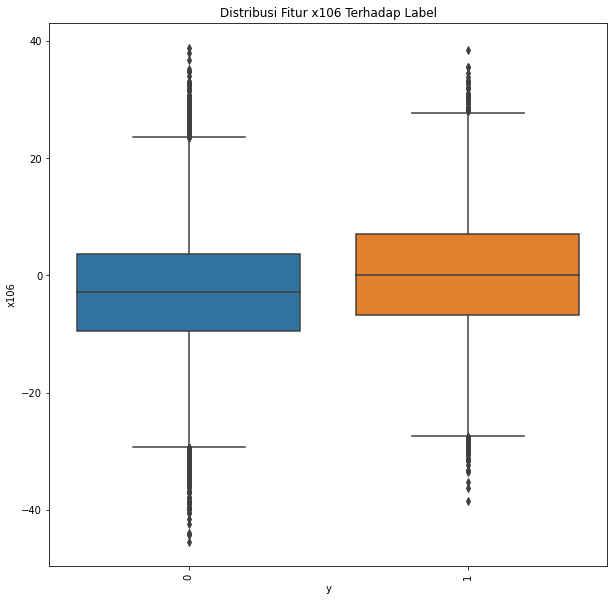

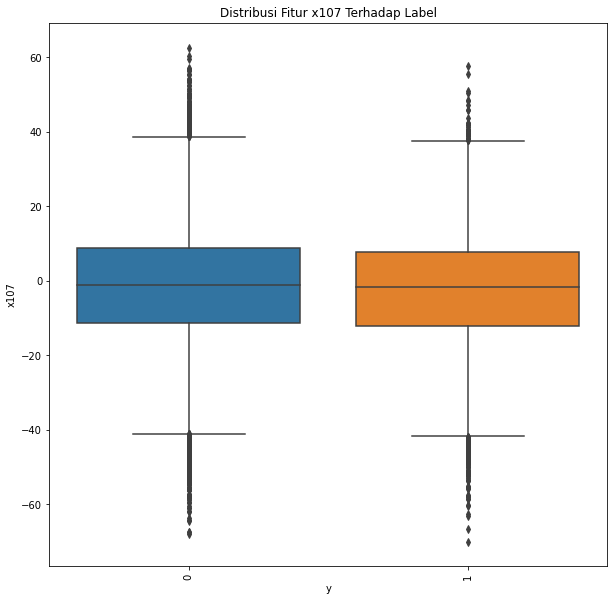

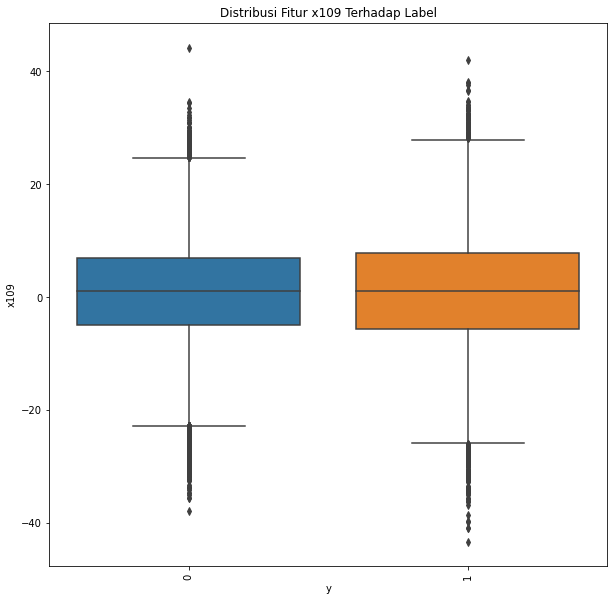

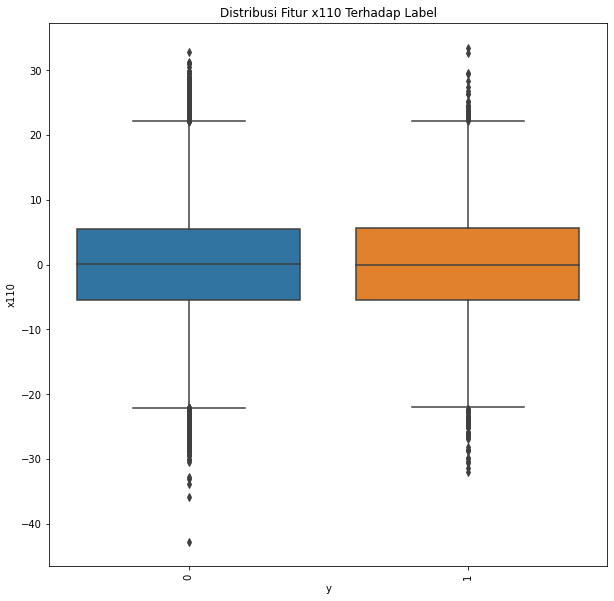

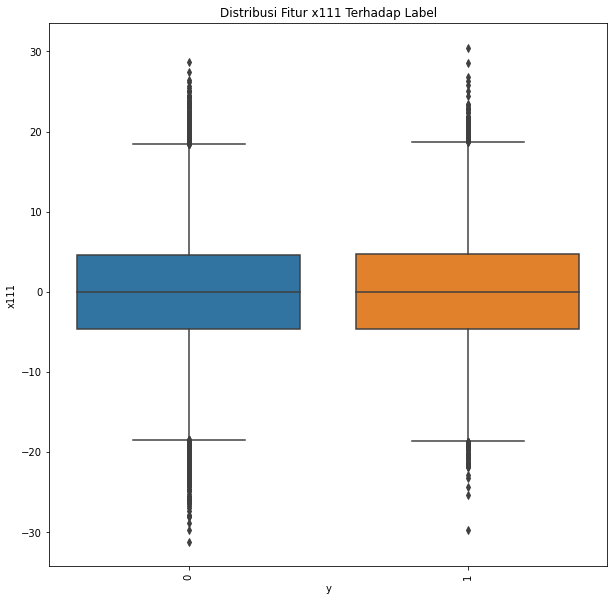

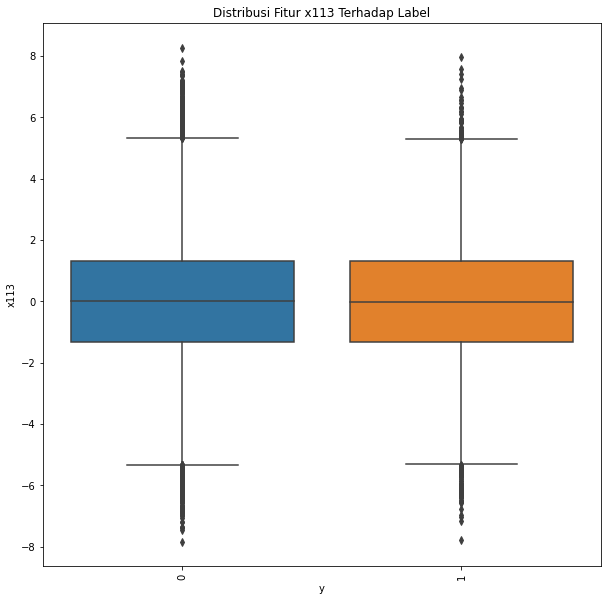

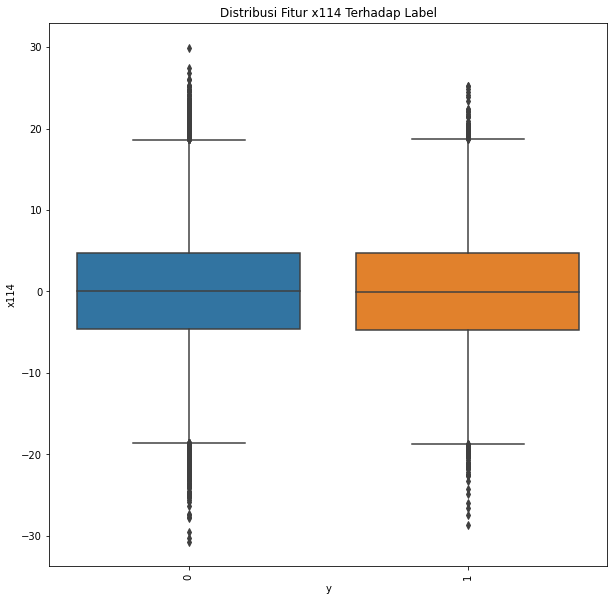

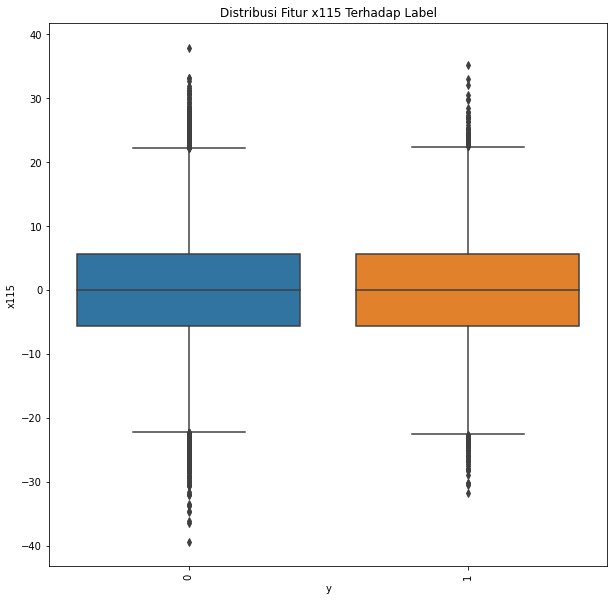

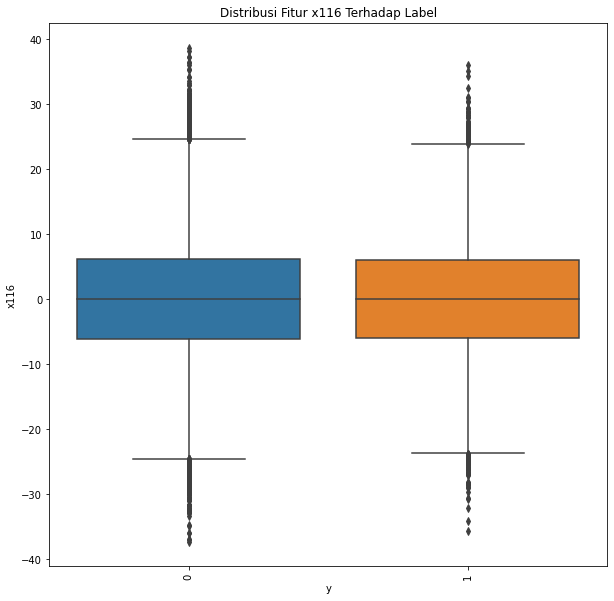

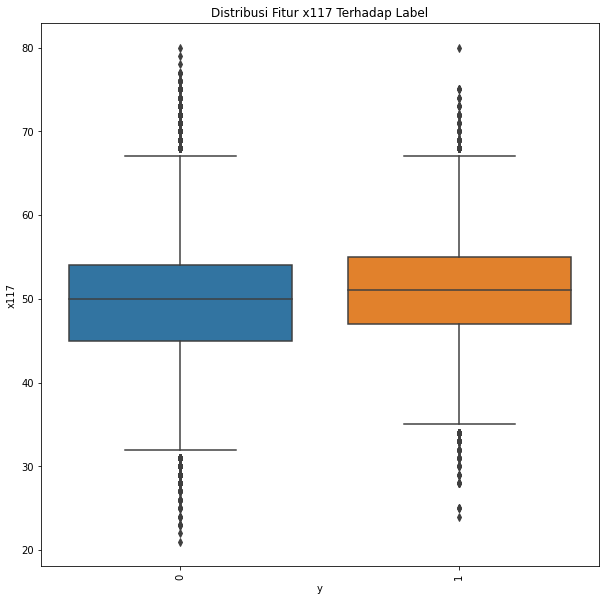

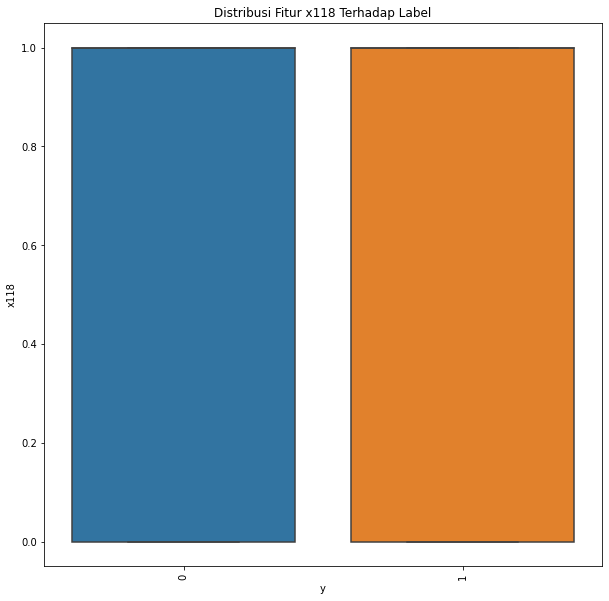

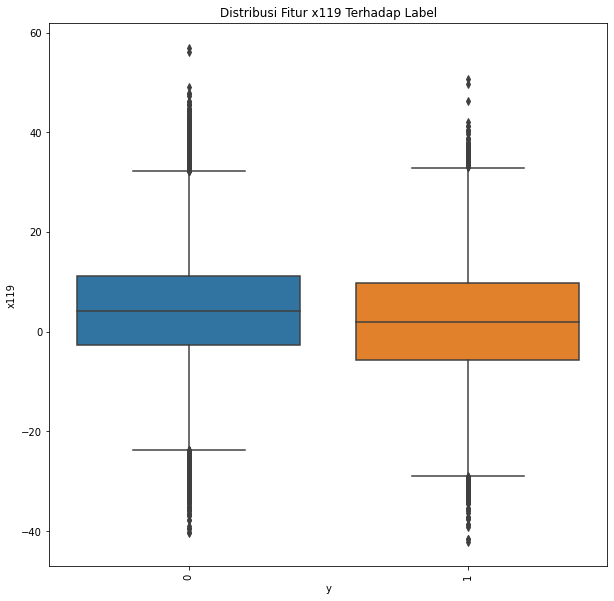

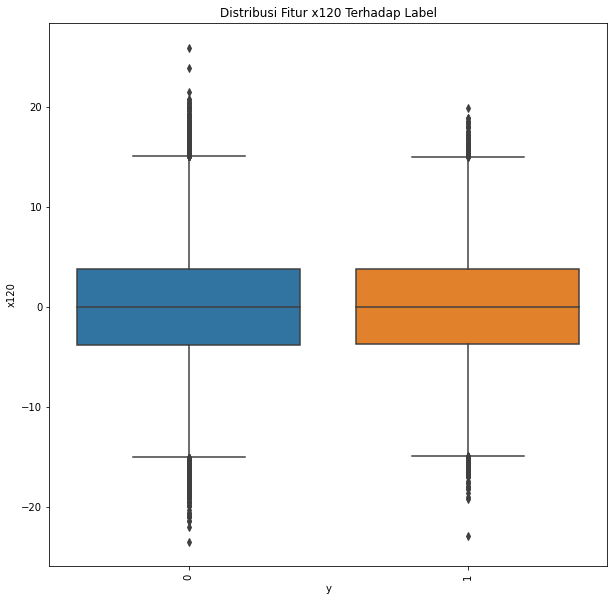

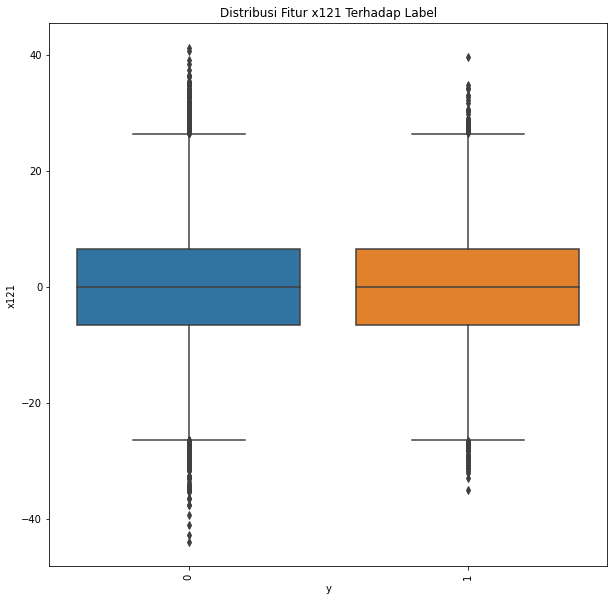

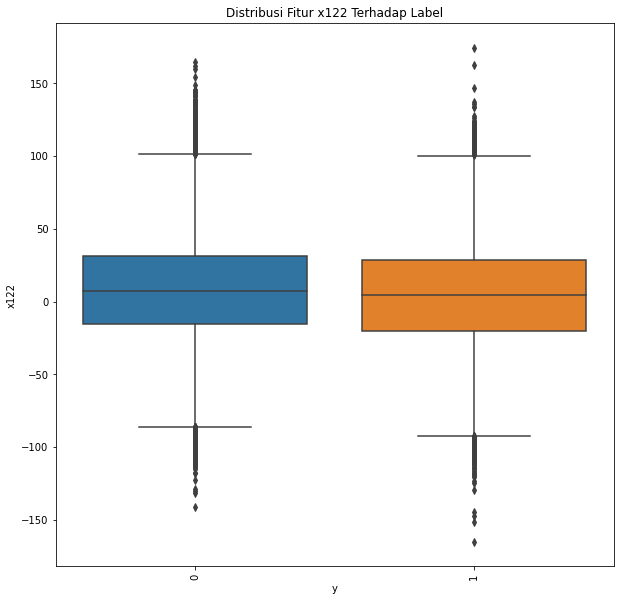

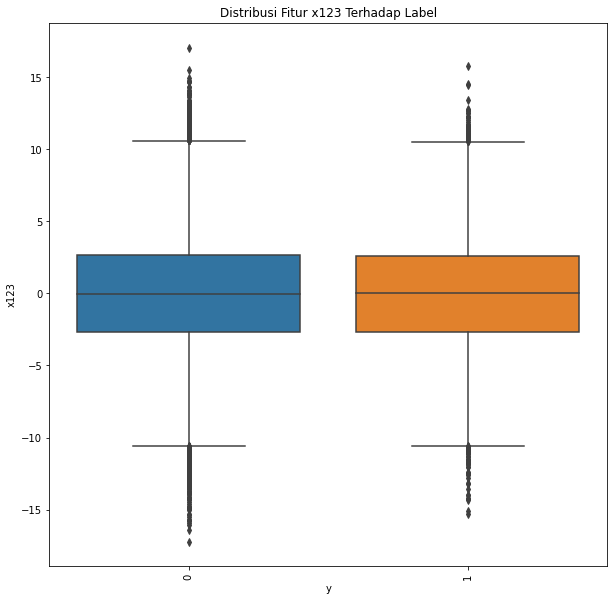

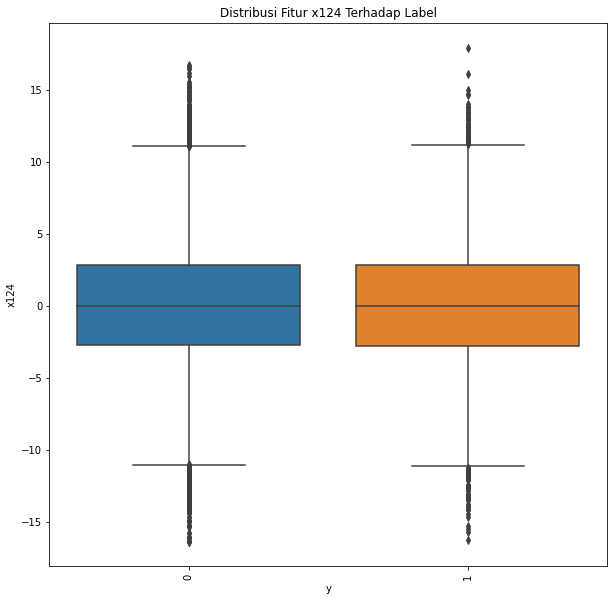

In [16]:
for col in numericFeature[:-1]:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df_churn_train, y=col, x='y')
    plt.title(f'Distribusi Fitur {col} Terhadap Label')
    plt.xticks(rotation=90)
    plt.show()

*Insight:*

Berdasarkan box plot di atas, berikut merupakan fitur yang diduga akan menjadi prediktor yang baik pada model karena persebaran data yang berbeda pada label.
    
Fitur-fitur terkait: **x13**, x17, x28, **x41**, **x44**, x46, **x57**, x59, x60, x61, x62, x65, x67, x72, **x80**, x82, x91, **x92**, x96, x102, x105, x106, x117, x119

#### *Categorical Feature*

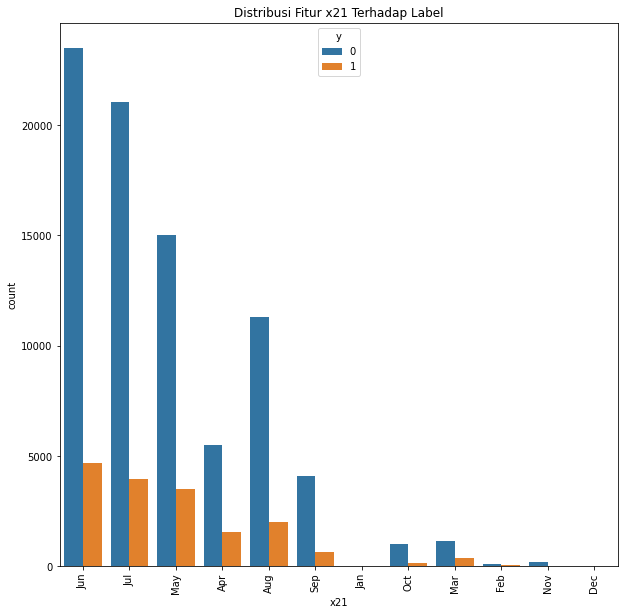

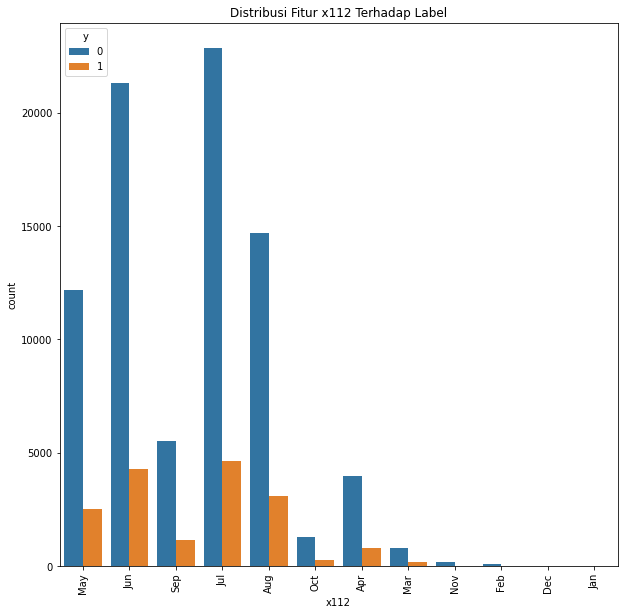

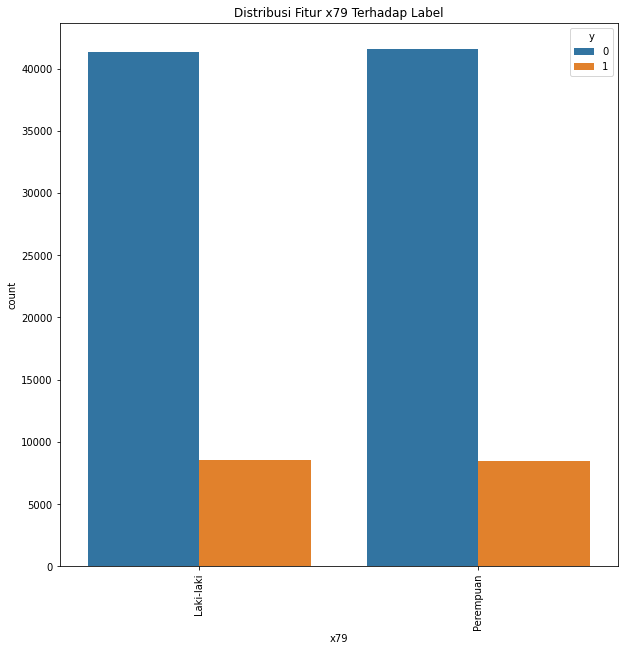

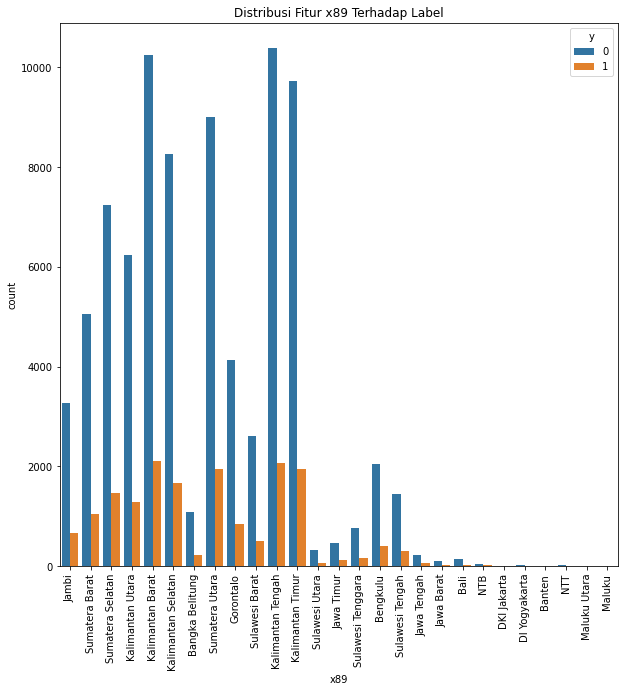

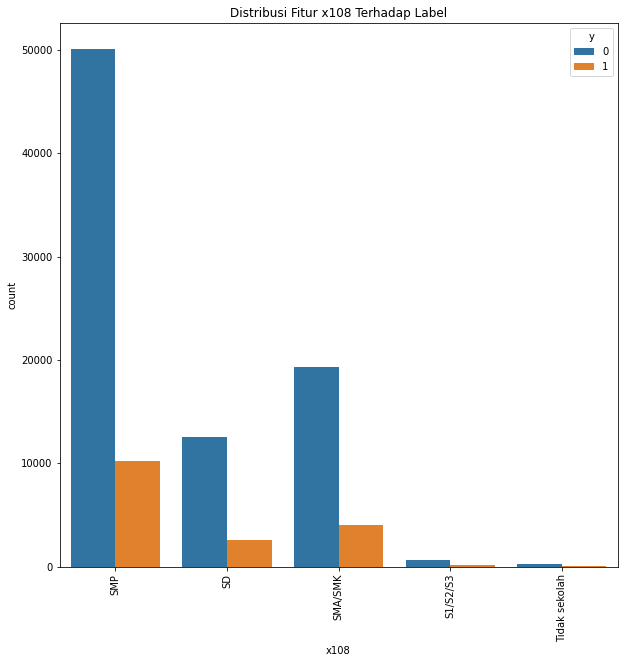

In [17]:
for col in objectFeature:
    plt.figure(figsize=(10,10))
    sns.countplot(data=df_churn_train, x=col, hue='y')
    
    plt.title(f'Distribusi Fitur {col} Terhadap Label')
    plt.xticks(rotation=90)
    plt.show()

*Insight:*

- Bulan Juni merupakan frekuensi data tertinggi pada fitur X21
- Jenis kelamin laki-laki dan perempuan memiliki proporsi yang sama
- Provinsi yang memiliki frekuensi data tertinggi adalah Kalimantan Tengah
- Tingkat pendidikan terbanyak adalah SMP

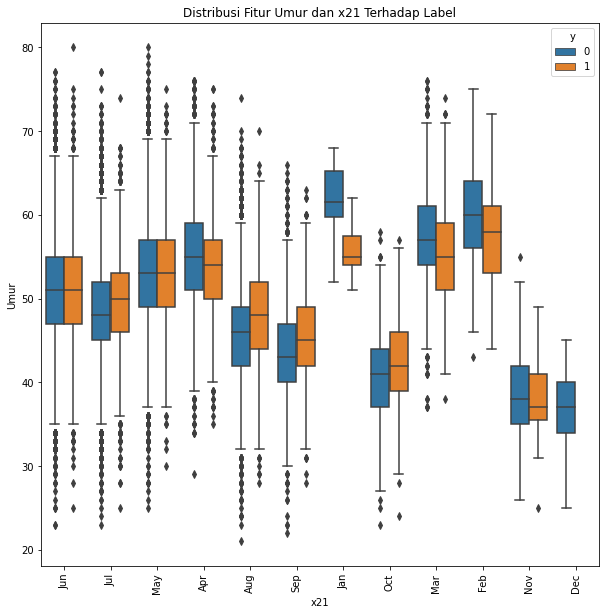

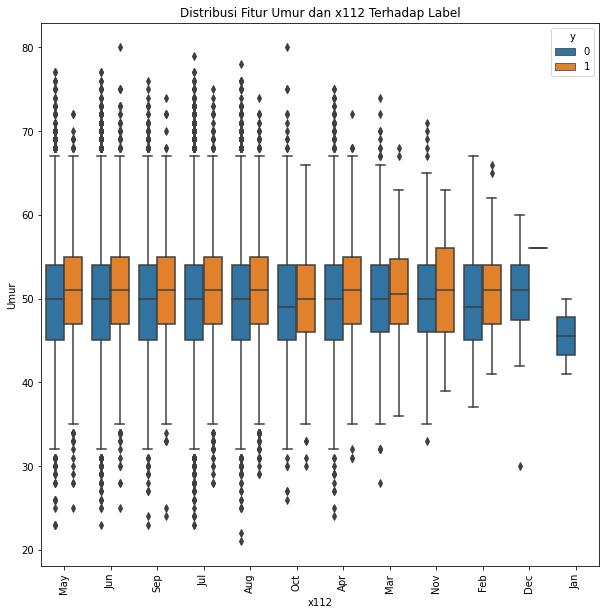

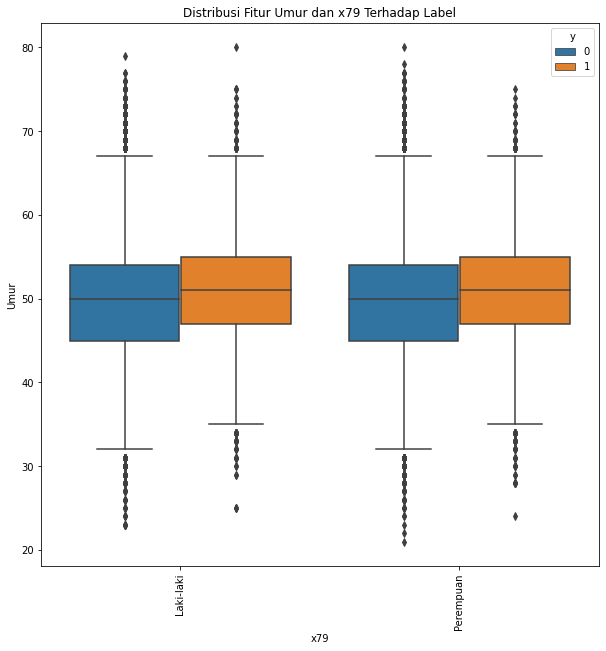

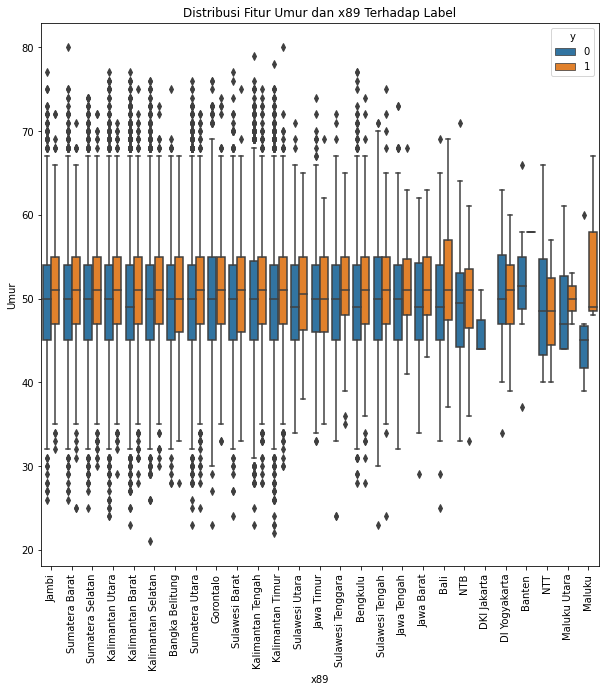

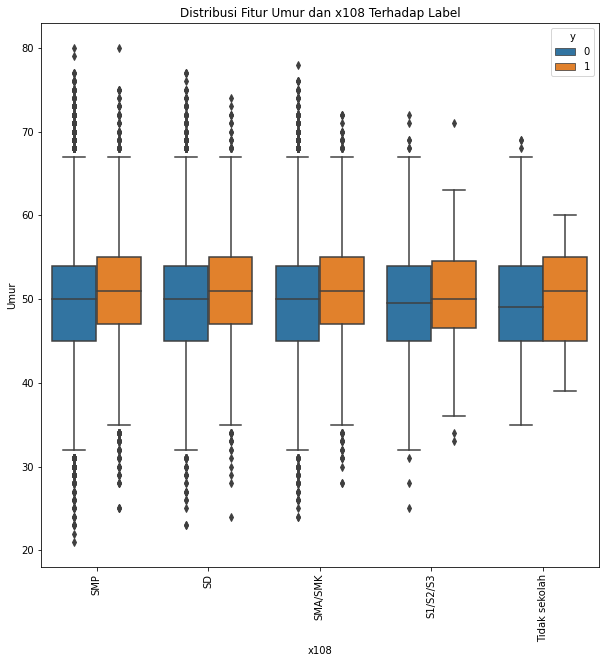

In [18]:
for col in objectFeature:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df_churn_train, x=col, y='x117', hue='y')
    plt.title(f'Distribusi Fitur Umur dan {col} Terhadap Label')
    plt.ylabel('Umur')
    plt.xticks(rotation=90)
    plt.show()

In [19]:
weird_label = [1, 2, 24, 25, 26]

for i in weird_label:
    bad = len(df_churn_train[(df_churn_train['x63'] == i) & (df_churn_train['y'] == 0)])
    good = len(df_churn_train[(df_churn_train['x63'] == i) & (df_churn_train['y'] == 1)])
    
    print(f'Pada fitur 63, jumlah kategori Bad Merchant: {bad} dan Good Merchant: {good}\n')

Pada fitur 63, jumlah kategori Bad Merchant: 5 dan Good Merchant: 1

Pada fitur 63, jumlah kategori Bad Merchant: 23 dan Good Merchant: 1

Pada fitur 63, jumlah kategori Bad Merchant: 22 dan Good Merchant: 5

Pada fitur 63, jumlah kategori Bad Merchant: 12 dan Good Merchant: 2

Pada fitur 63, jumlah kategori Bad Merchant: 4 dan Good Merchant: 0



columns data type  percent_missing_in_df_train
0       x70   float64                         0.16
1       x45   float64                         0.16
2       x14   float64                         0.16
3       x72   float64                         0.15
4      x110   float64                         0.15
..      ...       ...                          ...
120     x94   float64                         0.11
121     x62   float64                         0.11
122    x114   float64                         0.10
123    x113   float64                         0.10
124     x81   float64                         0.10

[125 rows x 3 columns]

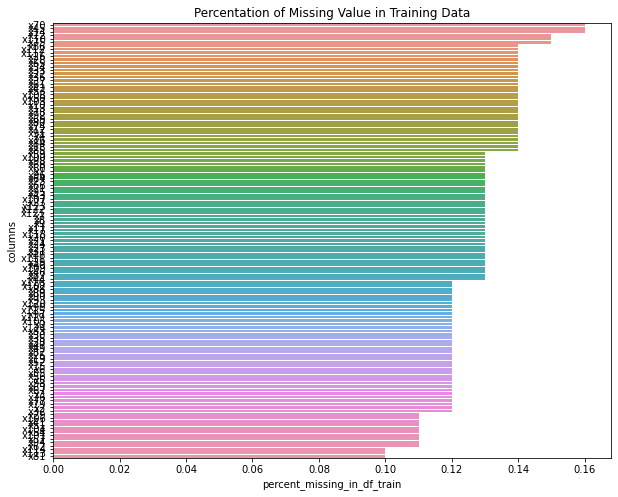

In [20]:
# Missing value in training data
percent_missing = round(df_churn_train.isnull().sum()*100/len(df_churn_train), 2)

# df train
missing_value = pd.DataFrame({'columns':df_churn_train.columns,
                              'data type': df_churn_train.dtypes,
                              'percent_missing_in_df_train':percent_missing})
missing_value = missing_value[missing_value['percent_missing_in_df_train']>0].sort_values('percent_missing_in_df_train', ascending=False).reset_index(drop=True)
display(missing_value)

plt.figure(figsize=(10,8))
sns.barplot(data=missing_value, x='percent_missing_in_df_train', y='columns')
plt.title('Percentation of Missing Value in Training Data')
plt.show()

columns data type  percent_missing_in_df_test
0      x123   float64                        0.18
1       x33   float64                        0.18
2       x85   float64                        0.18
3       x78   float64                        0.18
4       x42   float64                        0.18
..      ...       ...                         ...
120     x32   float64                        0.08
121     x60   float64                        0.08
122     x29   float64                        0.08
123     x88   float64                        0.08
124     x50   float64                        0.08

[125 rows x 3 columns]

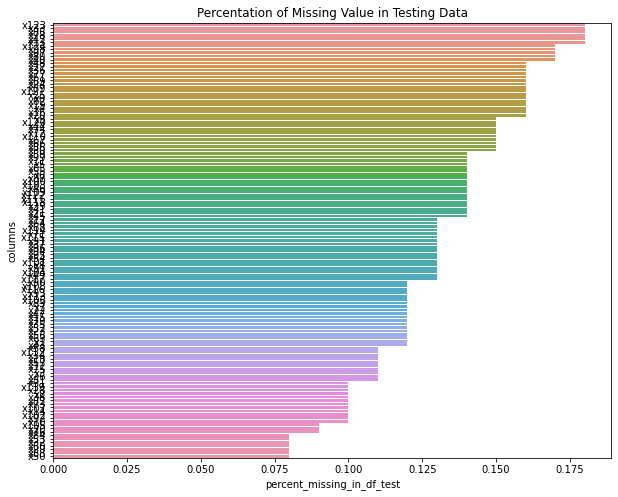

In [21]:
# Missing value in test data
percent_missing2 = round(df_churn_test.isnull().sum()*100/len(df_churn_test), 2)

# df test
missing_value2 = pd.DataFrame({'columns': df_churn_test.columns,
                               'data type': df_churn_test.dtypes,
                              'percent_missing_in_df_test': percent_missing2})
missing_value2 = missing_value2[missing_value2['percent_missing_in_df_test']>0].sort_values('percent_missing_in_df_test', ascending=False).reset_index(drop=True)
display(missing_value2)

plt.figure(figsize=(10,8))
sns.barplot(data=missing_value2, x='percent_missing_in_df_test', y='columns')
plt.title('Percentation of Missing Value in Testing Data')
plt.show()

# Data Preparation

### ***Data Splitting***

In [22]:
df = df_churn_train.copy()

X = df.drop(['y'], axis=1)
y = df['y']

# Normal data
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,  
                                                  stratify=y,
                                                  test_size = 0.2,
                                                  random_state = 2022)

# Undersampling data with Random Under Sampling
under_sampling = RandomUnderSampler(sampling_strategy='majority')
X_train_us, y_train_us = under_sampling.fit_resample(X_train, y_train)

# Oversampling data with Random Over Sampling
over_sampling = RandomOverSampler(random_state=42)
X_train_os, y_train_os = over_sampling.fit_resample(X_train, y_train)

### ***Column Transformer***

In [23]:
for col in df_churn_train.describe(include='O').columns:
    print(f'Total unique value of {col} is {df_churn_train[col].nunique()}')

Total unique value of x21 is 12
Total unique value of x79 is 2
Total unique value of x89 is 27
Total unique value of x108 is 5
Total unique value of x112 is 12


**Treatment for categorical featured is based on unique value.**

- Binary encoding: x21, x89, x112

- One Hot Encoding: x79

- Ordinal Encoding: x108

In [24]:
ordinal_mapping = [{
    "col": 'x108',
    "mapping":{
        "Tidak sekolah":1, 
        "SD":2, 
        "SMP":3, 
        "SMA/SMK":4, 
        "S1/S2/S3":5
}}]

# Features
miss_numerical_feature = df_churn_train.iloc[:, :-1].describe(exclude='O').columns.tolist()
miss_bin_categorical_feature = ['x21', 'x89', 'x112']
miss_oht_categorical_feature = ['x79']
miss_ord_categorical_feature = ['x108']

# Imputer
simple = SimpleImputer(missing_values=np.nan, strategy='mean')
categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
knn_3 = KNNImputer(n_neighbors=3)
knn_5 = KNNImputer(n_neighbors=5)

# Encoding
one_hot_enc = OneHotEncoder(drop='first')
ordinal_enc = ce.OrdinalEncoder(mapping = ordinal_mapping, handle_missing='return_nan')
binary_enc = ce.BinaryEncoder()

# ColumnTransformer
miss_ord_pipeline = Pipeline([
    ('ordinal_cat', ordinal_enc),
    ('cat_imputer2', categorical_imputer),
])

miss_bin_pipeline = Pipeline([
    ('cat_imputer', categorical_imputer),
    ('binary_cat', binary_enc),
])

miss_oht_pipeline = Pipeline([
    ('cat_imputer', categorical_imputer),
    ('one_hot_cat', one_hot_enc),
])

transformer_pipeline = ColumnTransformer([
    ('ordinal_encoding', miss_ord_pipeline, miss_ord_categorical_feature),
    ('binary_encoding', miss_bin_pipeline, miss_bin_categorical_feature),
    ('one_hot_encoding', miss_oht_pipeline, miss_oht_categorical_feature),
    ('numeric_miss', simple, miss_numerical_feature),
], remainder='passthrough')

In [25]:
display(transformer_pipeline)
test_df = pd.DataFrame(transformer_pipeline.fit_transform(X_train))

display(test_df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_encoding',
                                 Pipeline(steps=[('ordinal_cat',
                                                  OrdinalEncoder(handle_missing='return_nan',
                                                                 mapping=[{'col': 'x108',
                                                                           'mapping': {'S1/S2/S3': 5,
                                                                                       'SD': 2,
                                                                                       'SMA/SMK': 4,
                                                                                       'SMP': 3,
                                                                                       'Tidak sekolah': 1}}])),
                                                 ('cat_imputer2',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['x108']),
                                ('binary_encoding',
                                 Pipeline(steps=[...
                                ('one_hot_encoding',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_cat',
                                                  OneHotEncoder(drop='first'))]),
                                 ['x79']),
                                ('numeric_miss', SimpleImputer(),
                                 ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6',
                                  'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13',
                                  'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
                                  'x20', 'x22', 'x23', 'x24', 'x25', 'x26',
                                  'x27', 'x28', 'x29', 'x30', ...])])

0    1    2    3    4    5    6    7    8    9    ...        125  \
0      2.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  -6.111343   
1      3.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...   0.363618   
2      3.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  14.155805   
3      3.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  11.500424   
4      3.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  -3.667698   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...        ...   
79995  3.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...   0.418699   
79996  3.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...   1.668453   
79997  4.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  ... -10.731888   
79998  4.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  -1.055973   
79999  3.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  ...   8.818834   

            126   127  128        129        130        131        132  \
0      4.926777  57.0  1.0  -6.238454   6.489501 -17.899266 -15.882007   
1     -1.762440  41.0  0.0  19.516630   2.185991   4.917689  -7.153034   
2      2.637721  52.0  1.0  -8.888071   5.830039  21.002849  50.818908   
3     -3.809051  45.0  0.0  16.536523   8.663635   7.390536 -27.370149   
4      3.846596  55.0  0.0   7.444797   0.279992  -0.362138 -13.882419   
...         ...   ...  ...        ...        ...        ...        ...   
79995  5.407974  57.0  0.0  11.878448   7.058700  10.681564  22.086462   
79996 -9.225922  59.0  0.0 -10.617338  -2.736424 -10.409535 -12.063589   
79997  9.591193  68.0  0.0 -23.146183  11.127620  -2.092735 -59.670288   
79998  6.770241  47.0  0.0   2.150734   0.945709  22.356649  28.616651   
79999 -7.731382  44.0  1.0   4.270260  -1.684787  -2.193810  14.271049   

            133        134  
0     -2.849061   3.909235  
1     -0.669008   1.562628  
2     -5.749381  -4.017600  
3     -2.802086  10.861799  
4     -5.920663   3.695748  
...         ...        ...  
79995 -0.856662  -4.017844  
79996 -4.449583   6.367106  
79997  0.366970  -5.943769  
79998 -4.571394   5.423012  
79999  1.646232  -4.034671  

[80000 rows x 135 columns]

# Modelling & Evaluation

### *Benchmarking Testing*

In [26]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()
catb = CatBoostClassifier(silent=True)

In [27]:
# Cross Validation
def cross_val_test(transform, X_train, y_train, models, models_name):
    score_cv_auc = []
    score_mean_auc = []
    score_std_auc = []
    score_test_auc = []
    
    for i in range(len(X_train)):
        for model in models:
            estimator = Pipeline([
                ('preprocessing', transform),
                ('model', model)
            ])
            
            # Fitting
            cv_auc = cross_val_score(estimator,
                                     X_train[i],
                                     y_train[i],
                                     cv = StratifiedKFold(n_splits=5),
                                     scoring = 'roc_auc')

            score_cv_auc.append(cv_auc.round(2))
            score_mean_auc.append(cv_auc.mean())
            score_std_auc.append(cv_auc.std())

            estimator.fit(X_train[i], y_train[i])

            test_auc = roc_auc_score(y_val,
                                     estimator.predict(X_val))
            score_test_auc.append(test_auc)
     
    summary = pd.DataFrame({
        'Model': models_name,
        'CV_AUC' : score_cv_auc,
        'Mean_AUC': score_mean_auc,
        'Std_AUC': score_std_auc,
        'score_test_AUC' : score_test_auc,
    })
    
    return summary

#### *Unsampling Data*

In [28]:
models = [lr, dt, rf, xgb, lgb, catb]
models_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']

df_benchmarking = cross_val_test(transformer_pipeline, 
                                 [X_train], 
                                 [y_train], 
                                 models, 
                                 models_name)
df_benchmarking

Model                          CV_AUC  Mean_AUC   Std_AUC  \
0  Logistic Regression  [0.63, 0.63, 0.63, 0.63, 0.64]  0.632499  0.004933   
1        Decision Tree  [0.64, 0.63, 0.63, 0.63, 0.63]  0.632221  0.001705   
2        Random Forest  [0.74, 0.76, 0.74, 0.75, 0.75]  0.748060  0.005201   
3              XGBoost  [0.75, 0.76, 0.74, 0.75, 0.75]  0.749910  0.005769   
4             LightGBM  [0.75, 0.76, 0.74, 0.76, 0.76]  0.752299  0.006689   
5             CatBoost  [0.76, 0.76, 0.75, 0.76, 0.76]  0.759277  0.004101   

   score_test_AUC  
0        0.543009  
1        0.637173  
2        0.661678  
3        0.689807  
4        0.683287  
5        0.702149

Berdasarkan skor cross-validation dan skor testing pada tabel di atas, kita dapat mengasumsikan beberapa pernyataan di bawah ini.

- Semua model mengalami overfitting. Hal ini dapat terlihat dari skor testing yang lebih rendah dari skor pada data training. Sehingga kita dapat melakukan feature selection untuk mengurangi overfitting. 
- Untuk menaikan performa, dapat juga dilakukan dengan oversampling dan undersampling pada kelas target.

#### *Comparison of Sampling Data*

In [29]:
models = [catb]
models_name = ['CatBoost With Unsampling Data', 'CatBoost With Random Under Sampling Data', 'CatBoost With Random Over Sampling Data']

df_benchmarking_sampler = cross_val_test(transformer_pipeline, 
                                         [X_train, X_train_us, X_train_os], 
                                         [y_train, y_train_us, y_train_os], 
                                         models, 
                                         models_name)

df_benchmarking_sampler

Model                          CV_AUC  \
0             CatBoost With Unsampling Data  [0.76, 0.76, 0.75, 0.76, 0.76]   
1  CatBoost With Random Under Sampling Data  [0.75, 0.76, 0.75, 0.76, 0.76]   
2   CatBoost With Random Over Sampling Data  [0.95, 0.95, 0.95, 0.95, 0.95]   

   Mean_AUC   Std_AUC  score_test_AUC  
0  0.759277  0.004101        0.702149  
1  0.757442  0.005971        0.723876  
2  0.949621  0.001819        0.738398

#### *Model Based Feature Selection*

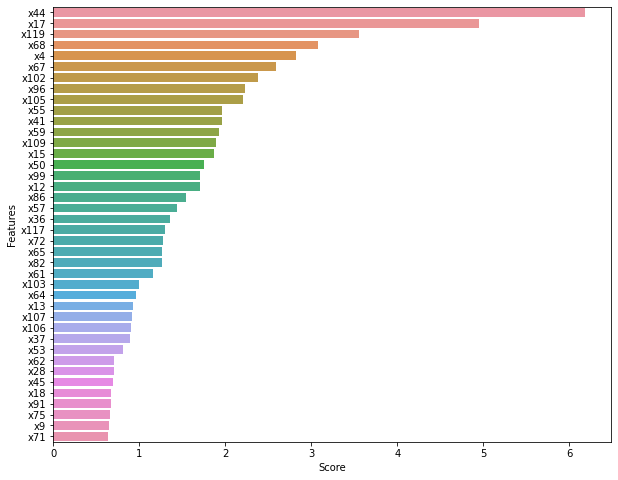

In [30]:
estimator = Pipeline([
    ('preprocessing', transformer_pipeline),
    ('model', catb)
])

estimator.fit(X_train_us, y_train_us)

features =  estimator['preprocessing'].transformers_[0][1]['ordinal_cat'].get_feature_names()+\
            estimator['preprocessing'].transformers_[1][1]['binary_cat'].get_feature_names()+\
            estimator['preprocessing'].transformers_[2][1]['one_hot_cat'].get_feature_names().tolist()+\
            miss_numerical_feature

df_feature_importance = pd.DataFrame(data={
    'Features': features,
    'Score': estimator['model'].feature_importances_,
})

plt.figure(figsize=(10,8))
df_feature_importance = df_feature_importance.sort_values('Score', ascending=False).head(40)
sns.barplot(data=df_feature_importance, x='Score', y='Features')
plt.show()

In [31]:
models = [catb]

feature_selected_10 = df_feature_importance['Features'].head(10).values.tolist()
transformer_pipeline_10 = ColumnTransformer([
    ('numeric_miss', simple, feature_selected_10),
], remainder='passthrough')

feature_selected_20 = df_feature_importance['Features'].head(20).values.tolist()
transformer_pipeline_20 = ColumnTransformer([
    ('numeric_miss', simple, feature_selected_20),
], remainder='passthrough')

feature_selected_30 = df_feature_importance['Features'].head(30).values.tolist()
transformer_pipeline_30 = ColumnTransformer([
    ('numeric_miss', simple, feature_selected_30),
], remainder='passthrough')

feature_selected_40 = df_feature_importance['Features'].values.tolist()
transformer_pipeline_40 = ColumnTransformer([
    ('numeric_miss', simple, feature_selected_40),
], remainder='passthrough')

catb_10 = cross_val_test(transformer_pipeline_10, 
                         [X_train_us[feature_selected_10]],
                         [y_train_us], 
                         models, 
                         'CatBoost With 10 Feature')

catb_20 = cross_val_test(transformer_pipeline_20, 
                         [X_train_us[feature_selected_20]],
                         [y_train_us], 
                         models, 
                         'CatBoost With 20 Feature')

catb_30 = cross_val_test(transformer_pipeline_30, 
                         [X_train_us[feature_selected_30]],
                         [y_train_us], 
                         models, 
                         'CatBoost With 30 Feature')

catb_40 = cross_val_test(transformer_pipeline_40, 
                         [X_train_us[feature_selected_40]],
                         [y_train_us], 
                         models, 
                         'CatBoost With 40 Feature')

display(pd.concat([catb_10, catb_20, catb_30, catb_40], ignore_index=True))

Model                          CV_AUC  Mean_AUC  \
0  CatBoost With 10 Feature  [0.75, 0.76, 0.74, 0.76, 0.75]  0.750635   
1  CatBoost With 20 Feature  [0.75, 0.77, 0.76, 0.76, 0.76]  0.760833   
2  CatBoost With 30 Feature  [0.76, 0.77, 0.76, 0.76, 0.76]  0.760487   
3  CatBoost With 40 Feature  [0.76, 0.77, 0.76, 0.76, 0.76]  0.762464   

    Std_AUC  score_test_AUC  
0  0.006219        0.708848  
1  0.004592        0.730505  
2  0.003704        0.732790  
3  0.003845        0.730223

Model yang memiliki nilai AUC yang paling baik pada Data Testing adalah model **Catboost dengan 20 Feature**.

### *Hyperparameter Tuning*

In [32]:
# Parameter
params = {
    'model__max_depth': [i for i in range(1, 30)],
    'model__n_estimators': [i for i in range(0, 1000, 50)],
    'model__learning_rate': [i/100 for i in range (0, 1000, 10)]
}

# Membuat algorithm chains
feature_selected_fix_tuning = df_feature_importance['Features'].head(20).values.tolist()
transformer_pipeline_fix_tuning = ColumnTransformer([
    ('numeric_miss', simple, feature_selected_fix_tuning),
], remainder='passthrough')

estimator = Pipeline([
    ('preprocessing', transformer_pipeline_fix_tuning),
    ('model', catb)
])

# Hyperparameter tuning
tuning = RandomizedSearchCV(
    estimator, 
    param_distributions = params,
    n_iter = 30,
    cv = StratifiedKFold(n_splits=5), 
    scoring = 'roc_auc', 
    n_jobs = -1,
    random_state = 2022  
)

tuning.fit(X_train_us[feature_selected_fix_tuning], y_train_us)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric_miss',
                                                                               SimpleImputer(),
                                                                               ['x44',
                                                                                'x17',
                                                                                'x119',
                                                                                'x68',
                                                                                'x4',
                                                                                'x67',
                                                                                'x102',
                                                                                'x96',
                                                                                'x105',
                                                                                'x55',
                                                                                'x41',
                                                                                'x59',
                                                                                'x109',
                                                                                'x15',
                                                                                'x50',
                                                                                'x99',
                                                                                'x12',
                                                                                'x86',
                                                                                'x57',
                                                                                'x36'])])),
                                             ('model'...
                                                                 0.3, 0.4, 0.5,
                                                                 0.6, 0.7, 0.8,
                                                                 0.9, 1.0, 1.1,
                                                                 1.2, 1.3, 1.4,
                                                                 1.5, 1.6, 1.7,
                                                                 1.8, 1.9, 2.0,
                                                                 2.1, 2.2, 2.3,
                                                                 2.4, 2.5, 2.6,
                                                                 2.7, 2.8, 2.9, ...],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29],
                                        'model__n_estimators': [0, 50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400, 450,
                                                                500, 550, 600,
                                                                650, 700, 750,
                                                                800, 850, 900,
                                                                950]},
                   r

In [33]:
# Cek skor dan params terbaik
print('Cat Boost')
print('Best_score:', tuning.best_score_)
print('Best_params:', tuning.best_params_)

Cat Boost
Best_score: 0.7569327206075875
Best_params: {'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.2}


In [35]:
# default model
default_model = Pipeline([
    ('preprocessing', transformer_pipeline_fix_tuning),
    ('model', catb)
])
default_model.fit(X_train_us[feature_selected_fix_tuning], y_train_us)

# best model
final_model = tuning.best_estimator_
final_model.fit(X_train_us[feature_selected_fix_tuning], y_train_us)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric_miss',
                                                  SimpleImputer(),
                                                  ['x44', 'x17', 'x119', 'x68',
                                                   'x4', 'x67', 'x102', 'x96',
                                                   'x105', 'x55', 'x41', 'x59',
                                                   'x109', 'x15', 'x50', 'x99',
                                                   'x12', 'x86', 'x57',
                                                   'x36'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x000001C705390520>)])

### *Evaluation*

In [37]:
# Testing
y_pred_default = default_model.predict(X_val)
y_pred_proba_default = default_model.predict_proba(X_val)

y_pred_tuned = final_model.predict(X_val)
y_pred_proba_tuned = final_model.predict_proba(X_val)

roc_auc_default = roc_auc_score(y_val, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_val, y_pred_proba_tuned[:,1])

recall_default = recall_score(y_val, y_pred_default)
recall_tuned = recall_score(y_val, y_pred_tuned)

con_mat_default = confusion_matrix(y_val, y_pred_default)
con_mat_tuned = confusion_matrix(y_val, y_pred_tuned)

fpr_default = con_mat_default[0][1]/(con_mat_default[0][1]+con_mat_default[0][0])
fpr_tuned = con_mat_tuned[0][1]/(con_mat_tuned[0][1]+con_mat_tuned[0][0])

display(pd.DataFrame(data={'AUC Score': [roc_auc_default, roc_auc_tuned],
                           'Recall': [recall_default, recall_tuned],
                           'FPR': [fpr_default, fpr_tuned]},
                     index=['Cat Boost Before Tuning', 'Cat Boost After Tuning']))

print('ROC AUC Score of Catboost Before Tuning: \n', con_mat_default)
print('\nROC AUC Score of Catboost After Tuning: \n', con_mat_tuned)

AUC Score    Recall       FPR
Cat Boost Before Tuning   0.760396  0.572984  0.111974
Cat Boost After Tuning    0.758845  0.579459  0.133598

ROC AUC Score of Catboost Before Tuning: 
 [[14743  1859]
 [ 1451  1947]]

ROC AUC Score of Catboost After Tuning: 
 [[14384  2218]
 [ 1429  1969]]


Skor yang diperoleh sebelum tuning lebih baik dibandingkan dengan skor dengan hyperparameter yang telah dituning. Hal ini mungkin dapat disebabkan karena *n_iter* pada *RandomizedSearchCV* yang hanya 30. Selanjutnya dapat ditingkatkan untuk mencoba kemungkinan yang lebih baik.

In [40]:
report_default = classification_report(y_val, y_pred_default)
report_tuned = classification_report(y_val, y_pred_tuned)

print('Classification Report of Catboost Before Tuning: \n', report_default)
print('Classification Report of Catboost After Tuning: \n', report_tuned)

Classification Report of Catboost Before Tuning: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     16602
           1       0.51      0.57      0.54      3398

    accuracy                           0.83     20000
   macro avg       0.71      0.73      0.72     20000
weighted avg       0.84      0.83      0.84     20000

Classification Report of Catboost After Tuning: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89     16602
           1       0.47      0.58      0.52      3398

    accuracy                           0.82     20000
   macro avg       0.69      0.72      0.70     20000
weighted avg       0.83      0.82      0.82     20000



#### *ROC Graphic*

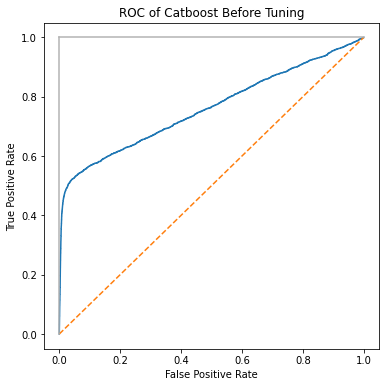

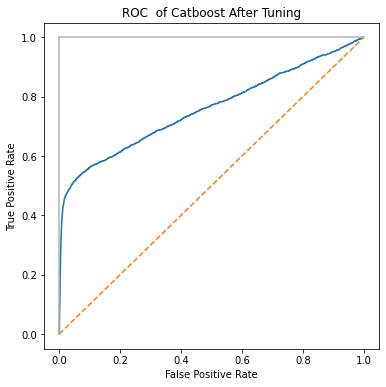

In [42]:
def plot_auc(y_test, y_pred_proba, titles):
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[::,1])
    
    plt.subplots(1, figsize=(6,6))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.title(titles)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_val, y_pred_proba_default, 'ROC of Catboost Before Tuning')
plot_auc(y_val, y_pred_proba_tuned, 'ROC  of Catboost After Tuning')

#### *Feature Importance*

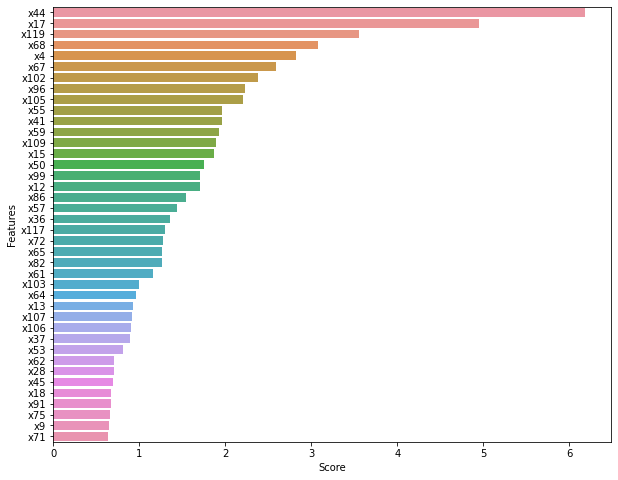

In [44]:
features_final = feature_selected_fix_tuning

final_model.fit(X_train_us[features_final], y_train_us)

df_feature_importance_final = pd.DataFrame(data={
    'Features': features_final,
    'Score': final_model['model'].feature_importances_,
})

plt.figure(figsize=(10,8))
df_feature_importance = df_feature_importance.sort_values('Score', ascending=False)
sns.barplot(data=df_feature_importance, x='Score', y='Features')
plt.show()

# Testing Data

In [45]:
df_churn_test

x0        x1        x2        x3        x4        x5   x6   x7  \
0      0.403735 -1.966104 -1.322339  0.084642  2.481997 -1.719155  5.0  2.0   
1      0.032128  6.516294 -0.939752  0.026937 -0.992999  5.995462  4.0  3.0   
2     -0.280345  0.930291 -1.028828 -0.050924 -3.164733  6.885108  3.0  2.0   
3     -0.313420 -0.568857 -1.576051 -0.003607  5.539969 -1.594770  4.0  3.0   
4      0.108825 -4.815631  5.491084 -0.123928 -1.932024  4.014821  5.0  3.0   
...         ...       ...       ...       ...       ...       ...  ...  ...   
24995 -0.177365 -1.441883  1.644567  0.135914 -1.434104 -2.197283  6.0  2.0   
24996  0.219625  2.084640  3.710896  0.035350  0.792121  3.417730  5.0  2.0   
24997 -0.204578 -0.332965 -1.205238  0.202758 -0.147738 -0.664850  4.0  3.0   
24998 -0.298675  0.750118 -2.856962  0.167308  0.056763 -5.628873  4.0  3.0   
24999 -0.092210  0.602218  1.042477  0.146612 -1.293322 -2.077064  3.0  2.0   

              x8        x9  ...      x115       x116  x117  x118       x119  \
0     -11.546670 -7.073770  ...  3.580278  -7.765934  59.0   1.0  -9.897690   
1      -5.634876  1.937998  ...  5.783655  15.667015  47.0   1.0   7.781887   
2       1.609005 -1.812488  ... -0.389116   8.523648  55.0   0.0   6.815214   
3     -11.517734 -5.364282  ...  3.930974 -13.912115  41.0   0.0   3.158137   
4      -3.117576  2.004889  ... -4.056091 -14.432712  52.0   0.0  -3.867657   
...          ...       ...  ...       ...        ...   ...   ...        ...   
24995 -12.595754  1.800405  ... -2.589491 -27.093773  57.0   1.0 -16.034945   
24996   4.568492 -6.418023  ...  2.248717  -0.310714  58.0   1.0  -0.214017   
24997  -5.961850 -6.291984  ...  5.194106   6.376269  45.0   0.0  14.348007   
24998  -0.477643  4.446171  ... -1.079791  10.990180  41.0   1.0  11.317455   
24999  -6.101376  0.354084  ...  2.611718   1.372462  38.0   0.0   7.830794   

            x120       x121       x122      x123       x124  
0       5.694125  -6.734618  17.052251  3.601040   2.873498  
1       9.752716   5.918369  15.922908  5.460557  10.475816  
2      -3.325532   4.123546 -19.656038  8.380318  -1.203315  
3      -7.088875  -3.035983  34.277048 -3.169203   1.417681  
4     -13.308519   1.008302  41.449381 -0.804560  -0.649453  
...          ...        ...        ...       ...        ...  
24995  -4.188319   1.857260 -47.994260 -1.111017   0.780211  
24996   2.988096   5.508766 -12.374789  2.773387  -6.644809  
24997   1.003478  -1.820065 -67.534113  1.520819   3.599916  
24998   6.262580  13.584108  29.077122 -0.135391  -2.858872  
24999   5.257363   0.975914  66.850592  2.770043  -0.984973  

[25000 rows x 125 columns]

In [55]:
y_result = pd.DataFrame(final_model.predict(df_churn_test))
y_result.to_excel('result.xlsx', index=False)